# 1.0 Data Exploration<a id='2.2_Introduction'></a>

## 1.1 Introduction <a id='2.2_Introduction'></a>

This dataset consist of several CSV files that contain number of geometric features of thousands of channel holes fabricated at nano-meter dimensions on a semconductor substrate. The data has tow parts 
1. Original features i.e. the geometric features are measured from image data that are unprocessed, 
2. Enhanced features i.e. geometric features are collected from processed images. 


Each image (of the same region) is acquired three times and the variation in geometric measurements of the same channel hole in three different images provide a measurement precision.
The customer wants to know the best protocol to achive optimal precision. There are four possibilities.
1. Class 1: Original/unprocessed image features and measurements on actual shape of the channel holes
2. Class 2: Enhanced/processed image features and measurement on actual shape of the channel holes

Exploring information on the feature files extracted from fitted geometric shapes to the channel holes is a similar repittition of the exercise and hence we are not detailing it here.

In the data-wrangling step we have already completed collecting data, organizing it, and making sure it's well defined. Some data cleaning  and data exploration was also done. In the exploratory data analysis step, we will explore the features, inter relationship between features by plotting the feature values and fitting standard models.

## 1.2 Imports<a id='2.3_Imports'></a>

Placing  imports all together at the start 

In [48]:
#Code task 1#
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import glob
import copy
import string

## 1.3 Objectives<a id='2.4_Objectives'></a>

* Plot distribution of the features as histograms and note the files that doesn't conform to the expected distribution
* Scatter plot features against one another to understand, highly correlated features
* Decide which (can be more than one) is suitable feature(s) to be called as critical dimension

## 1.4 Explore The Data:  <a id='2.5_Load_The_Ski_Resort_Data'></a>

In [49]:
# the supplied CSV data file is the raw_data directory
# get data file names
fold =r'C:\Users\umesh adiga\Desktop\SpringBoard\capstoneTwo\Proposal01_ExampleData\Metrology\wrangled_data\original'

#There are three measurements for each channel hole using three images
# i.e. the first file in files_1 list below, files_2 list below and files_3 list below form a triplicate measurements
# from which precision in the form of standard deviation of measurements for a same channel hole as to be calculated.

ofiles=[]

fx1=[]
fx2=[]
fx3=[]

for file in glob.glob(fold + r"\*_0.csv"):
        fx1.append(file)
for file in glob.glob(fold + r"\*_1.csv"):
        fx2.append(file)
for file in glob.glob(fold + r"\*_2.csv"):
        fx3.append(file)

ofiles.append(fx1);
ofiles.append(fx2);
ofiles.append(fx3);

print(len(fx1))
print(len(fx2))
print(len(fx3))

10
10
10


original files are loaded and same number of triplicates are present

In [50]:
# the supplied CSV data file is the raw_data directory
# get data file names
fold =r'C:\Users\umesh adiga\Desktop\SpringBoard\capstoneTwo\Proposal01_ExampleData\Metrology\wrangled_data\enhanced'

#There are three measurements for each channel hole using three images
# i.e. the first file in files_1 list below, files_2 list below and files_3 list below form a triplicate measurements
# from which precision in the form of standard deviation of measurements for a same channel hole as to be calculated.

efiles=[]

fx1=[]
fx2=[]
fx3=[]

for file in glob.glob(fold + r"\*_0.csv"):
        fx1.append(file)
for file in glob.glob(fold + r"\*_1.csv"):
        fx2.append(file)
for file in glob.glob(fold + r"\*_2.csv"):
        fx3.append(file)

efiles.append(fx1);
efiles.append(fx2);
efiles.append(fx3);

print(len(fx1))
print(len(fx2))
print(len(fx3))

10
10
10


Enhanced data files are loaded and same number of triplicates are present

In [51]:
dfx = [] # data frame of frame of frames (for original data)

for fx in range (0, len(ofiles)):
    dfl=[]
    for file in ofiles[fx]:
        df = pd.read_csv(file, header=None)
        dfl.append(df)
    dfx.append(dfl)

print(len(dfx))
print(len(dfx[0]))
print(len(dfx[0][0]))
print(len(dfx[1][0]))
print(len(dfx[2][0]))

3
10
1540
1553
1554


Equal number of rows in all the files means we have done correct data wrangling and the channel holes that are not in triplicate measurements are all removed

In [52]:
dfy = [] # data frame of frame of frames (for enhanced data)

for fx in range (0, len(efiles)):
    dfl=[]
    for file in efiles[fx]:
        df = pd.read_csv(file, header=None)
        dfl.append(df)
    dfy.append(dfl)


In [53]:
dfx[0][0].head()

0                                                  1      2   \
0     NaN                                          file_name  label   
1  1334.0  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...      0   
2    91.0  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...      0   
3  1346.0  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...      0   
4  1356.0  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...      0   

               3                   4                 5                  6   \
0  location (X_Y)                area       area_fitted          perimeter   
1       3236_2942  3581.4197313137697  4658.40119995552   726.422554212406   
2         592_648  7630.1398964788705  9134.26316793786   1040.25977620796   
3       2958_2946  3380.6265761432696  4402.84627519307  703.1126738399889   
4       2072_3020  3449.9914842930802  4468.56039870341  698.1071742195619   

                  7                    8                   9   \
0   perimeter_Fitted  areaEnclosingCircle      areaFitEllipse   
1  871.5820432048099       4323.980656075    14556.7358159637   
2   1230.46876687738     8468.62308789732  31429.352870765706   
3   803.222667267178     4049.06734317108  14254.721087531401   
4   803.222667267178     4021.03066015792    14616.5607688754   

                     10                 11                12  \
0  areaMinAreaRectangle       eccentricity       orientation   
1      4549.63260008236  0.913525538590649  175.460144042969   
2     9455.531492944609  0.957191388672401  94.7432022094727   
3    4030.4662543755003  0.893909922735319  175.332778930664   
4    4030.4662543755003  0.956460752209517  11.5325517654419   

                  13        14         15         16          17  
0          convexity  0degDiam  45degDiam  90degDiam  135degDiam  
1  0.970326409495549  563.9648   589.5996   581.0547    589.5996  
2  0.975268315445637  589.5996   581.0547   581.0547     546.875  
3   0.96760710553814  589.5996   589.5996   581.0547    581.0547  
4  0.981308411214953  598.1445   598.1445   581.0547    581.0547

In [54]:
dfy[0][0].head()

0                                                  1      2   \
0  NaN                                          file_name  label   
1  0.0  Enhanced_flat_MicronDRAM_Middle_20210121_DMpre...      1   
2  1.0  Enhanced_flat_MicronDRAM_Middle_20210121_DMpre...      2   
3  2.0  Enhanced_flat_MicronDRAM_Middle_20210121_DMpre...      3   
4  3.0  Enhanced_flat_MicronDRAM_Middle_20210121_DMpre...      4   

               3                  4                 5                  6   \
0  location (X_Y)               area       area_fitted          perimeter   
1         734_408   5676.97011436586  7155.53789334861   1018.16443769629   
2        2686_410  5260.780665467009  6629.82490526585    945.65836947514   
3        2314_418  5001.574956065101  6242.84173348271  848.1248062077531   
4        2406_420   5739.03345323674  7265.06143253251   1044.40647052874   

                   7                    8                   9   \
0    perimeter_Fitted  areaEnclosingCircle      areaFitEllipse   
1  1213.3789228929702     8679.42185021971    26731.0996896834   
2    1110.83985898652     8464.41438205136  23419.928603524902   
3    1008.30079508007     5889.18997747013     20479.532207839   
4  1264.6484548462001   10007.040696479702  25650.787521557704   

                     10                 11                12  \
0  areaMinAreaRectangle       eccentricity       orientation   
1      8192.36078782493  0.751680333122636  177.020446777344   
2     7178.005481565601  0.764132146745952  148.136474609375   
3    6133.3179254651095  0.858158133306831  96.6793518066406   
4      8447.91539257188  0.705192644331594  139.109970092773   

                  13        14                 15         16  \
0          convexity  0degDiam          45degDiam  90degDiam   
1  0.889588100686499  538.3301  649.4141000000001    546.875   
2  0.926092544987147   546.875  615.2343999999999    546.875   
3  0.977872947894361   546.875           512.6953    546.875   
4  0.874791318864775  563.9648           572.5098    546.875   

                   17  
0          135degDiam  
1            589.5996  
2             546.875  
3            478.5156  
4  487.06059999999997

#### Get the column labelling right

In [55]:
for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):
        dfx[f][d] = dfx[f][d].dropna(axis='columns')
header_row=0
for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):
        dfx[f][d].columns = dfx[f][d].iloc[header_row]
        dfx[f][d] = dfx[f][d].drop(dfx[f][d].index[header_row])
        
dfx[0][0].head()

0                                          file_name label location (X_Y)  \
1  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...     0      3236_2942   
2  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...     0        592_648   
3  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...     0      2958_2946   
4  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...     0      2072_3020   
5  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...     0       954_3024   

0                area       area_fitted          perimeter   perimeter_Fitted  \
1  3581.4197313137697  4658.40119995552   726.422554212406  871.5820432048099   
2  7630.1398964788705  9134.26316793786   1040.25977620796   1230.46876687738   
3  3380.6265761432696  4402.84627519307  703.1126738399889   803.222667267178   
4  3449.9914842930802  4468.56039870341  698.1071742195619   803.222667267178   
5    3508.40403852449  4563.48079932947   722.275862947522   837.402355235994   

0 areaEnclosingCircle      areaFitEllipse areaMinAreaRectangle  \
1      4323.980656075    14556.7358159637     4549.63260008236   
2    8468.62308789732  31429.352870765706    9455.531492944609   
3    4049.06734317108  14254.721087531401   4030.4662543755003   
4    4021.03066015792    14616.5607688754   4030.4662543755003   
5    4282.70215871188  14512.355042656702   4380.9414887741295   

0       eccentricity       orientation          convexity  0degDiam 45degDiam  \
1  0.913525538590649  175.460144042969  0.970326409495549  563.9648  589.5996   
2  0.957191388672401  94.7432022094727  0.975268315445637  589.5996  581.0547   
3  0.893909922735319  175.332778930664   0.96760710553814  589.5996  589.5996   
4  0.956460752209517  11.5325517654419  0.981308411214953  598.1445  598.1445   
5  0.912113080550854  178.707702636719  0.962925851703407  598.1445  589.5996   

0 90degDiam 135degDiam  
1  581.0547   589.5996  
2  581.0547    546.875  
3  581.0547   581.0547  
4  581.0547   581.0547  
5  581.0547   581.0547

In [56]:
for f in range(0, len(dfy)):
    for d in range(0, len(dfy[f])):
        dfy[f][d] = dfy[f][d].dropna(axis='columns')
header_row=0
for f in range(0, len(dfy)):
    for d in range(0, len(dfy[f])):
        dfy[f][d].columns = dfy[f][d].iloc[header_row]
        dfy[f][d] = dfy[f][d].drop(dfy[f][d].index[header_row])
        
dfy[0][0].head()

0                                          file_name label location (X_Y)  \
1  Enhanced_flat_MicronDRAM_Middle_20210121_DMpre...     1        734_408   
2  Enhanced_flat_MicronDRAM_Middle_20210121_DMpre...     2       2686_410   
3  Enhanced_flat_MicronDRAM_Middle_20210121_DMpre...     3       2314_418   
4  Enhanced_flat_MicronDRAM_Middle_20210121_DMpre...     4       2406_420   
5  Enhanced_flat_MicronDRAM_Middle_20210121_DMpre...     5       3378_486   

0               area       area_fitted          perimeter    perimeter_Fitted  \
1   5676.97011436586  7155.53789334861   1018.16443769629  1213.3789228929702   
2  5260.780665467009  6629.82490526585    945.65836947514    1110.83985898652   
3  5001.574956065101  6242.84173348271  848.1248062077531    1008.30079508007   
4   5739.03345323674  7265.06143253251   1044.40647052874  1264.6484548462001   
5   4435.70333694824  5658.71619116854  848.9836135446631    974.121107111259   

0 areaEnclosingCircle      areaFitEllipse areaMinAreaRectangle  \
1    8679.42185021971    26731.0996896834     8192.36078782493   
2    8464.41438205136  23419.928603524902    7178.005481565601   
3    5889.18997747013     20479.532207839   6133.3179254651095   
4  10007.040696479702  25650.787521557704     8447.91539257188   
5    5855.13967556731    18534.6663166399     5695.22401481571   

0       eccentricity       orientation          convexity  0degDiam  \
1  0.751680333122636  177.020446777344  0.889588100686499  538.3301   
2  0.764132146745952  148.136474609375  0.926092544987147   546.875   
3  0.858158133306831  96.6793518066406  0.977872947894361   546.875   
4  0.705192644331594  139.109970092773  0.874791318864775  563.9648   
5  0.825343217754859  6.61882734298706  0.939675174013921  538.3301   

0          45degDiam 90degDiam          135degDiam  
1  649.4141000000001   546.875            589.5996  
2  615.2343999999999   546.875             546.875  
3           512.6953   546.875            478.5156  
4           572.5098   546.875  487.06059999999997  
5           538.3301   546.875            555.4199

In [57]:
dfx[0][0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539 entries, 1 to 1539
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   file_name             1539 non-null   object
 1   label                 1539 non-null   object
 2   location (X_Y)        1539 non-null   object
 3   area                  1539 non-null   object
 4   area_fitted           1539 non-null   object
 5   perimeter             1539 non-null   object
 6   perimeter_Fitted      1539 non-null   object
 7   areaEnclosingCircle   1539 non-null   object
 8   areaFitEllipse        1539 non-null   object
 9   areaMinAreaRectangle  1539 non-null   object
 10  eccentricity          1539 non-null   object
 11  orientation           1539 non-null   object
 12  convexity             1539 non-null   object
 13  0degDiam              1539 non-null   object
 14  45degDiam             1539 non-null   object
 15  90degDiam             1539 non-null   

#### so we must convert object to numeric

In [58]:
dfl = (dfx[0][0].columns)
dfl0=dfl[3:len(dfl)]
for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):
        for fname in dfl0:
            dfx[f][d][fname] = pd.to_numeric(dfx[f][d][fname], errors='coerce')
dfx[0][0].head()

0                                          file_name label location (X_Y)  \
1  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...     0      3236_2942   
2  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...     0        592_648   
3  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...     0      2958_2946   
4  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...     0      2072_3020   
5  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...     0       954_3024   

0         area  area_fitted    perimeter  perimeter_Fitted  \
1  3581.419731  4658.401200   726.422554        871.582043   
2  7630.139896  9134.263168  1040.259776       1230.468767   
3  3380.626576  4402.846275   703.112674        803.222667   
4  3449.991484  4468.560399   698.107174        803.222667   
5  3508.404039  4563.480799   722.275863        837.402355   

0  areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
1          4323.980656    14556.735816           4549.632600      0.913526   
2          8468.623088    31429.352871           9455.531493      0.957191   
3          4049.067343    14254.721088           4030.466254      0.893910   
4          4021.030660    14616.560769           4030.466254      0.956461   
5          4282.702159    14512.355043           4380.941489      0.912113   

0  orientation  convexity  0degDiam  45degDiam  90degDiam  135degDiam  
1   175.460144   0.970326  563.9648   589.5996   581.0547    589.5996  
2    94.743202   0.975268  589.5996   581.0547   581.0547    546.8750  
3   175.332779   0.967607  589.5996   589.5996   581.0547    581.0547  
4    11.532552   0.981308  598.1445   598.1445   581.0547    581.0547  
5   178.707703   0.962926  598.1445   589.5996   581.0547    581.0547

In [59]:
dfl = (dfy[0][0].columns)
dfl0=dfl[3:len(dfl)]
for f in range(0, len(dfy)):
    for d in range(0, len(dfy[f])):
        for fname in dfl0:
            dfy[f][d][fname] = pd.to_numeric(dfy[f][d][fname], errors='coerce')
dfy[0][0].head()

0                                          file_name label location (X_Y)  \
1  Enhanced_flat_MicronDRAM_Middle_20210121_DMpre...     1        734_408   
2  Enhanced_flat_MicronDRAM_Middle_20210121_DMpre...     2       2686_410   
3  Enhanced_flat_MicronDRAM_Middle_20210121_DMpre...     3       2314_418   
4  Enhanced_flat_MicronDRAM_Middle_20210121_DMpre...     4       2406_420   
5  Enhanced_flat_MicronDRAM_Middle_20210121_DMpre...     5       3378_486   

0         area  area_fitted    perimeter  perimeter_Fitted  \
1  5676.970114  7155.537893  1018.164438       1213.378923   
2  5260.780665  6629.824905   945.658369       1110.839859   
3  5001.574956  6242.841733   848.124806       1008.300795   
4  5739.033453  7265.061433  1044.406471       1264.648455   
5  4435.703337  5658.716191   848.983614        974.121107   

0  areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
1          8679.421850    26731.099690           8192.360788      0.751680   
2          8464.414382    23419.928604           7178.005482      0.764132   
3          5889.189977    20479.532208           6133.317925      0.858158   
4         10007.040696    25650.787522           8447.915393      0.705193   
5          5855.139676    18534.666317           5695.224015      0.825343   

0  orientation  convexity  0degDiam  45degDiam  90degDiam  135degDiam  
1   177.020447   0.889588  538.3301   649.4141    546.875    589.5996  
2   148.136475   0.926093  546.8750   615.2344    546.875    546.8750  
3    96.679352   0.977873  546.8750   512.6953    546.875    478.5156  
4   139.109970   0.874791  563.9648   572.5098    546.875    487.0606  
5     6.618827   0.939675  538.3301   538.3301    546.875    555.4199

Now we have a list dfx that contains 3 lists of dataframes of the wrangled features from original images
dfy is a list containing 3 lists of dataframes of the wrangles features from enhanced images

## 1.5 Let us explore the frequency distribution of each feature <a id='2.6_Explore_The_Data'></a>

### 1.5.1 Create a histogram plot for each feature distribution <a id='2.6.1_Find_Your_Resort_Of_Interest'></a>

#### Let us calculate some parameters and plot bunch of triplicate measurements in consequtive three rows

c:\users\umesh adiga\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


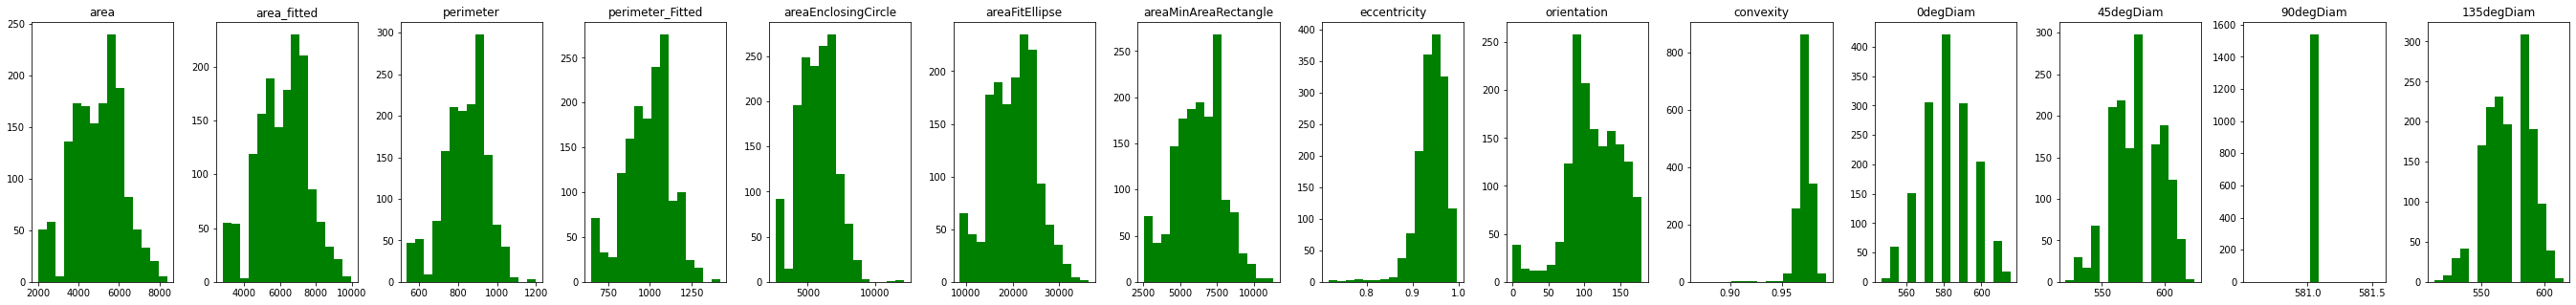

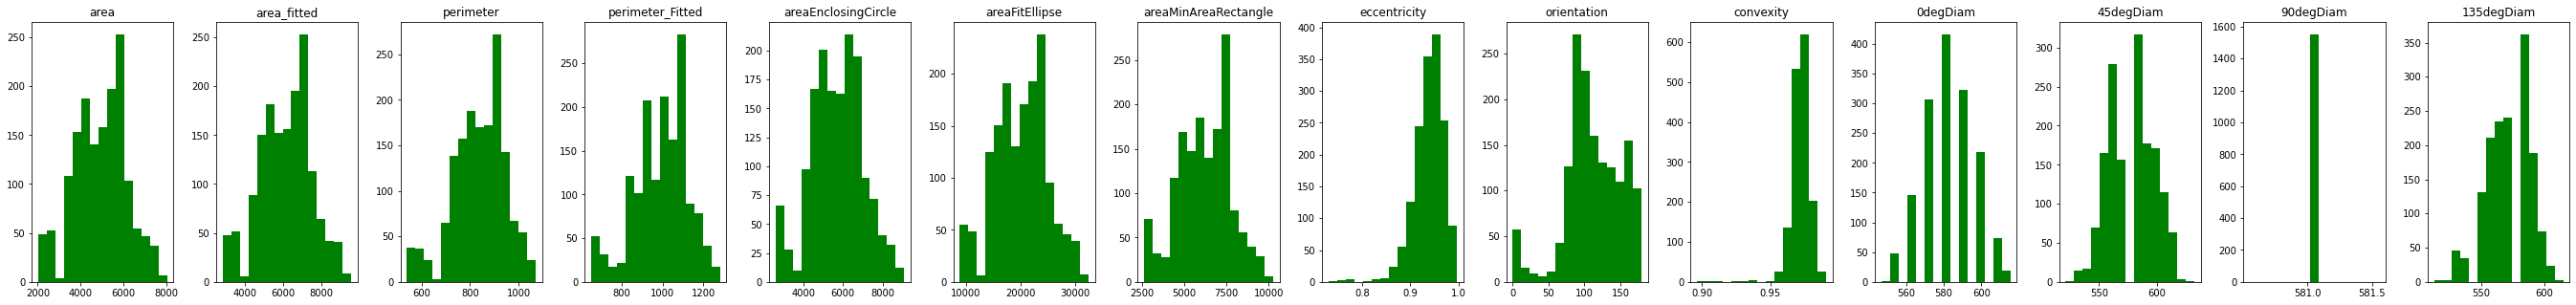

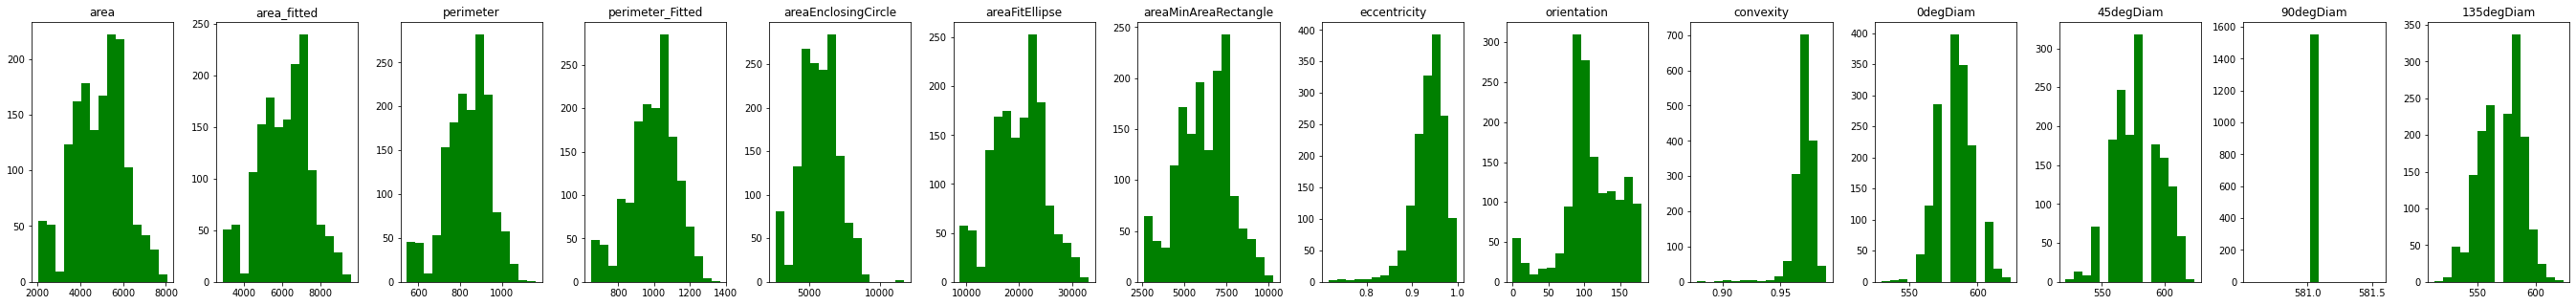

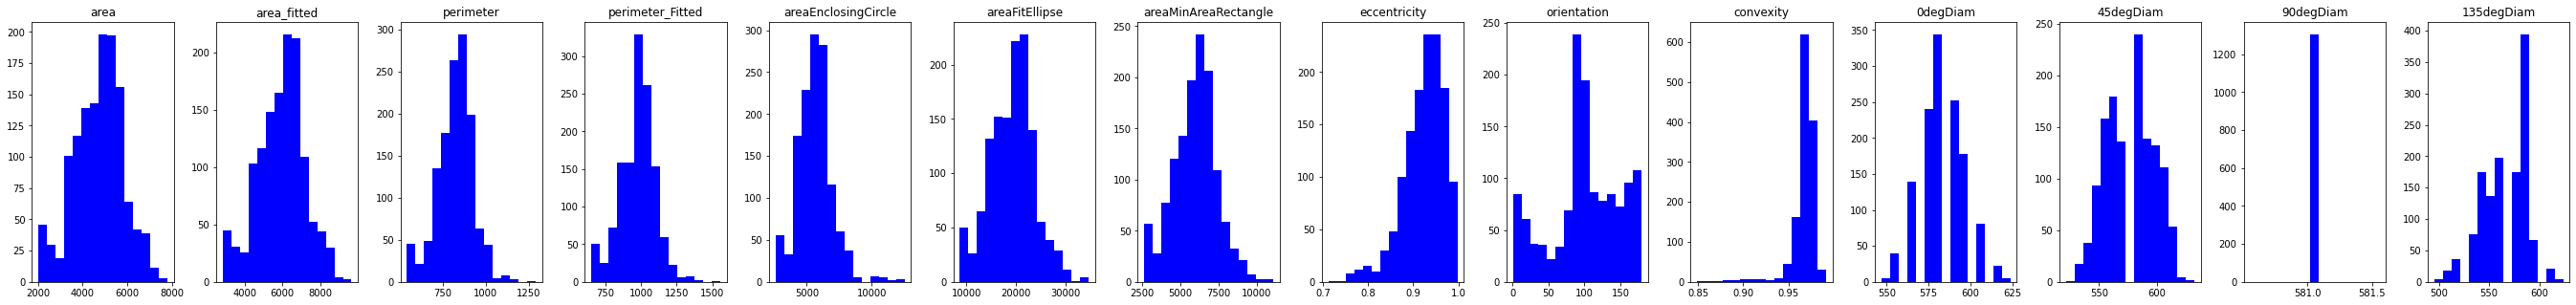

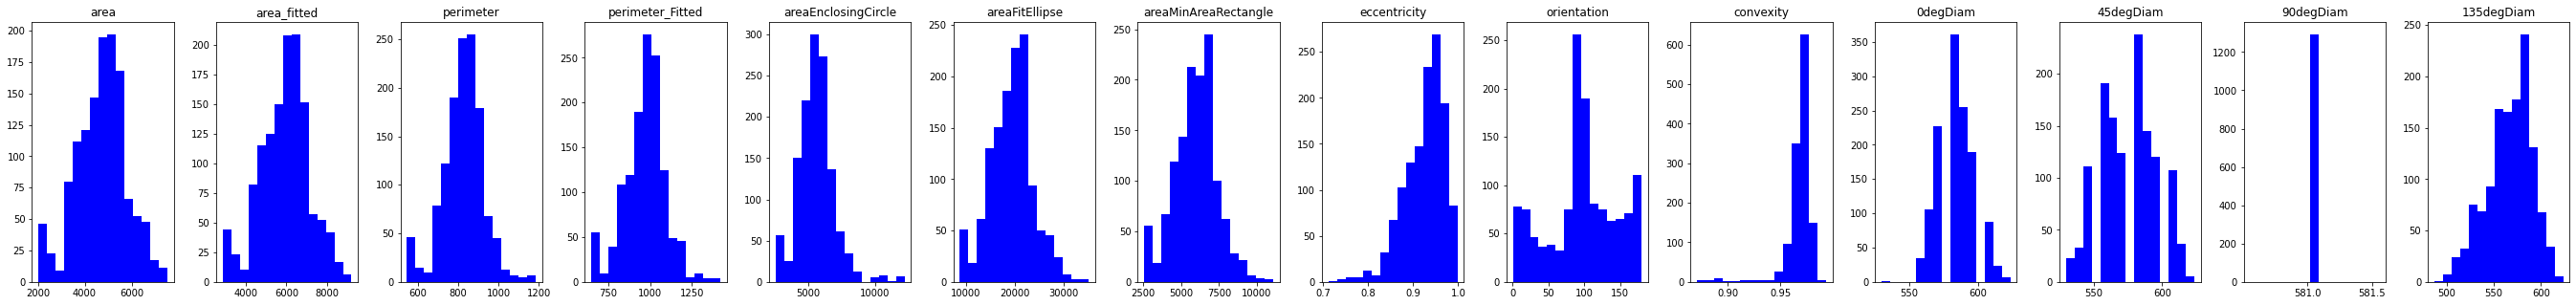

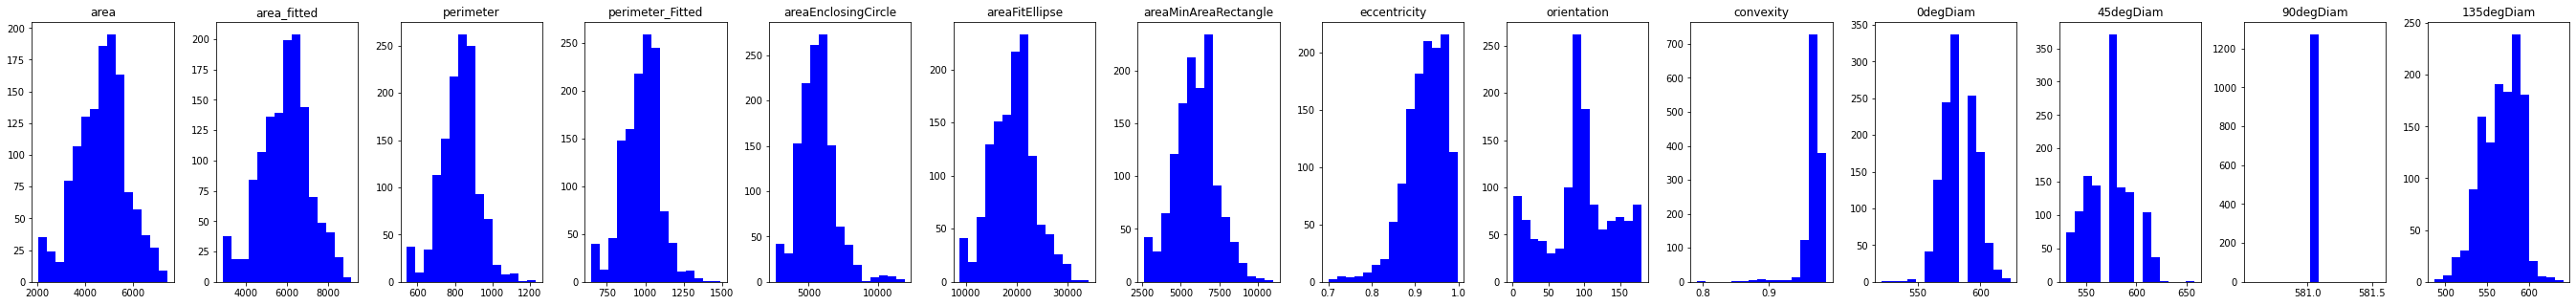

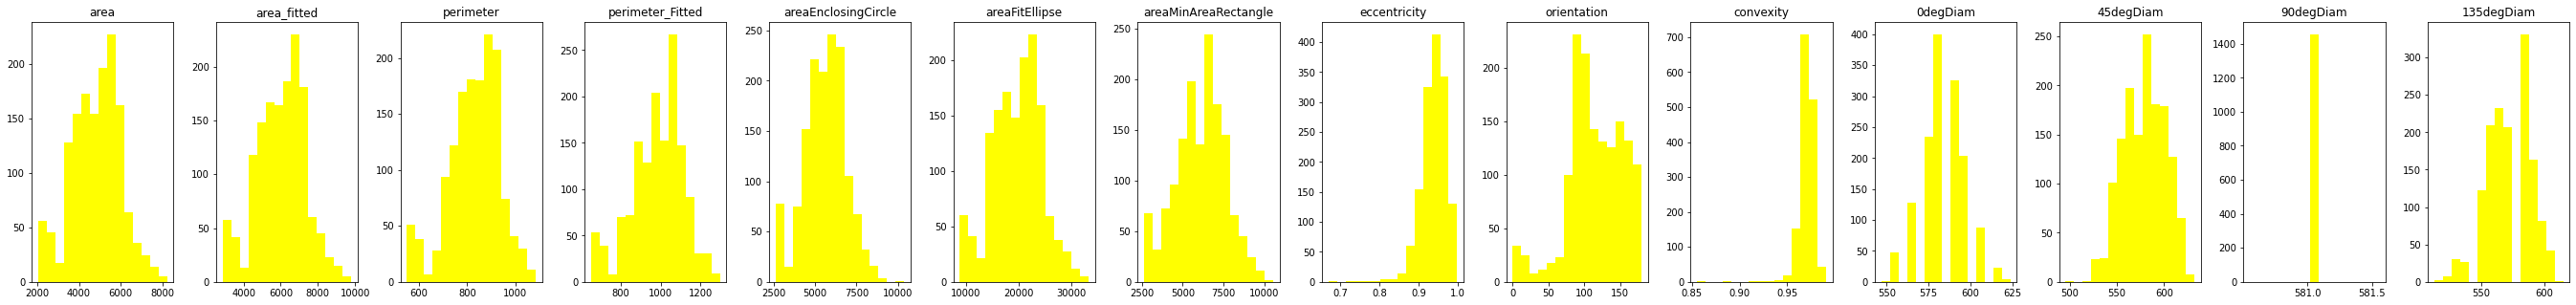

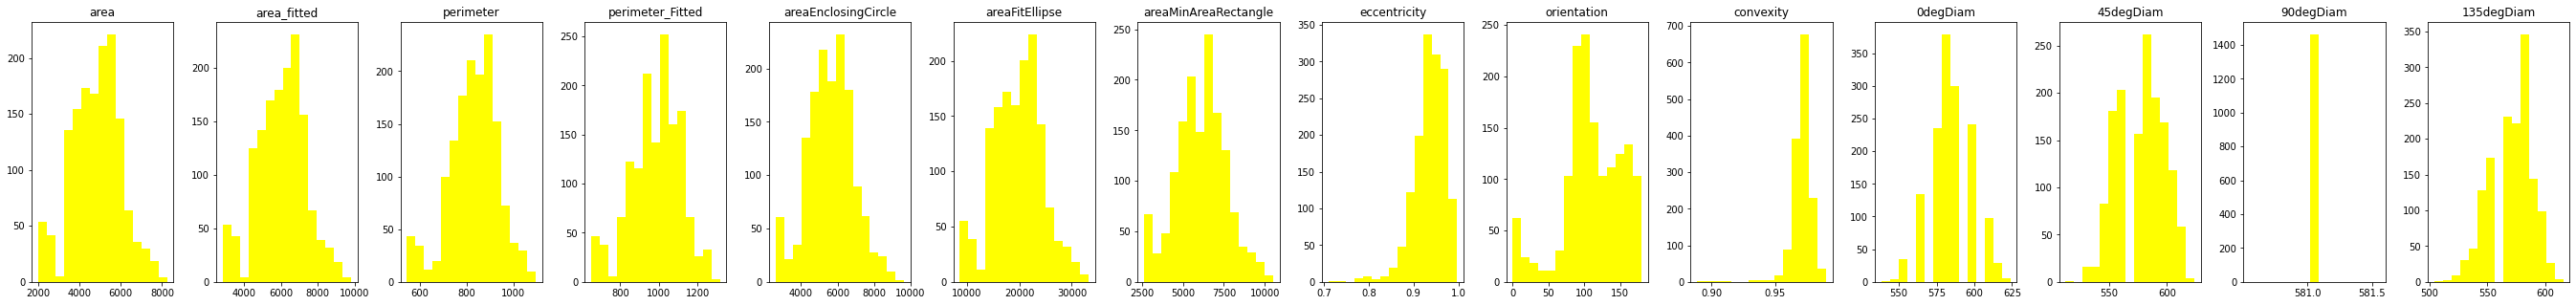

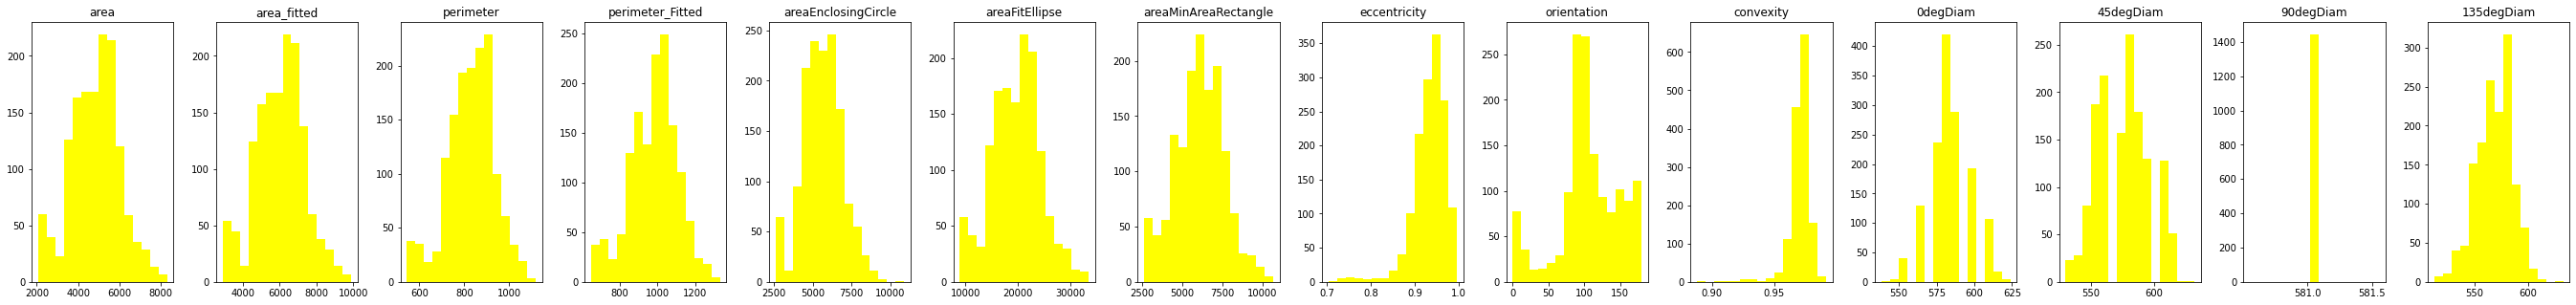

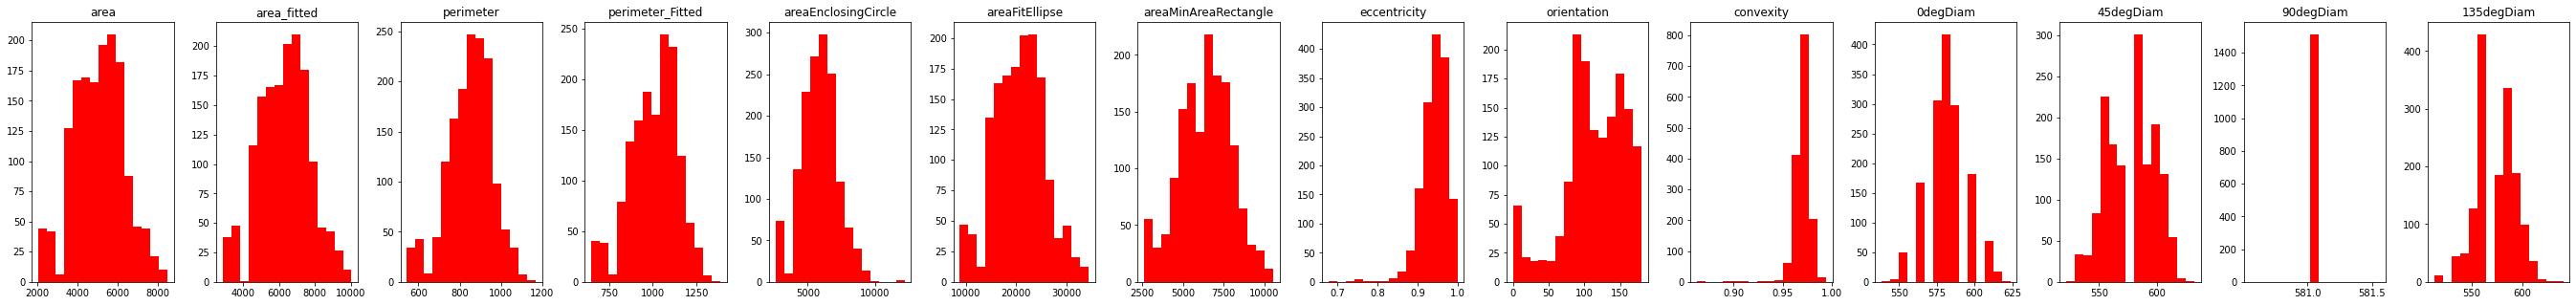

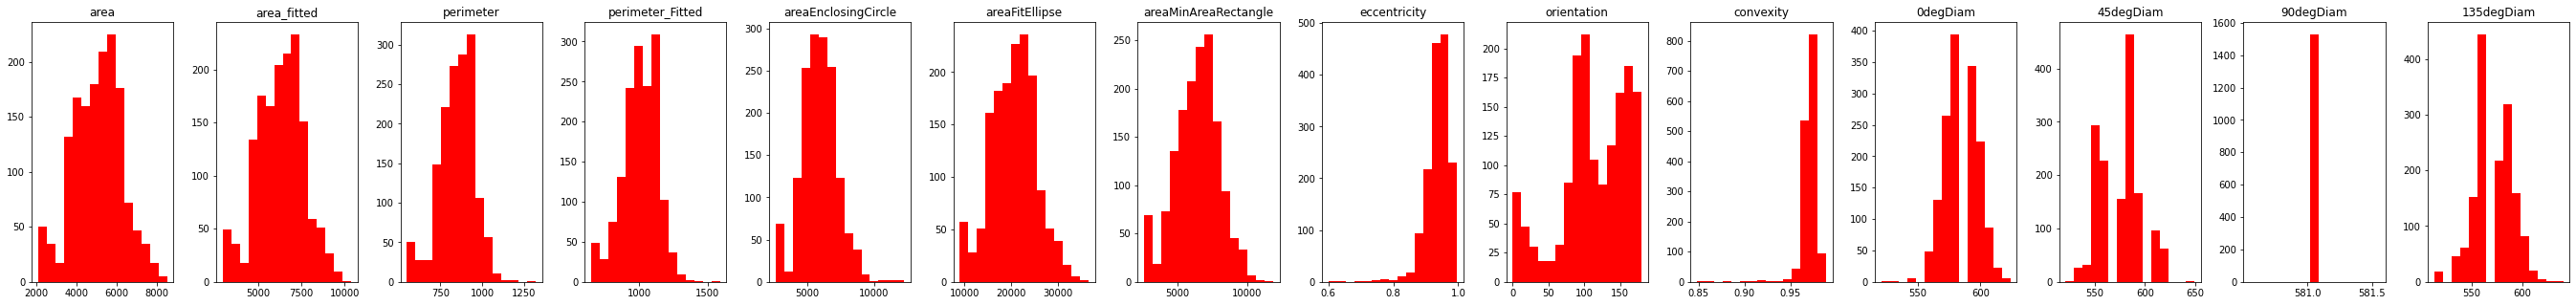

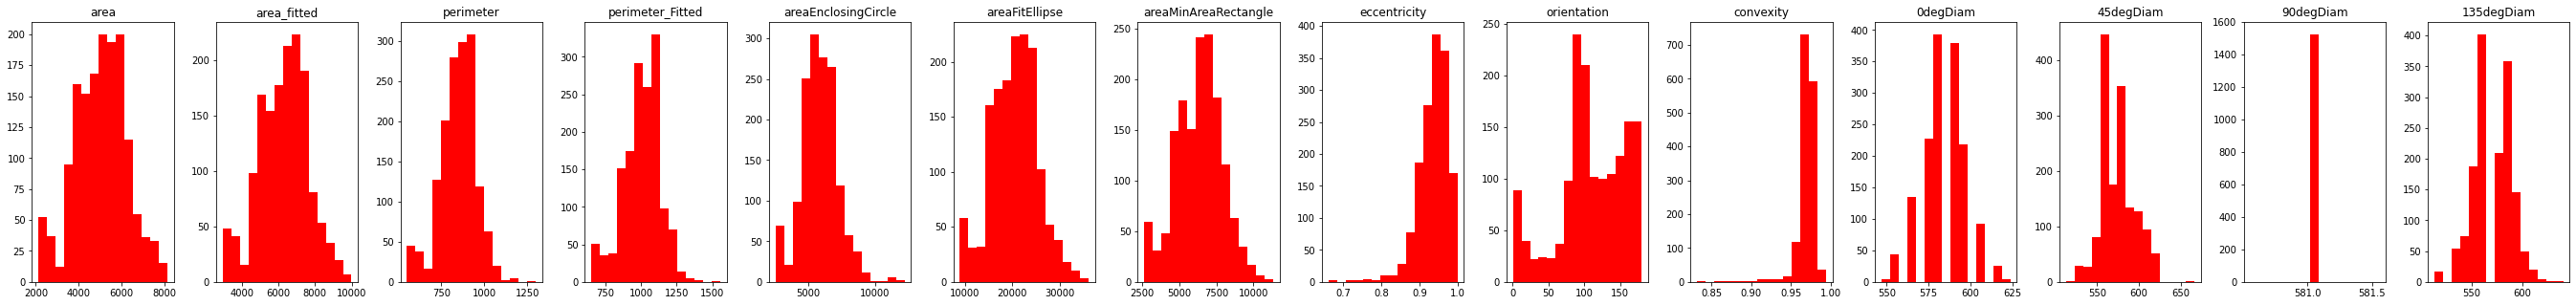

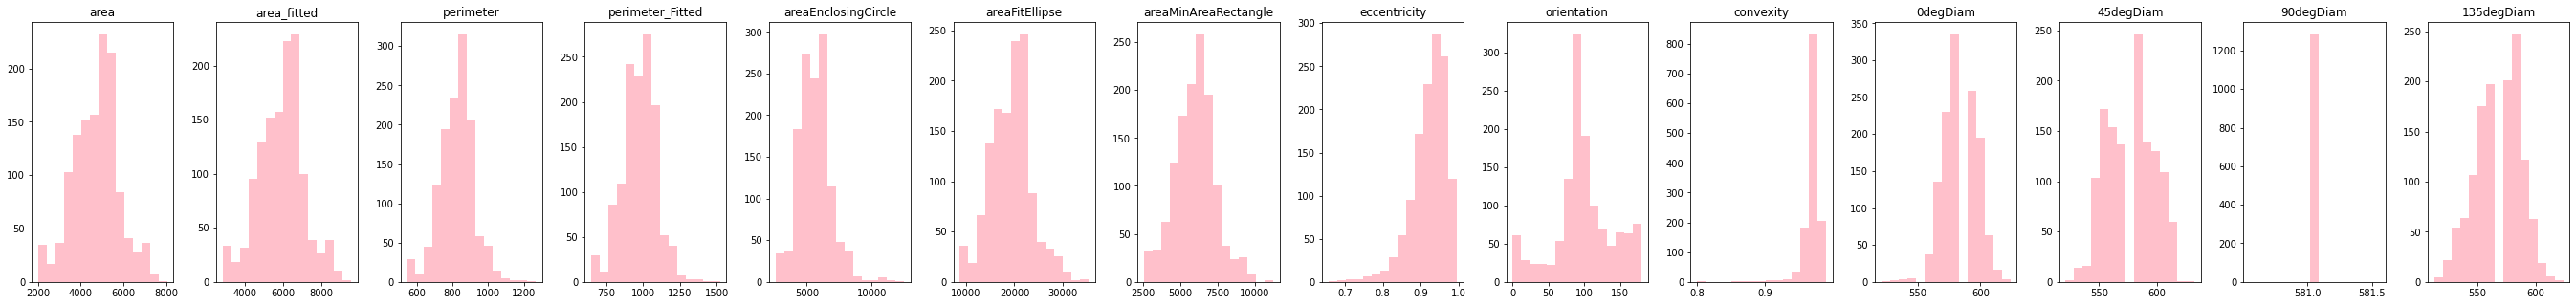

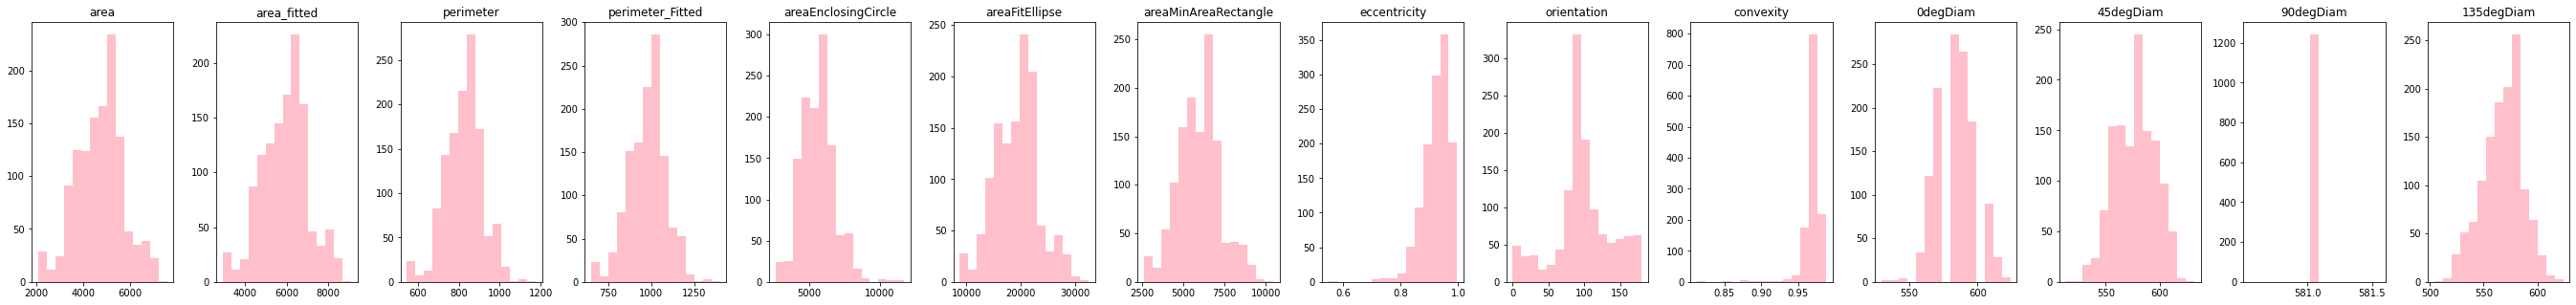

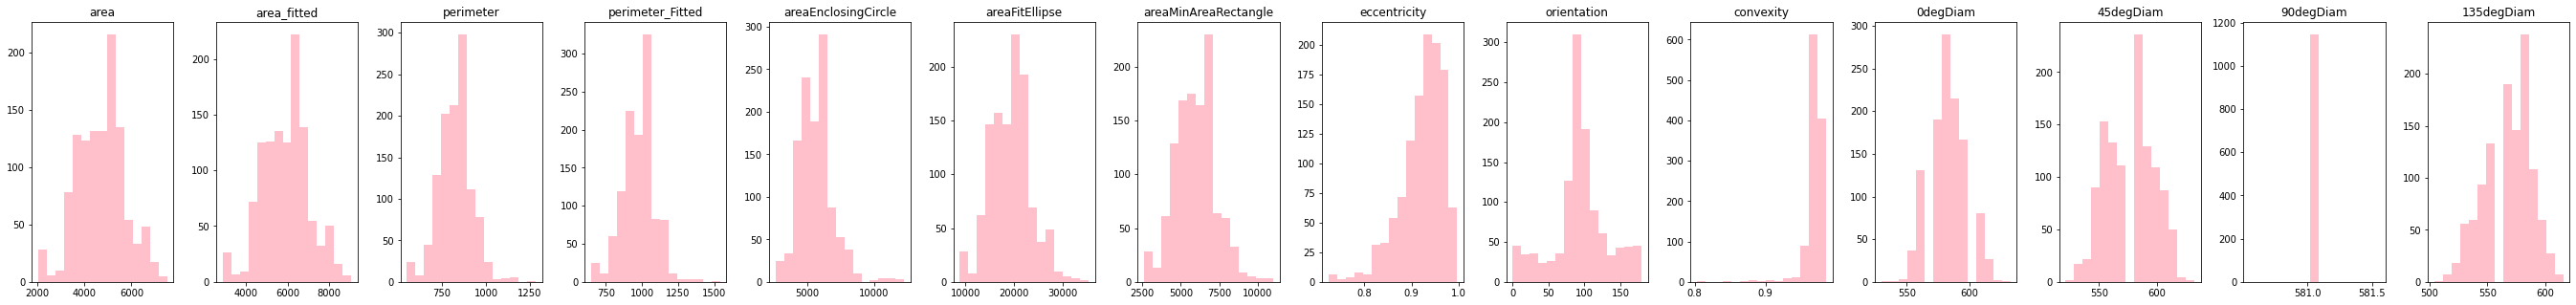

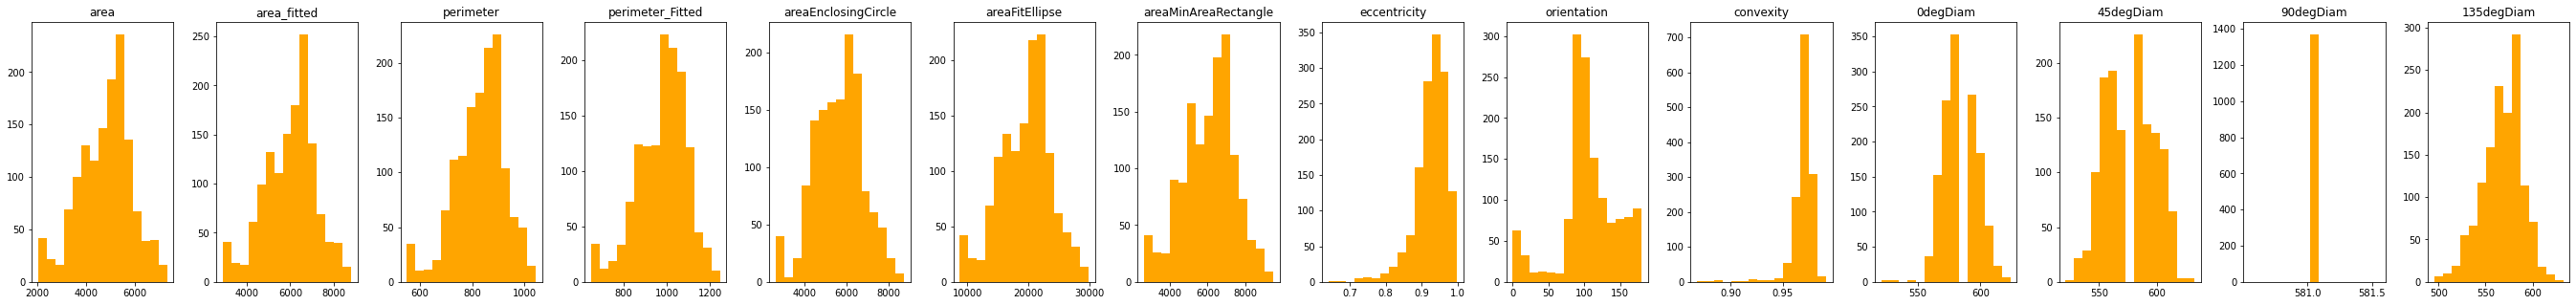

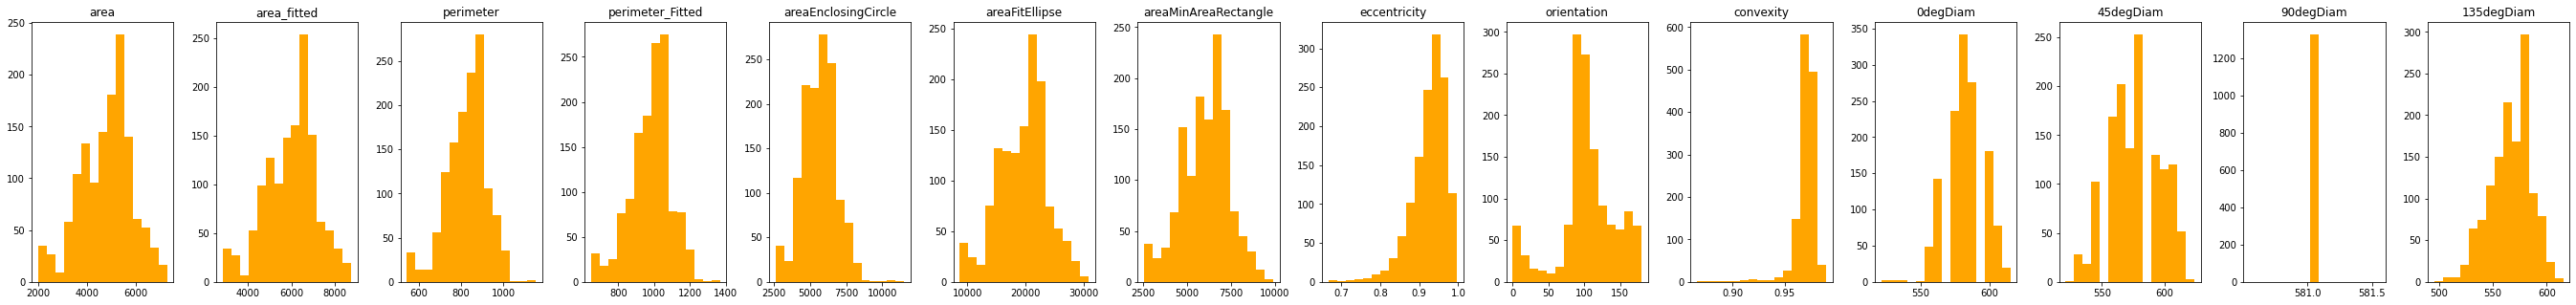

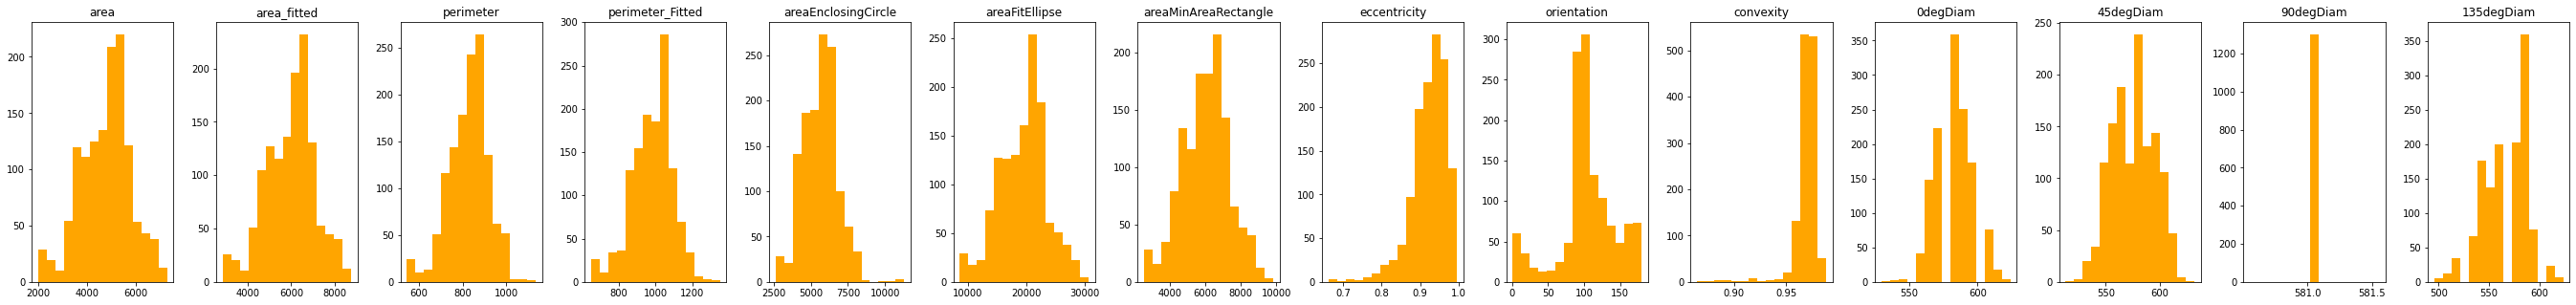

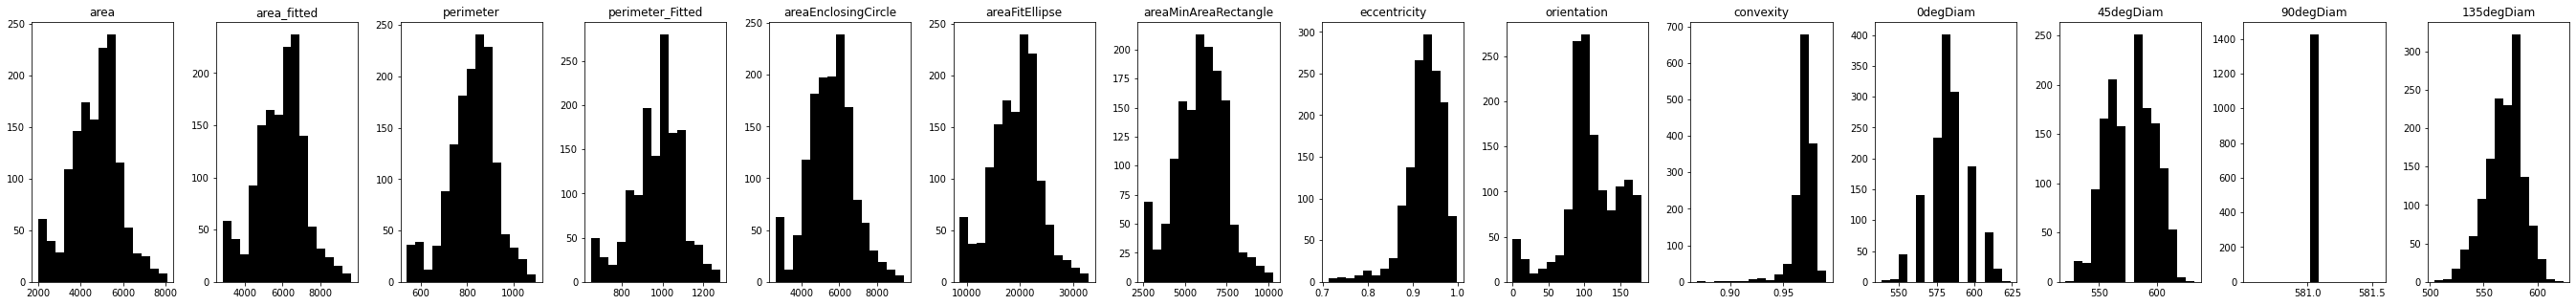

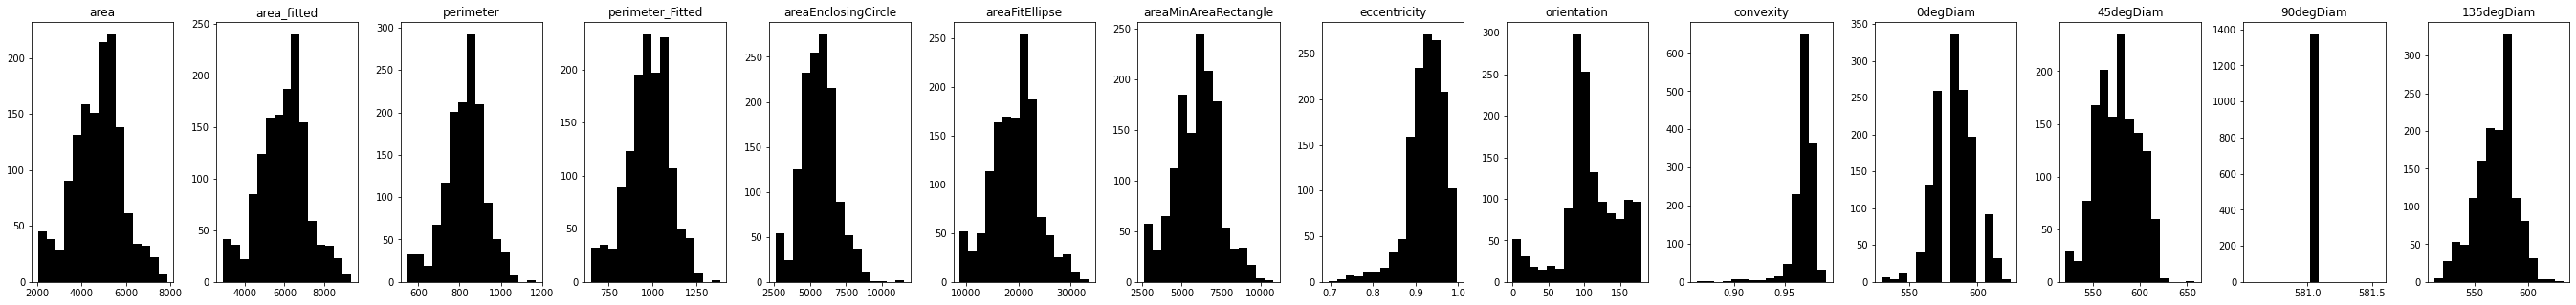

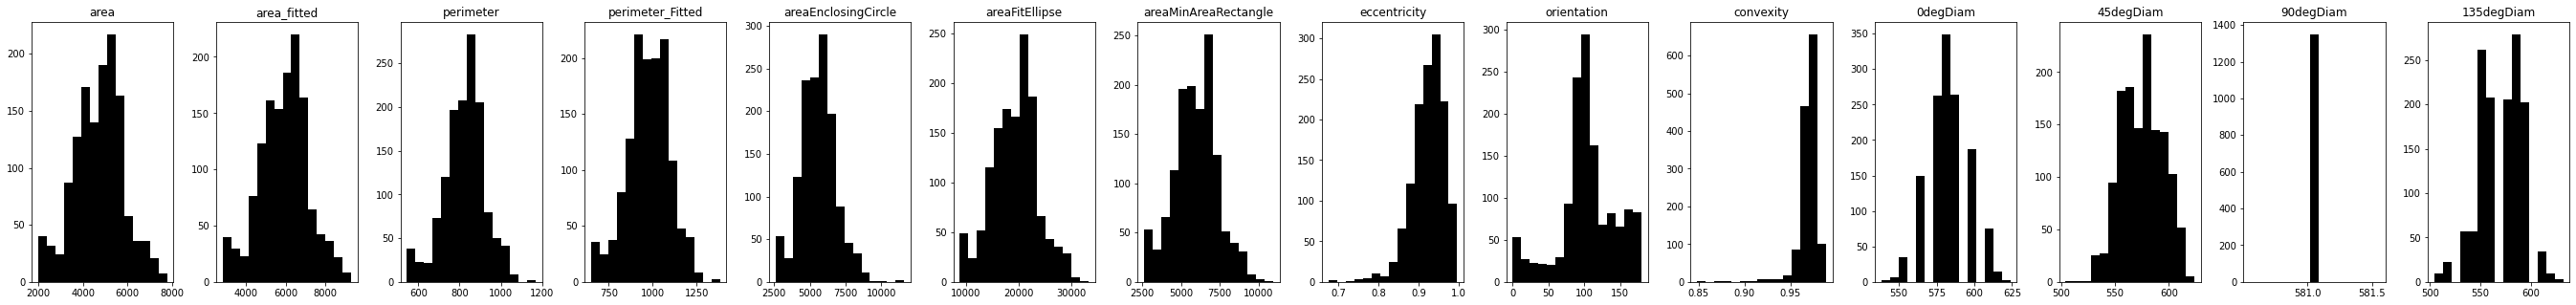

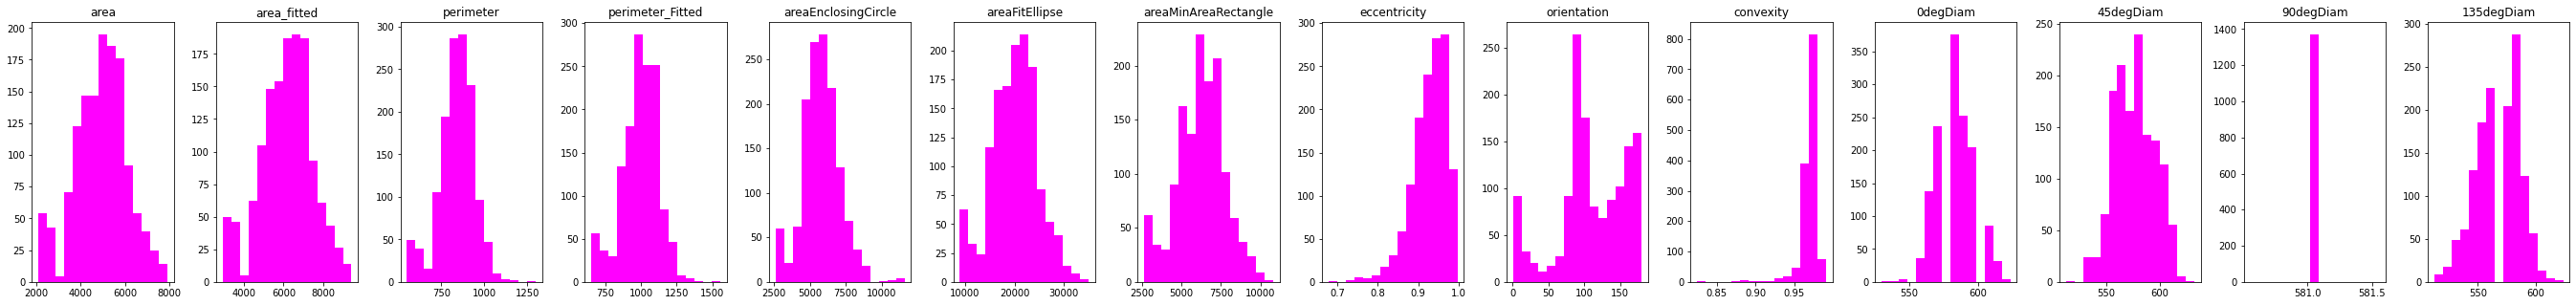

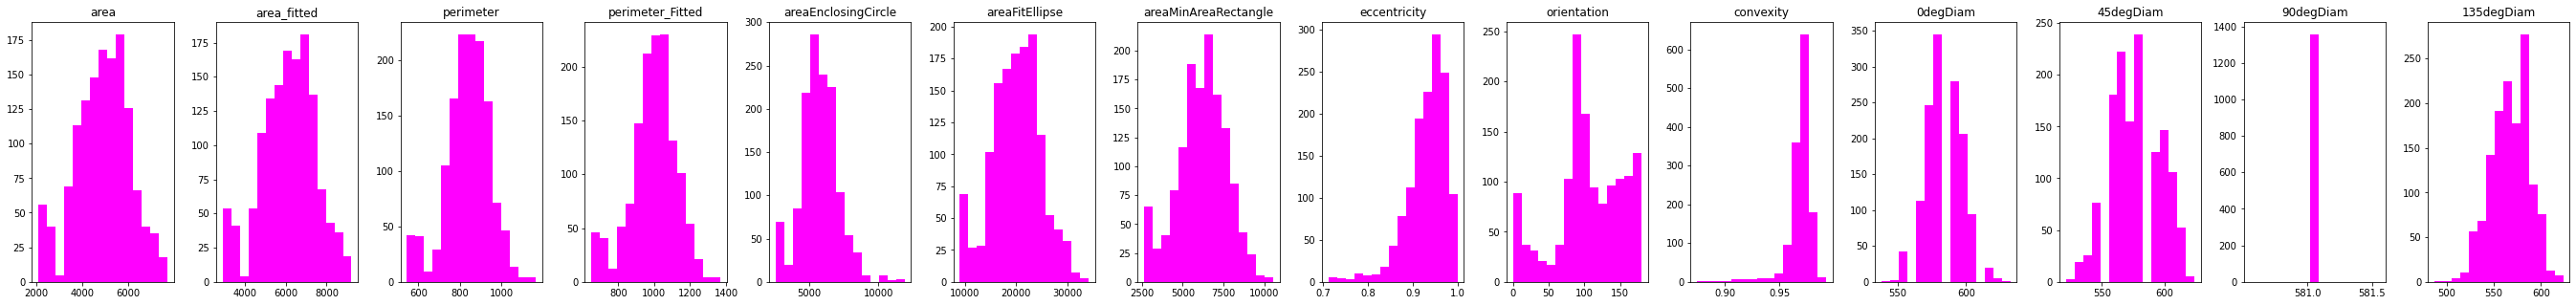

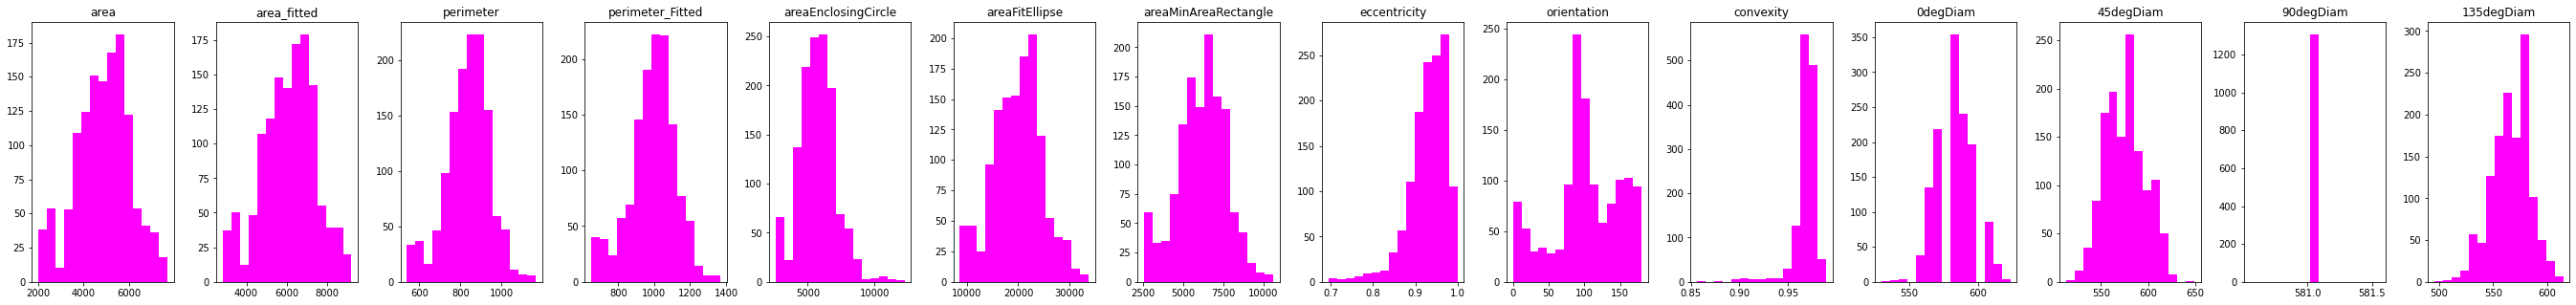

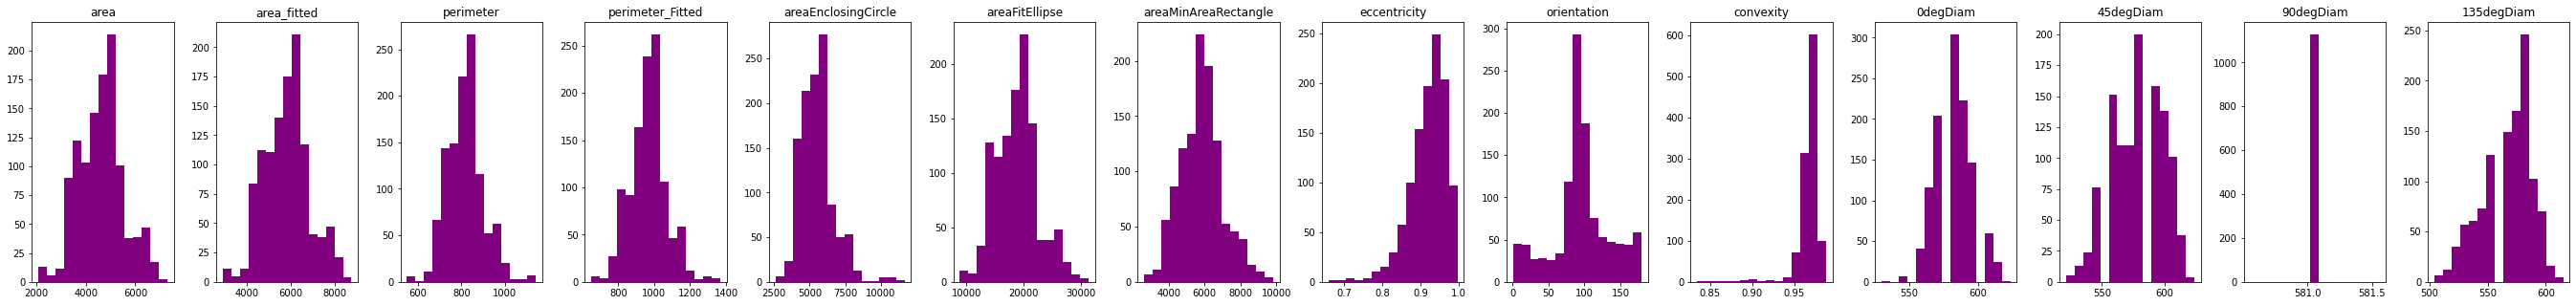

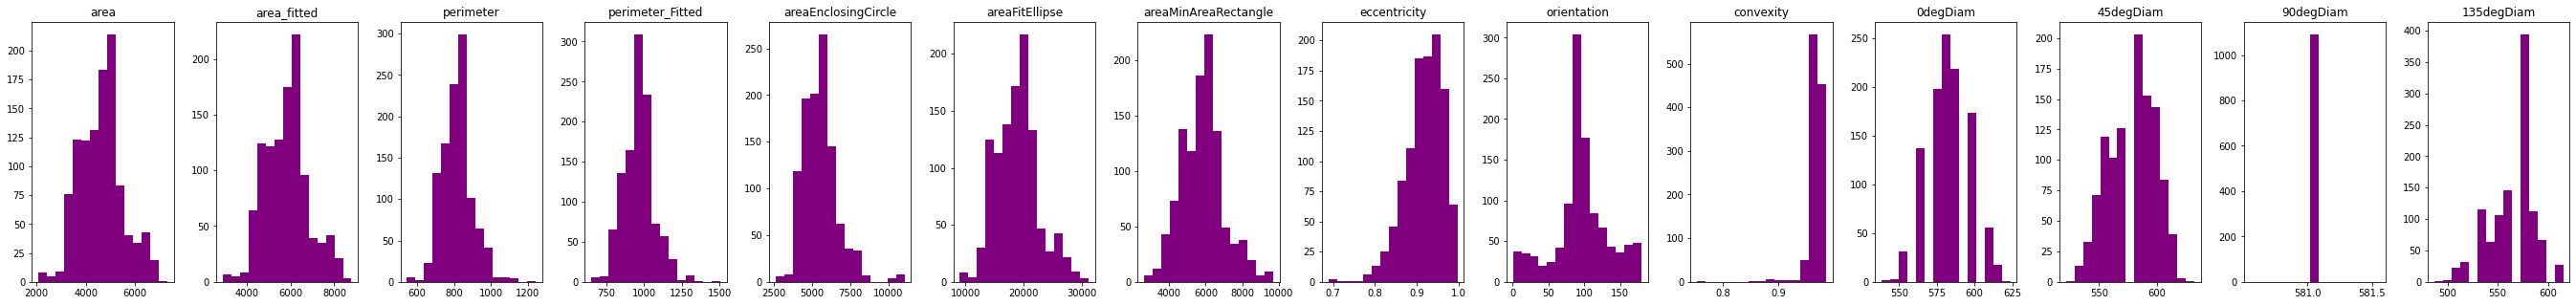

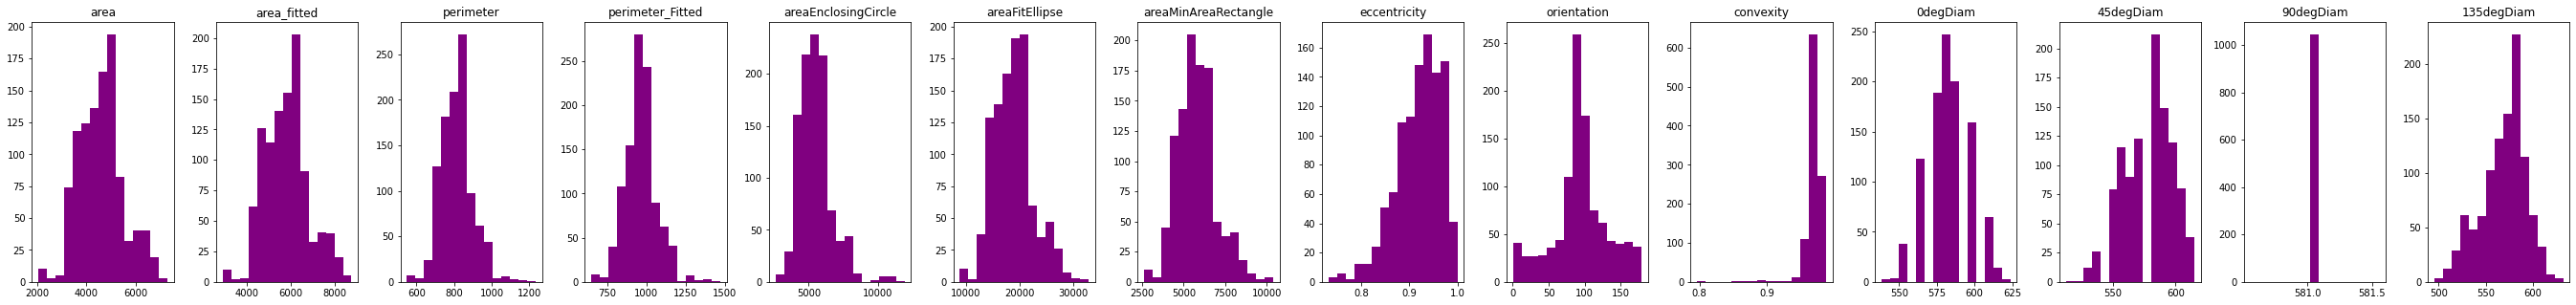

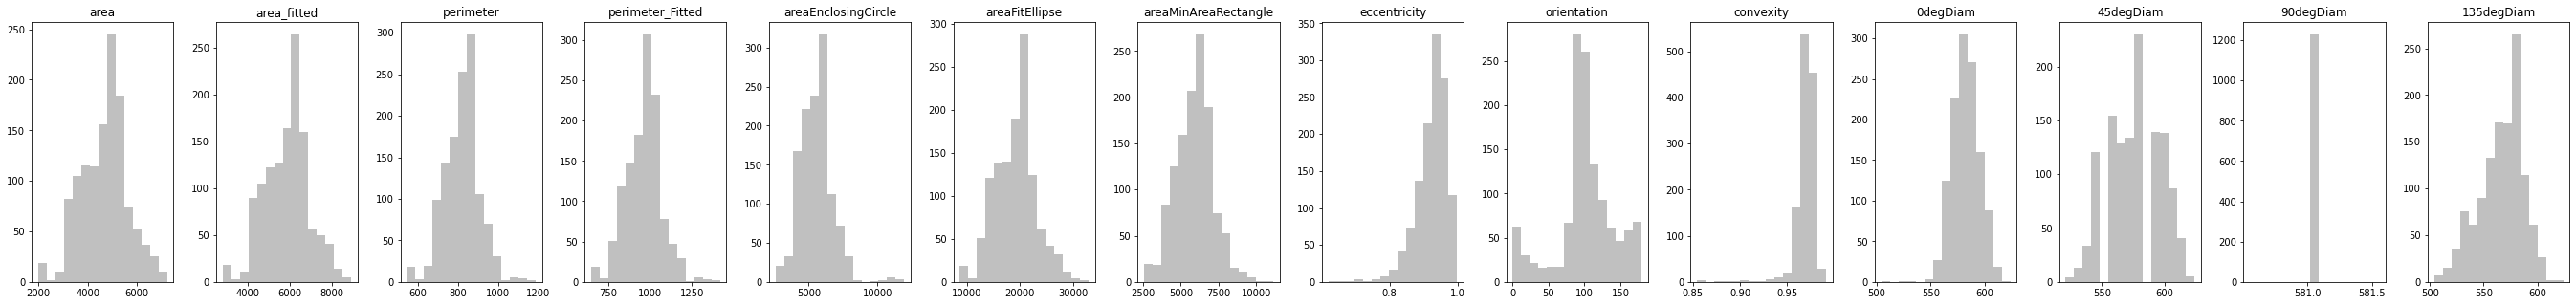

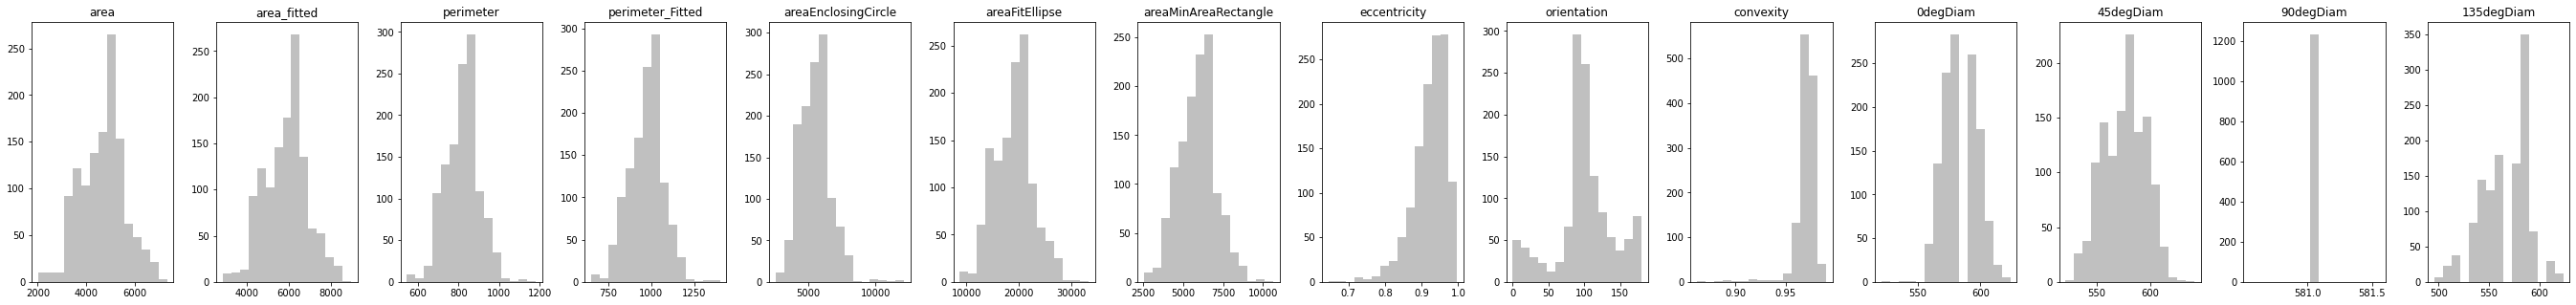

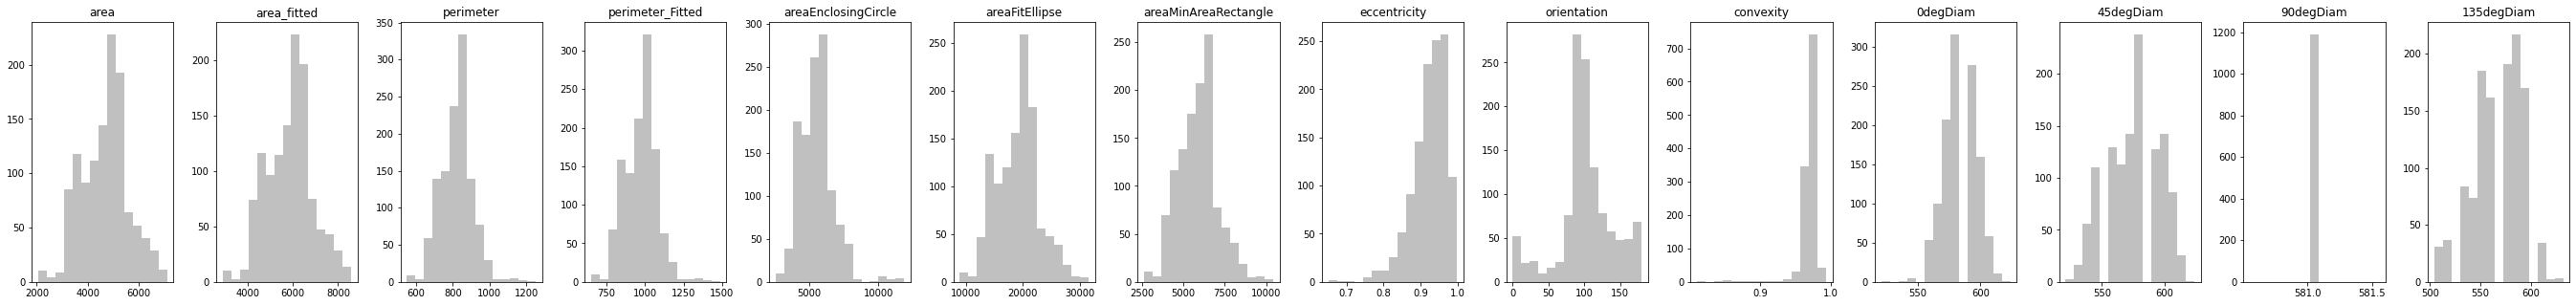

In [60]:
col=['green', 'blue', 'yellow', 'red', 'pink', 'orange', 'black', 'magenta', 'purple', 'silver']
dfl = (dfx[0][0].columns)
dfl0=dfl[3:(len(dfl))]

#for d in range(0, len(dfx[0])):
#    for f in range(0, len(dfx)):  
#        dff = dfx[f][d].copy(deep=False)
        #dff.hist(column=dfl0,
        #bins=15,               
        #grid=False,
        #figsize=(51, 5),
        #layout = (1, len(dfl0)+1),
        #orientation='vertical',
        #color=col[d]);
for d in range(0, len(dfx[0])):
    for f in range(0, len(dfx)):         
        dff = copy.deepcopy(dfx[f][d])       
        dff.hist(column=dfl0,
            bins=15,               
            grid=False,
            figsize=(51, 5),
            layout = (1, len(dfl0)+1),
            orientation='vertical',
            color=col[d]);

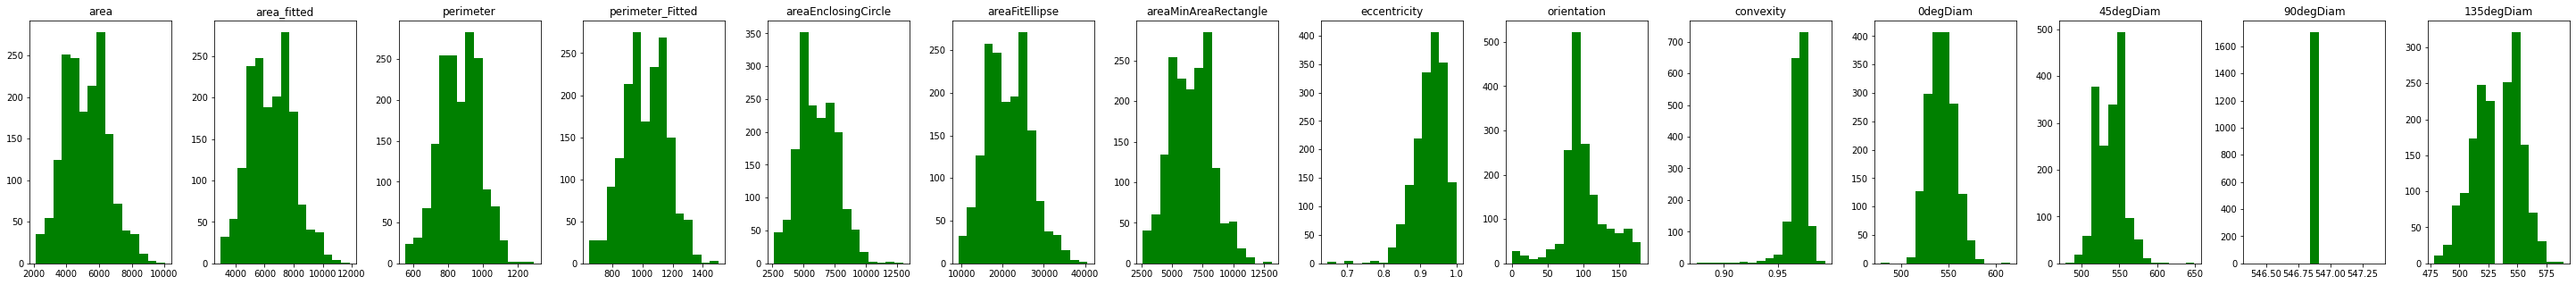

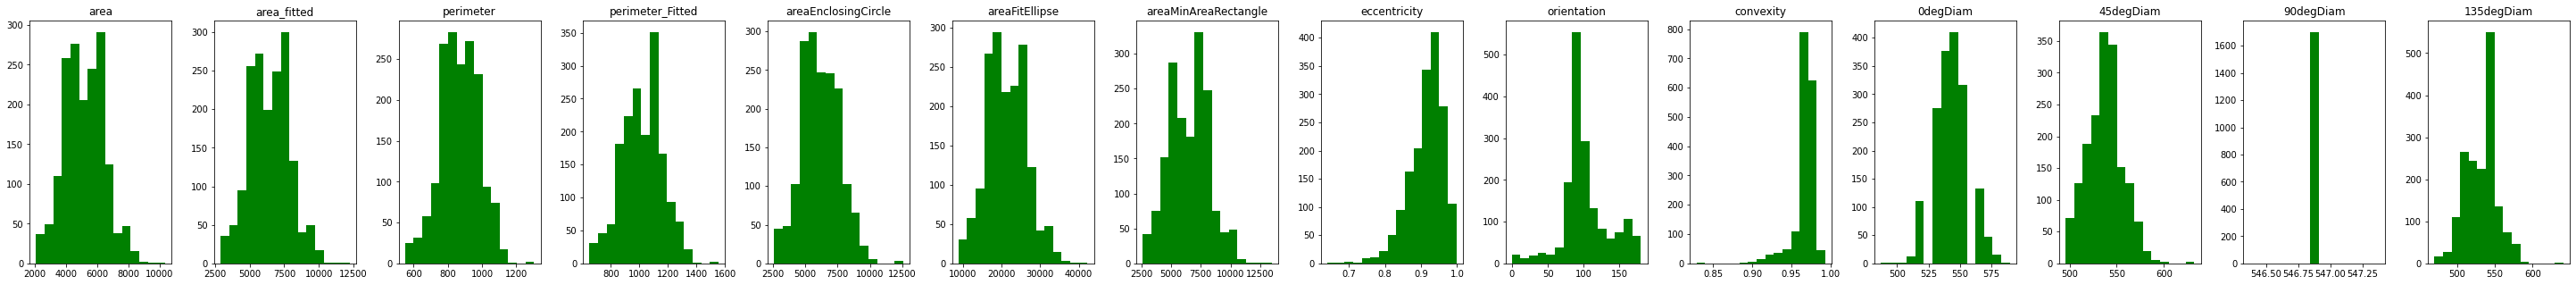

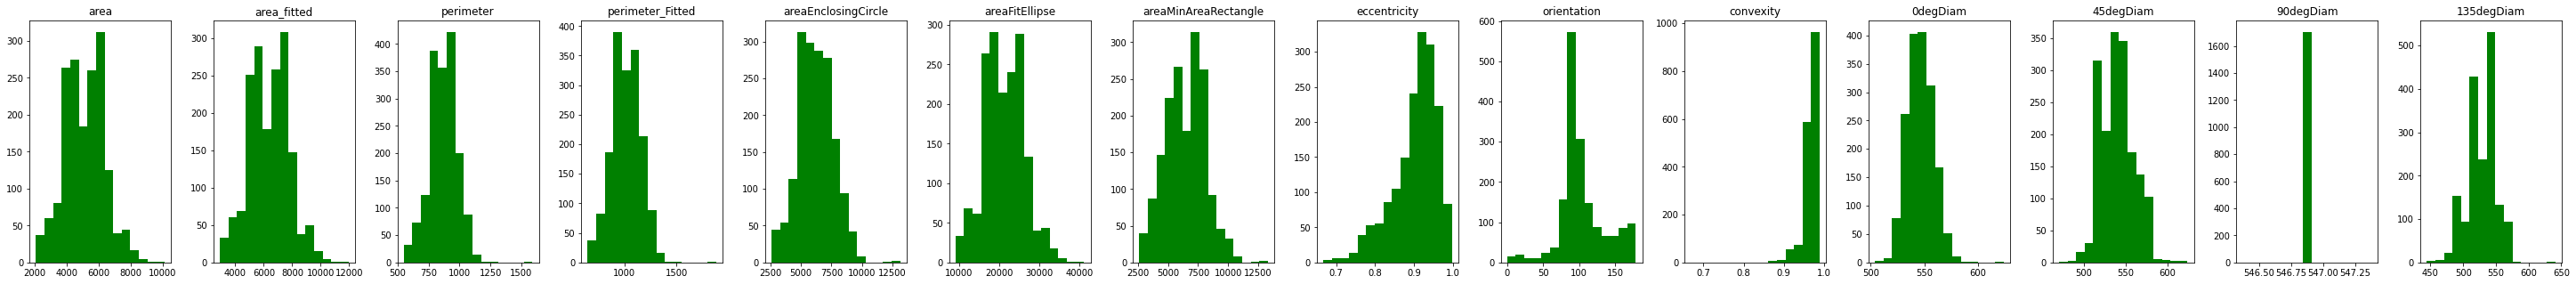

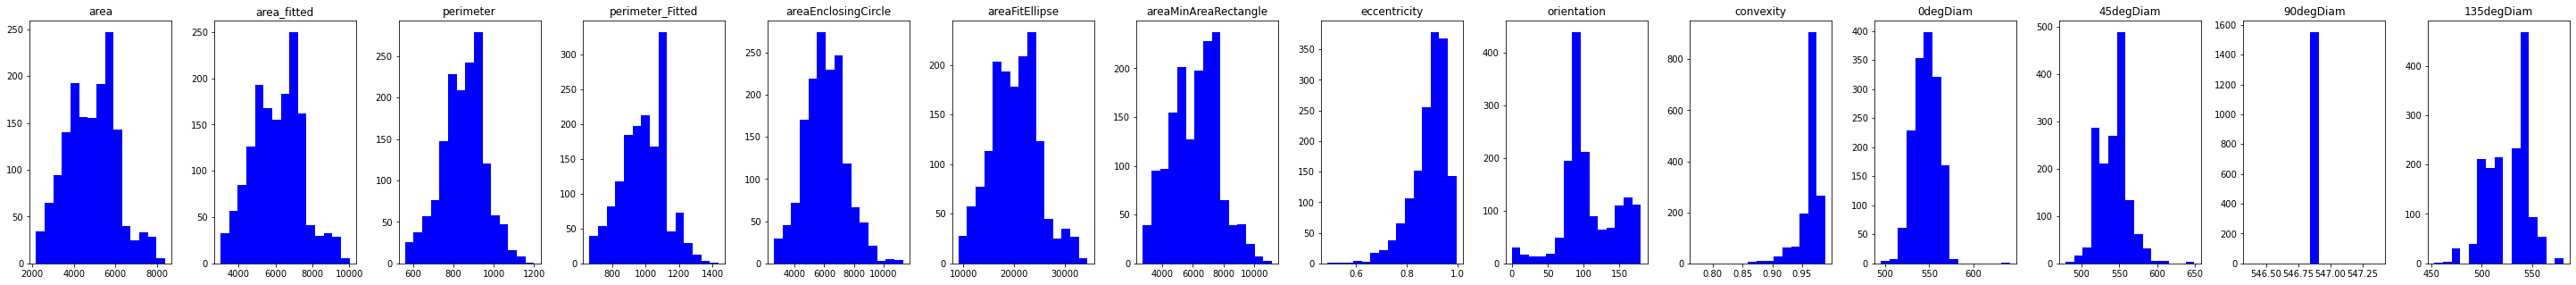

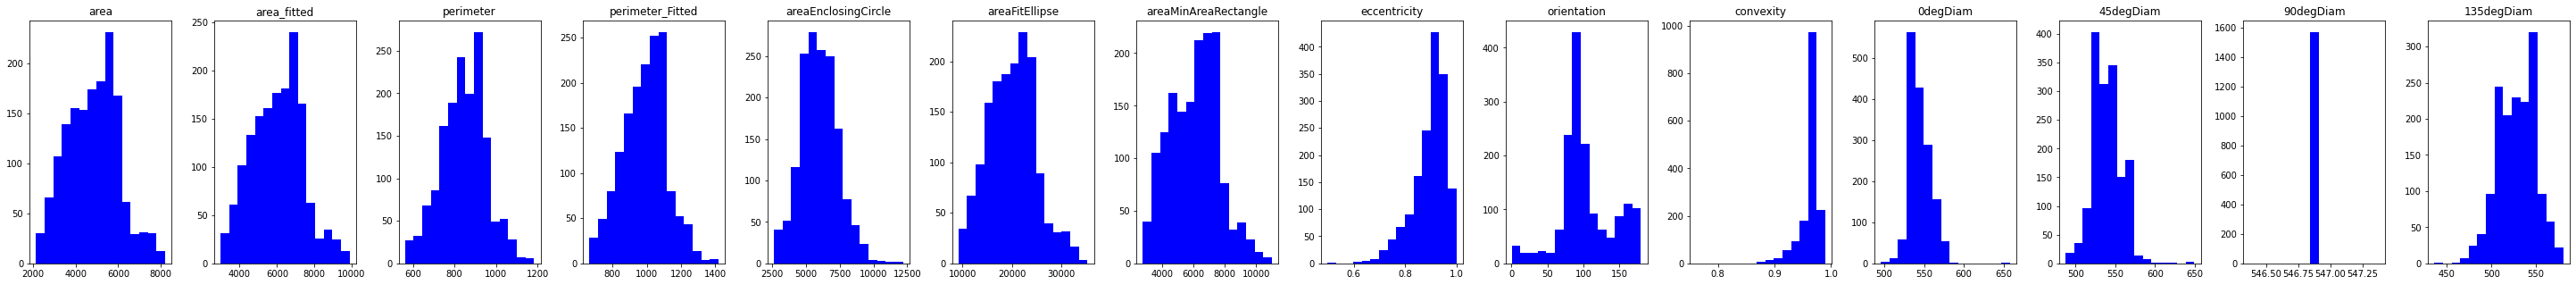

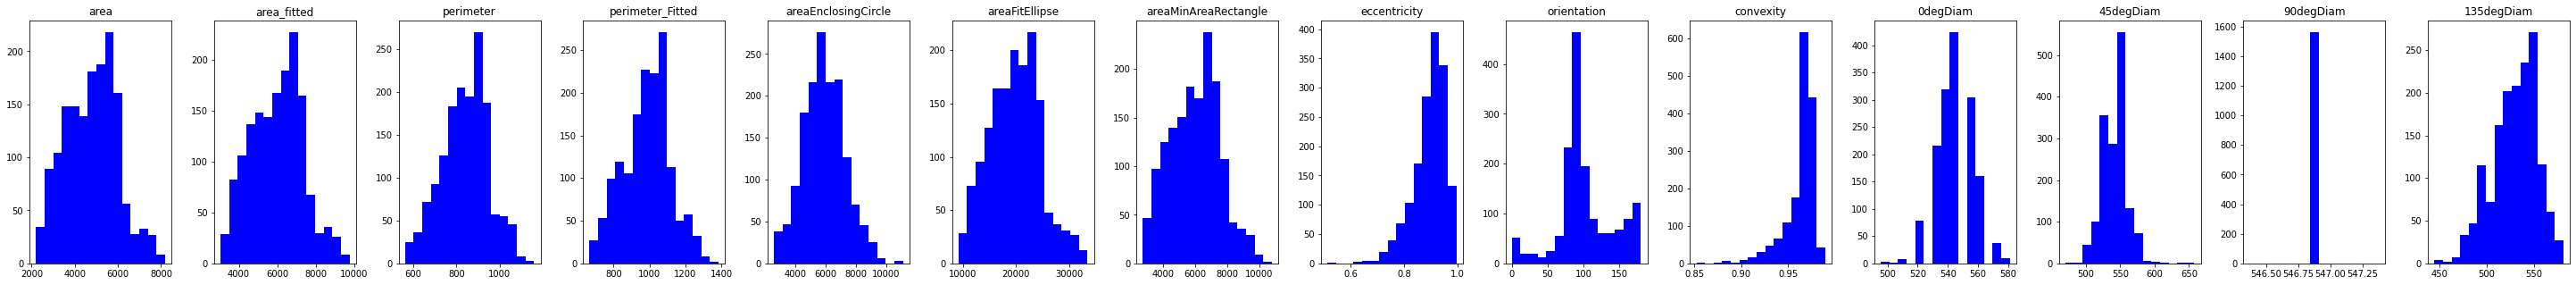

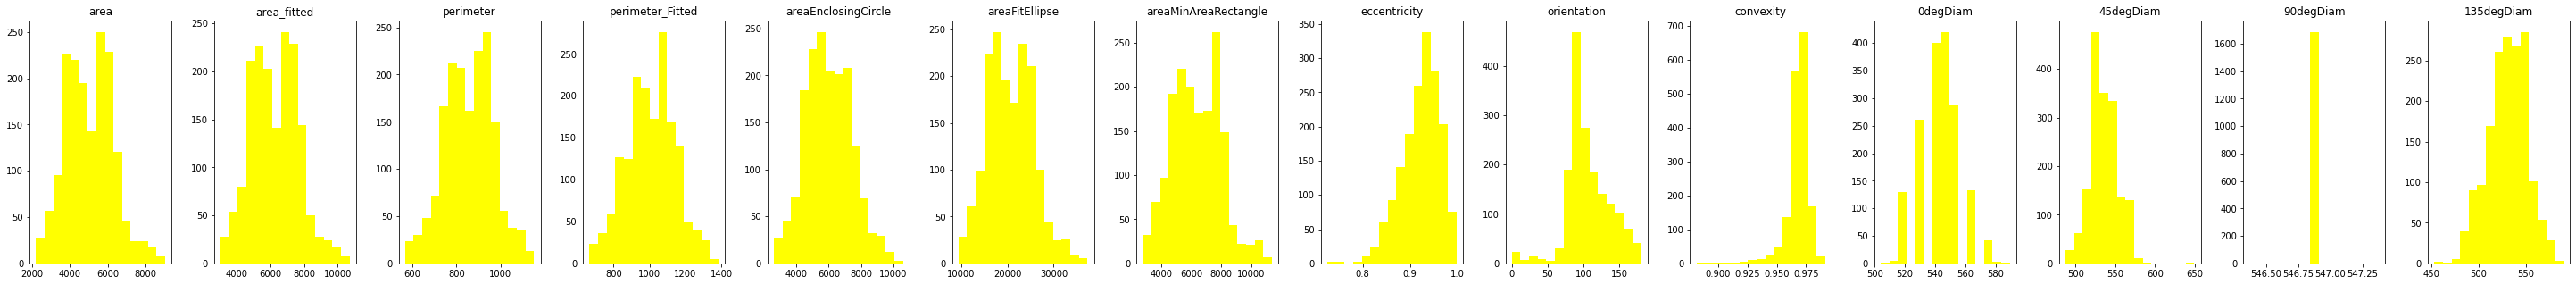

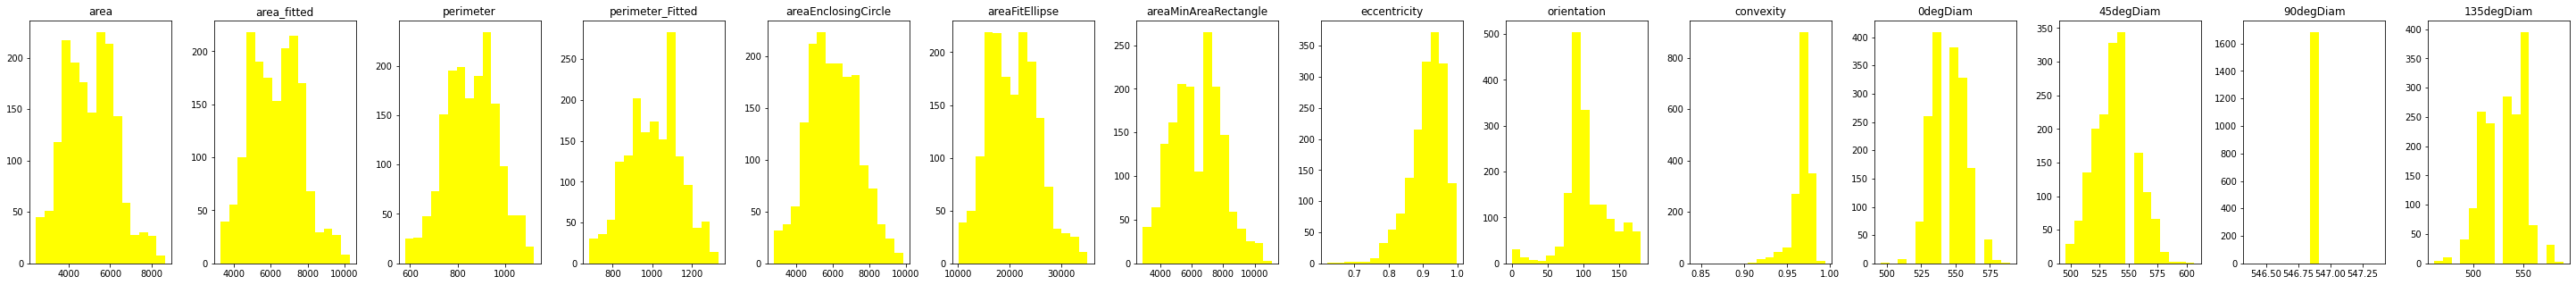

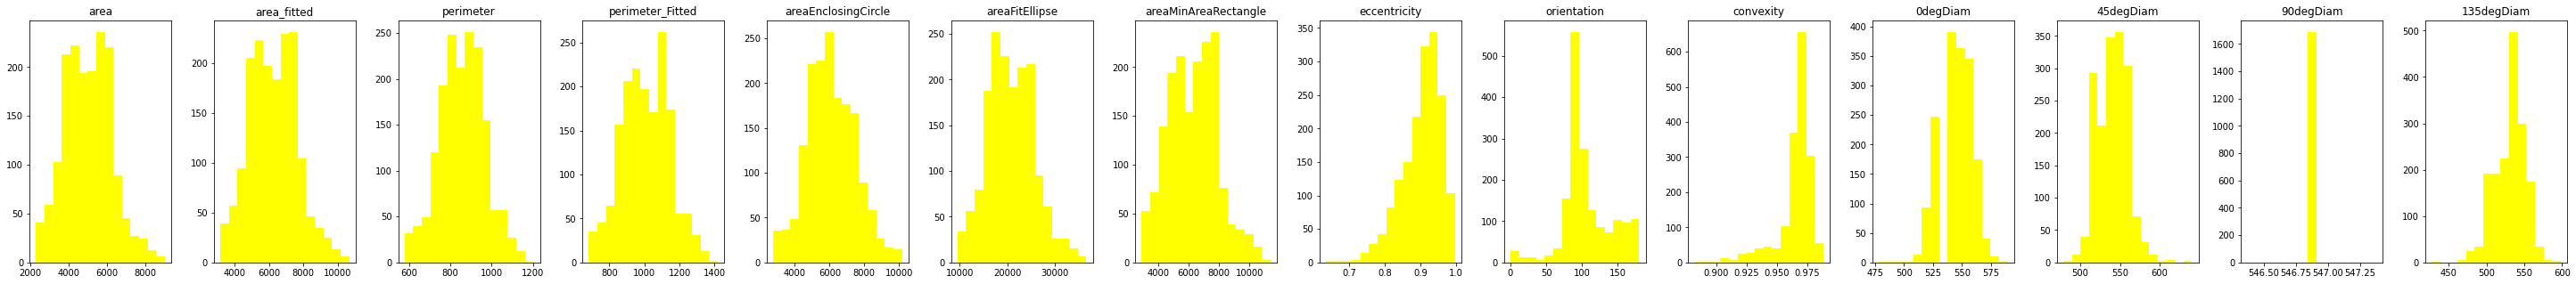

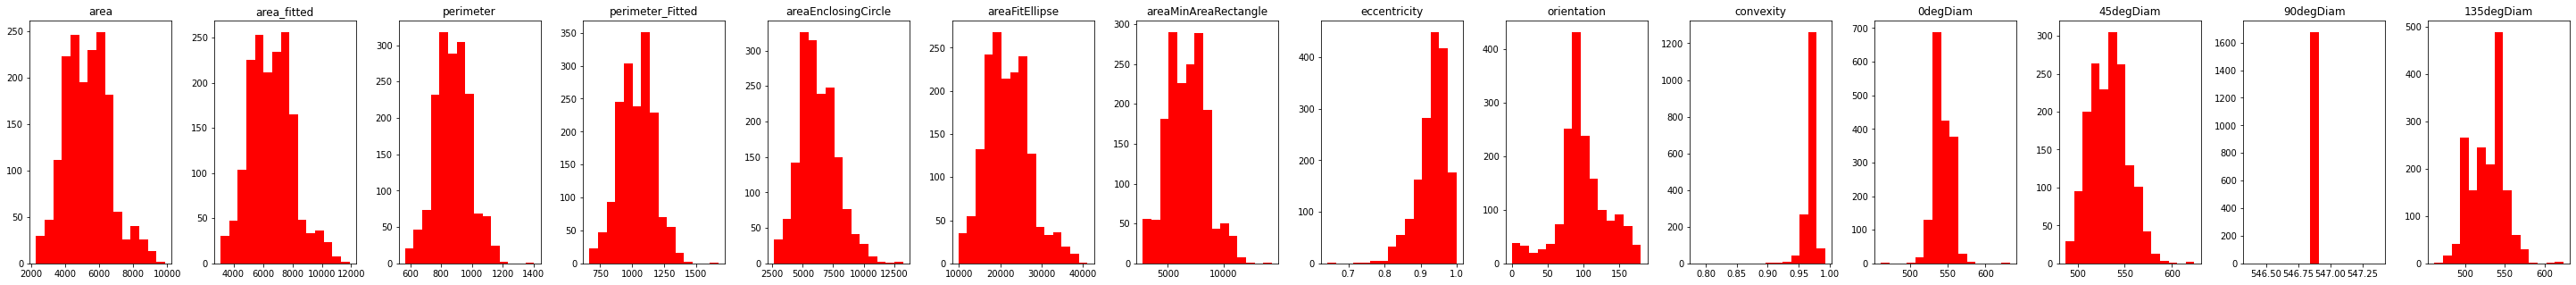

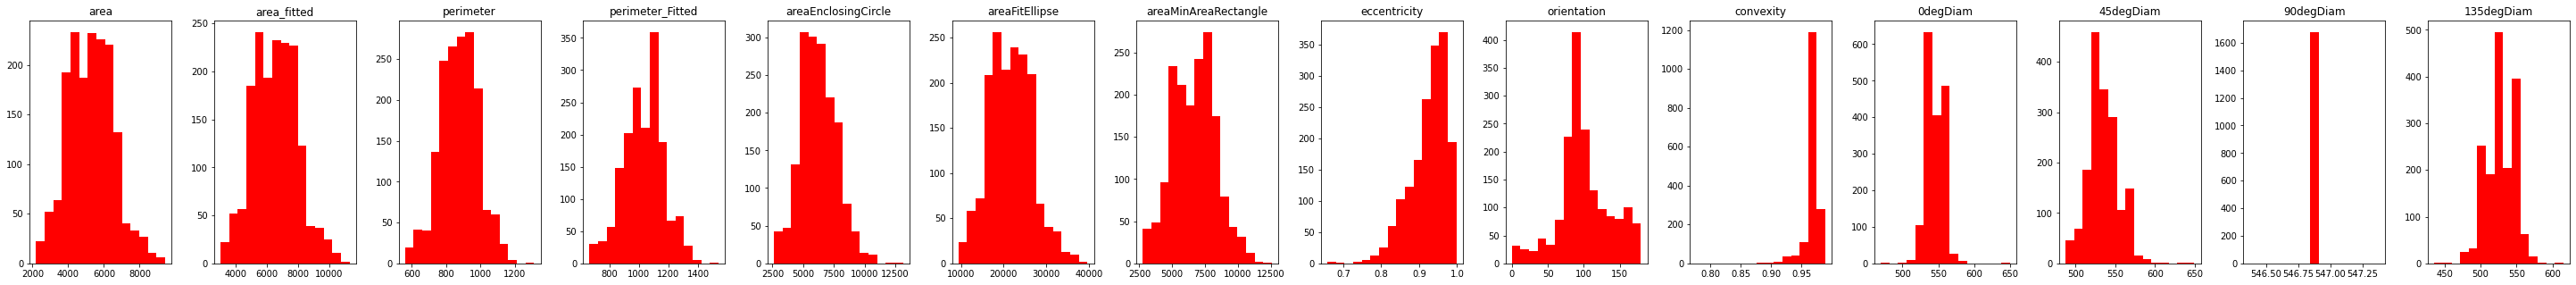

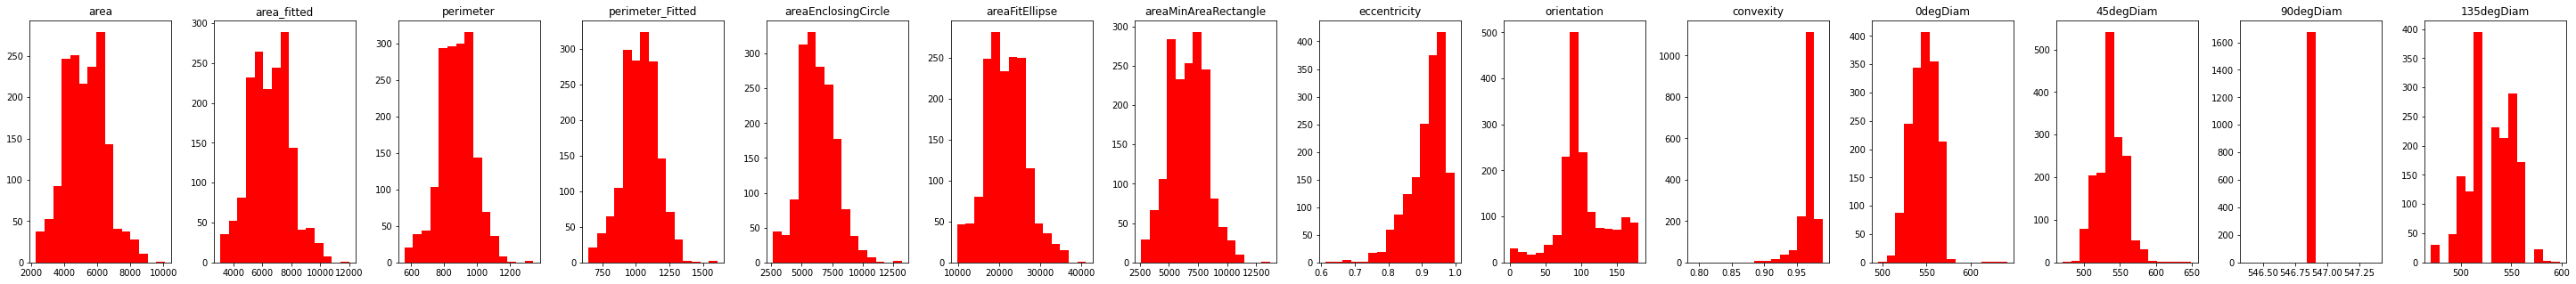

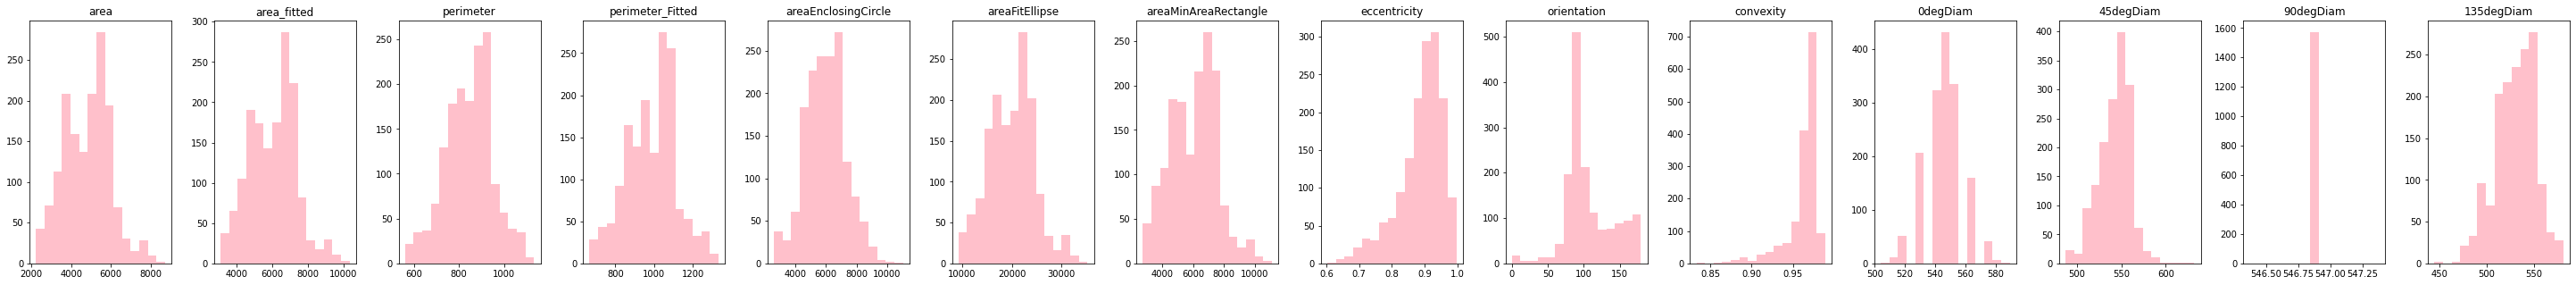

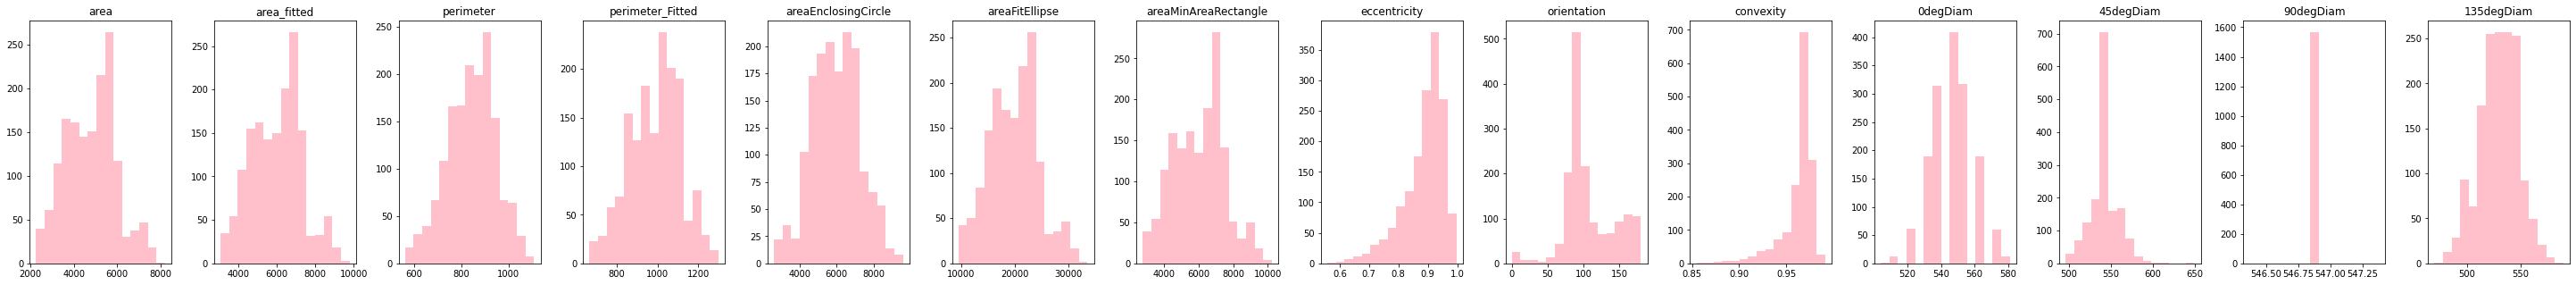

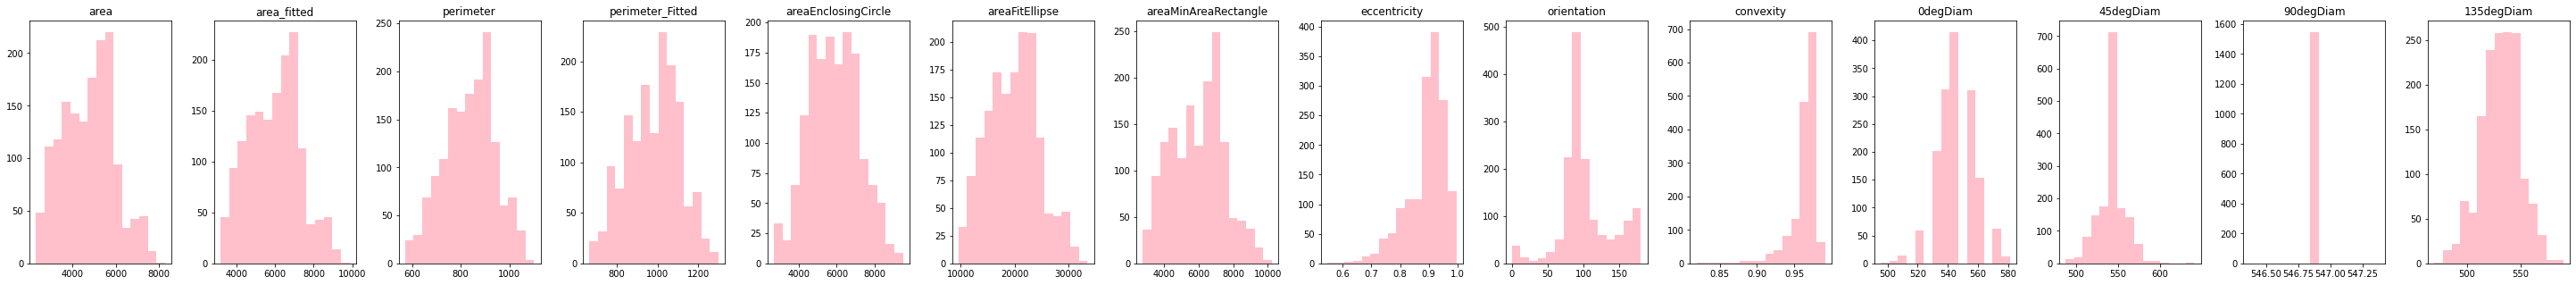

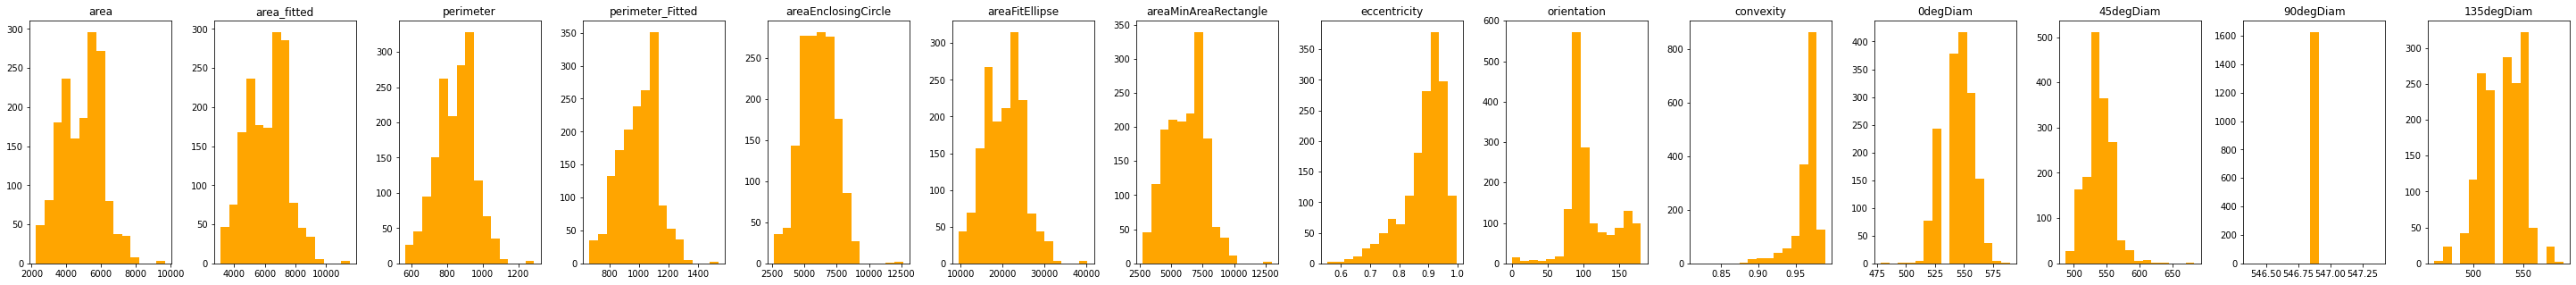

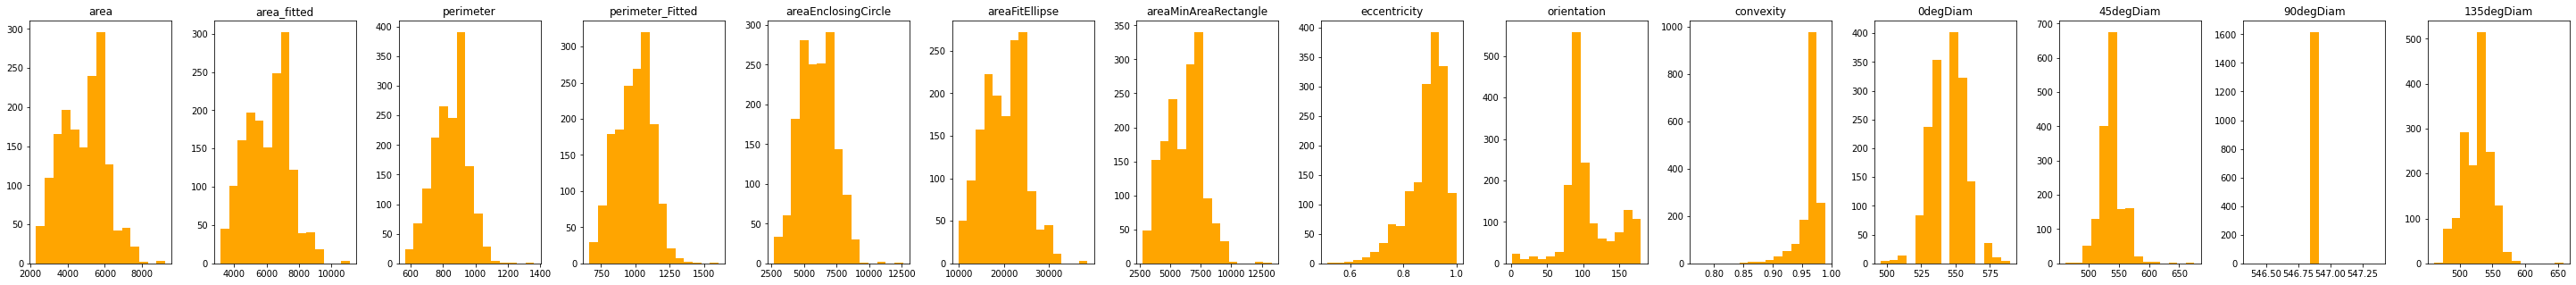

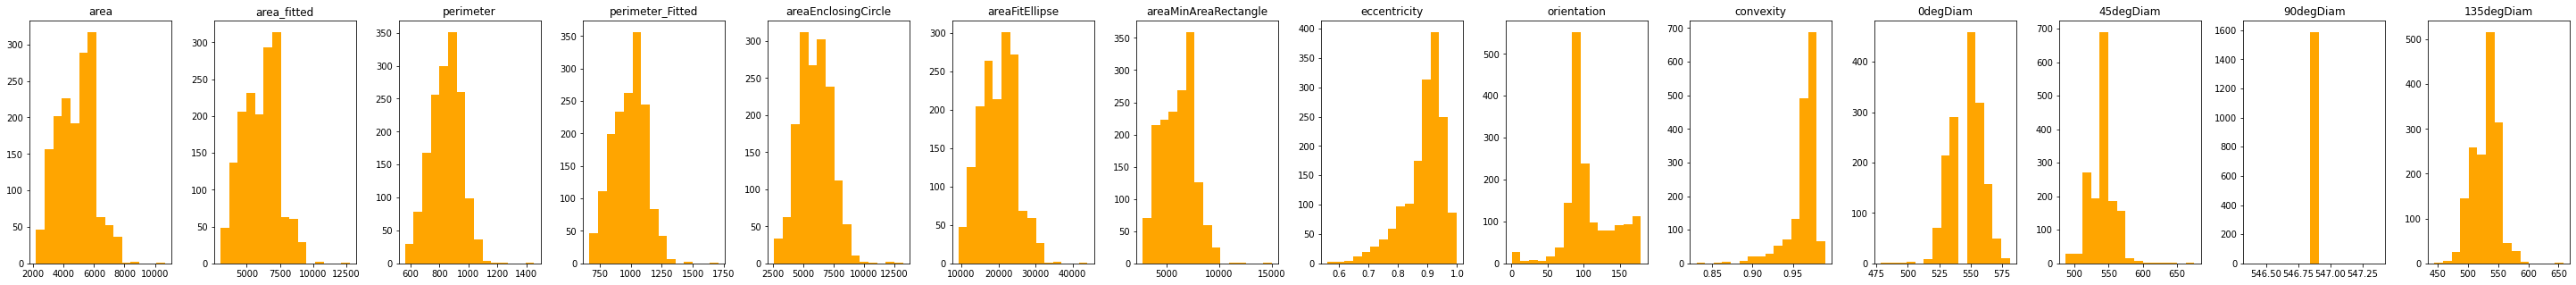

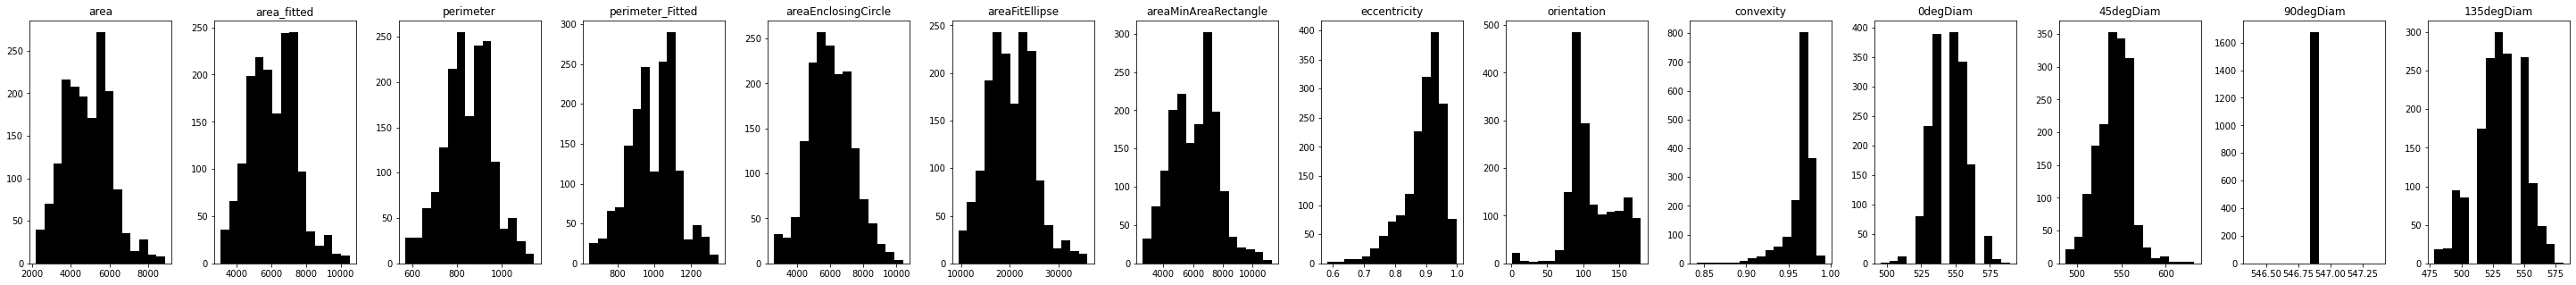

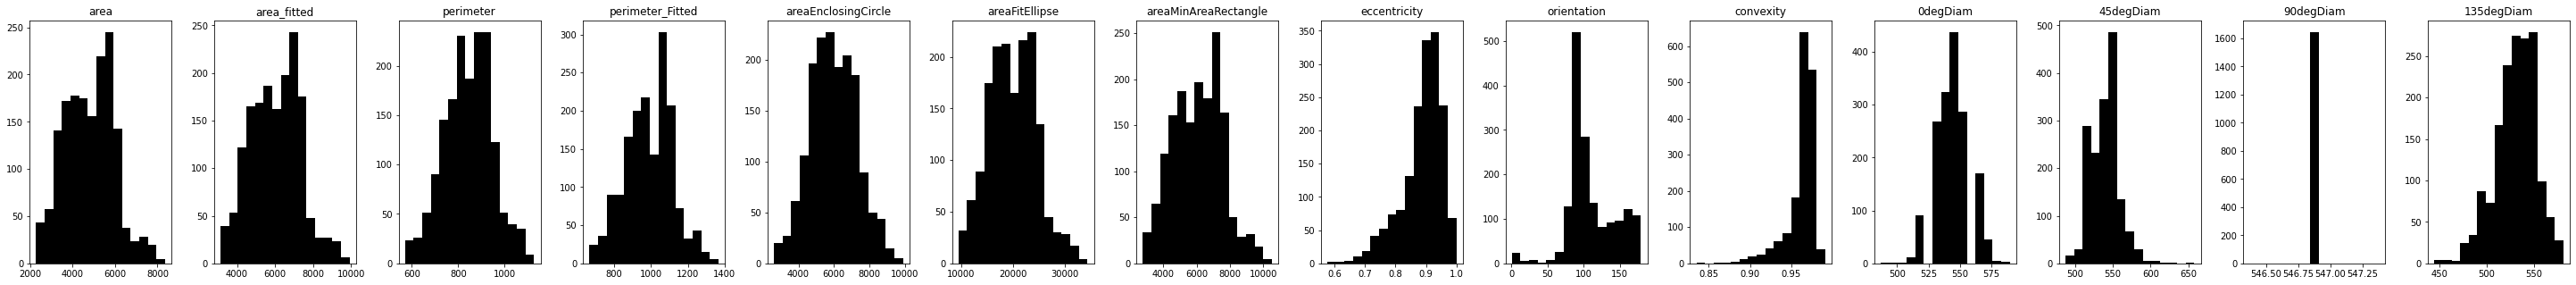

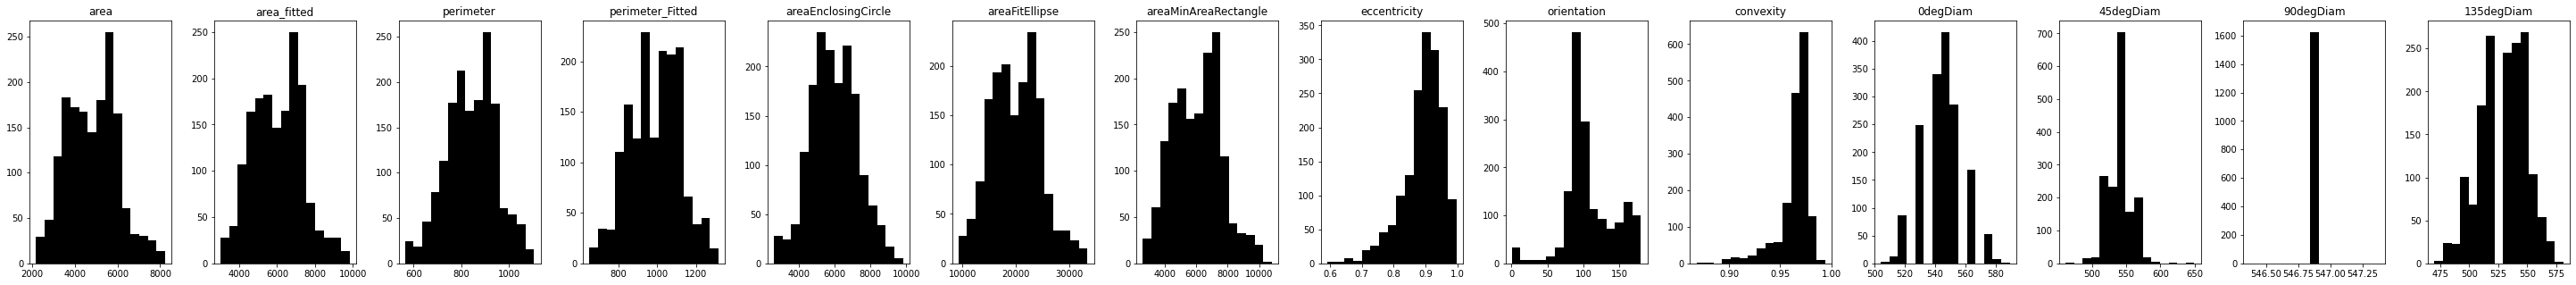

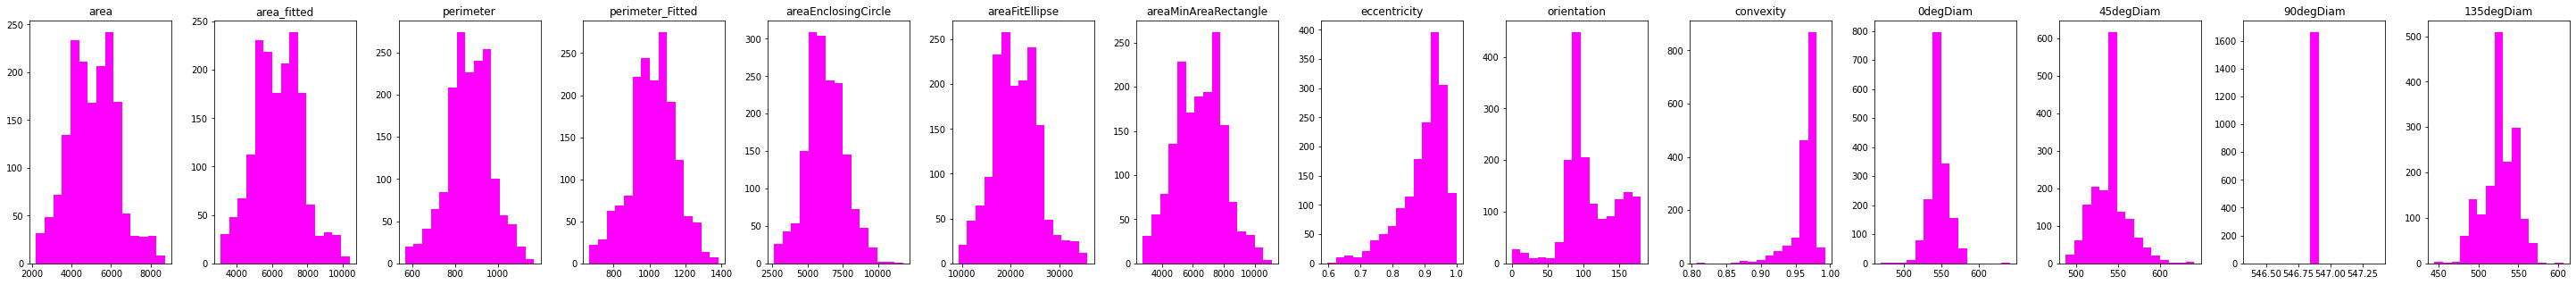

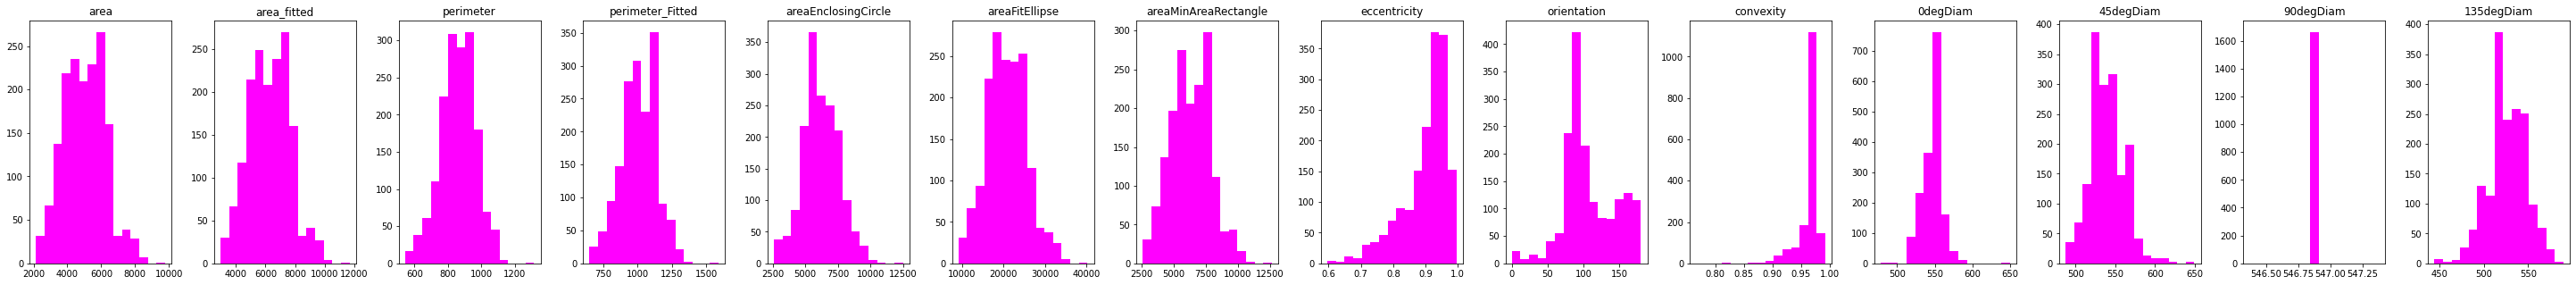

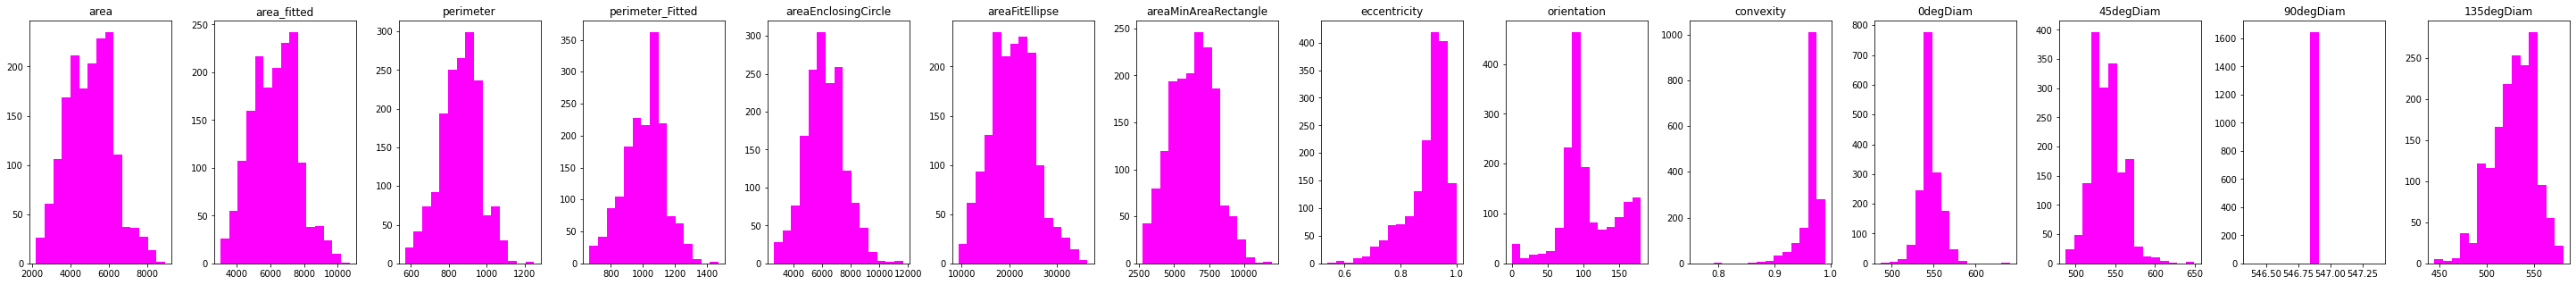

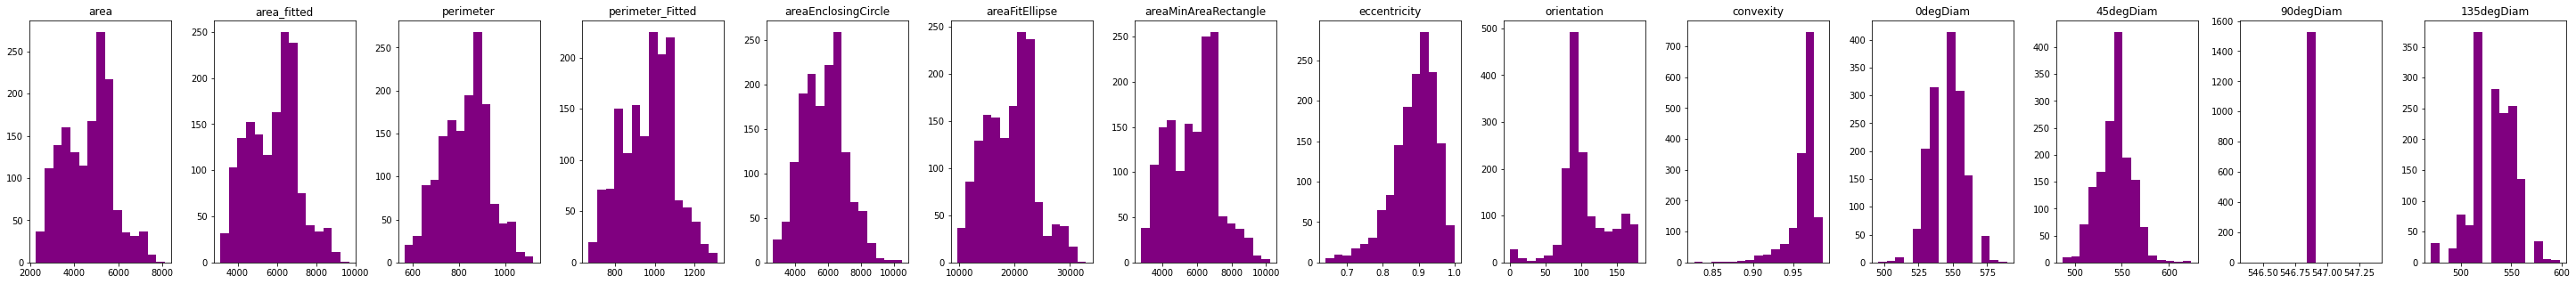

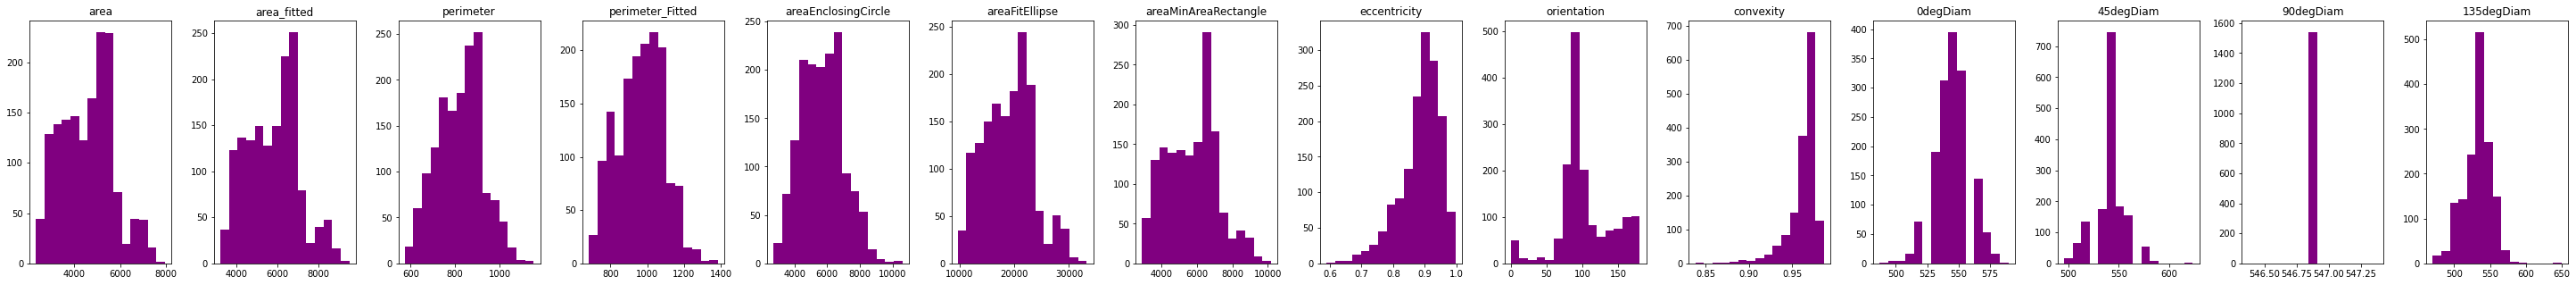

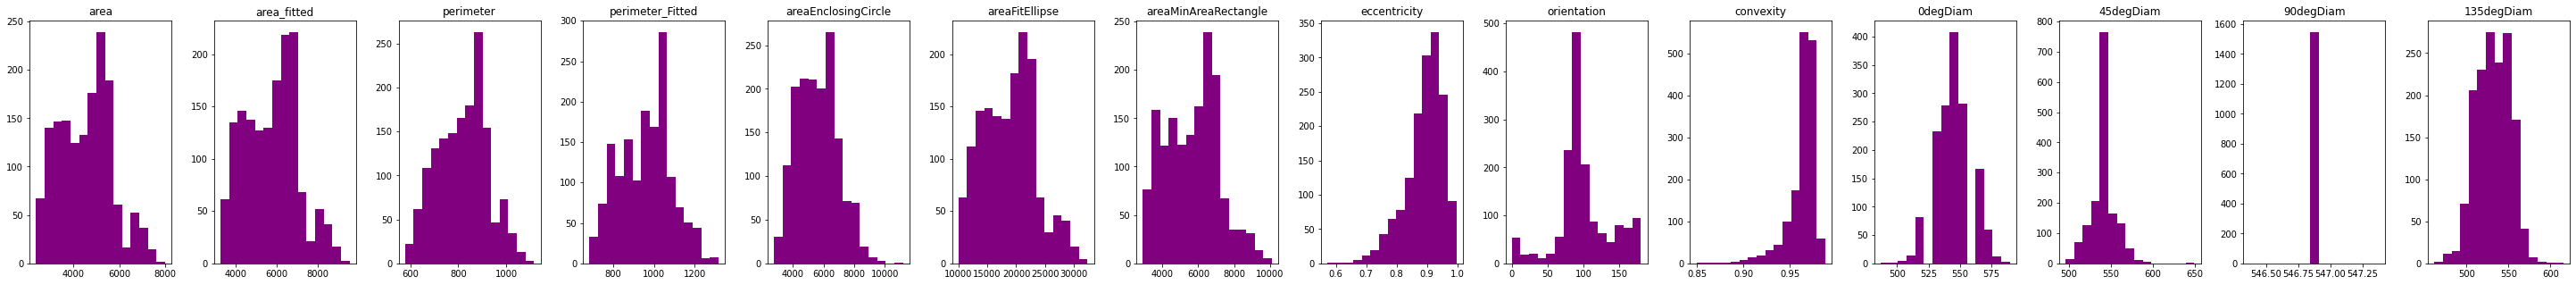

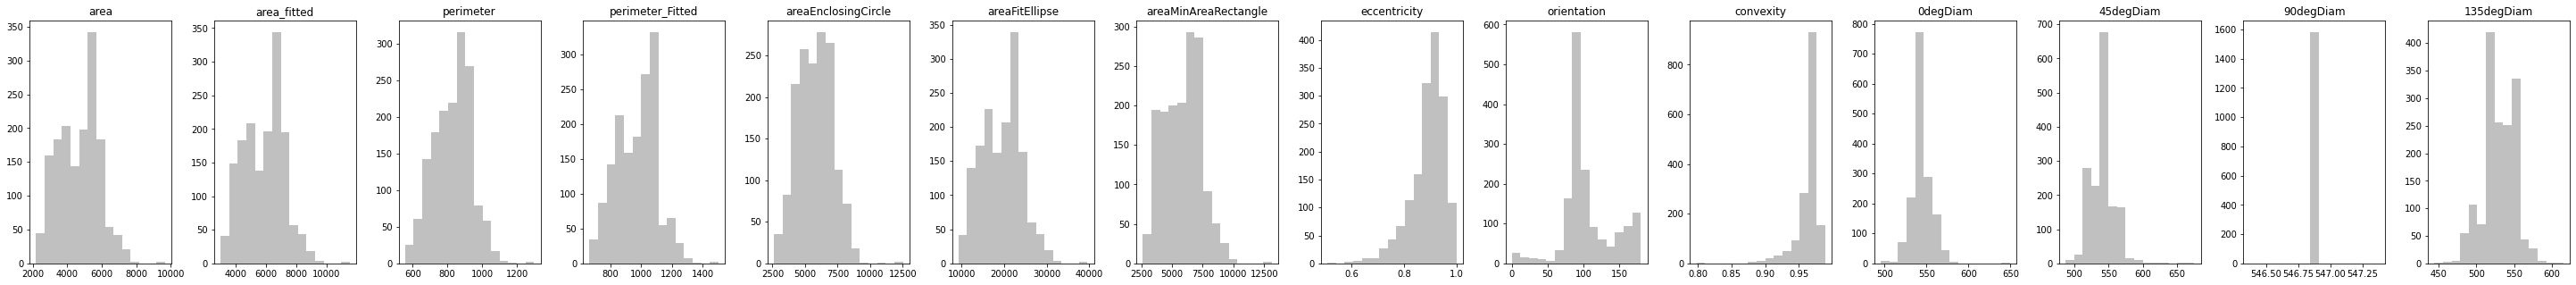

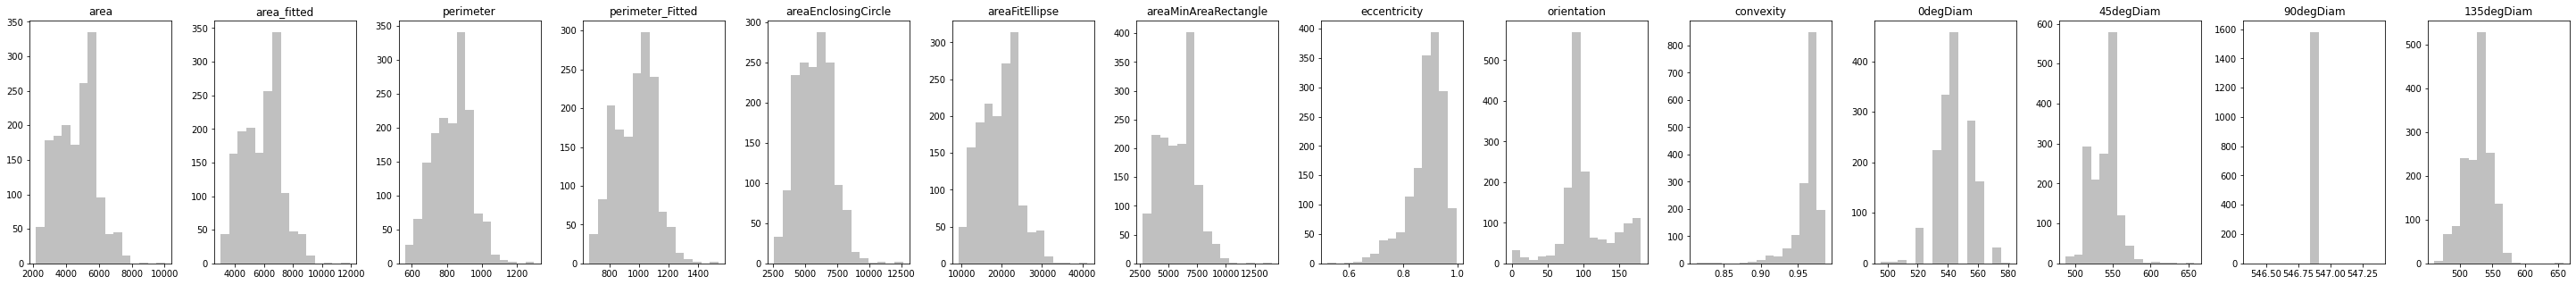

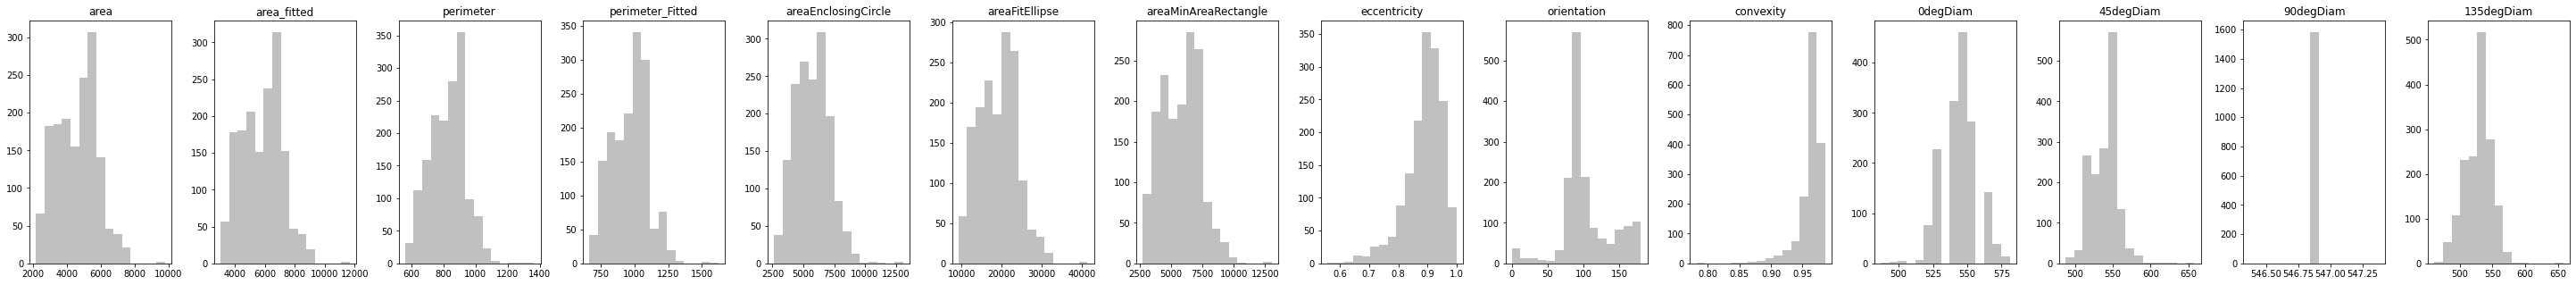

In [61]:
# do the same for enhanced data
for d in range(0, len(dfy[0])):
    for f in range(0, len(dfy)):  
        dff = dfy[f][d].copy(deep=False)
        dff.hist(column=dfl0, 
        bins=15,               
        grid=False,
        figsize=(51, 5),
        layout = (1, len(dfl0)),
        orientation='vertical',
        color=col[d]);

In [62]:
# for the purpose of exploring, let us normalize these dataframes
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        result[feature_name] = df[feature_name]
        if feature_name != 'file_name' and feature_name != 'label' and feature_name != 'location (X_Y)':
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = 100*(df[feature_name] - min_value) / (max_value - min_value)
    return result


for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):
        #dfx[f][d] = normalize(dfx[f][d])
        dfx[f][d] = dfx[f][d].dropna(axis=1) # some features with constant values result in NaN after scaling and should be removed

#sorting by label
for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):        
        dfx[f][d].sort_values(by=['label'], inplace=True)


for f in range(0, len(dfy)):
    for d in range(0, len(dfy[f])):
        #dfy[f][d] = normalize(dfy[f][d])
        dfy[f][d] = dfy[f][d].dropna(axis=1) # some features with constant values result in NaN after scaling and should be removed
        
#sorting by label
for f in range(0, len(dfy)):
    for d in range(0, len(dfy[f])):        
        dfy[f][d].sort_values(by=['label'], inplace=True)

In [63]:
#Let us calculate the mean of each feature in each file and put it in a dataframe
ddfx = copy.deepcopy(dfx)
for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):
        ddfx[f][d] = ddfx[f][d].drop(['file_name', 'label', 'location (X_Y)'], axis=1)
df=[]
for d in range(0, len(ddfx[0])):
    for f in range(0, len(ddfx)):
        answer = ddfx[f][d].mean(axis='index')
        df.append(pd.DataFrame(answer).transpose())    
dfx_mean = pd.concat(df) 

dfx_mean.head()

0         area  area_fitted   perimeter  perimeter_Fitted  \
0  4941.179260  6167.154966  838.719958        993.431853   
0  4938.090822  6164.133451  838.873334        993.347182   
0  4893.048154  6116.143286  837.089326        990.451647   
0  4718.181749  5926.429208  826.977766        977.054536   
0  4716.988947  5925.155653  826.897697        977.163417   

0  areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
0          5690.074483    20208.477784           6242.728863      0.940988   
0          5706.088219    20193.975718           6232.783280      0.938623   
0          5693.101066    20020.898421           6185.762248      0.935865   
0          5612.238064    19386.926873           5982.699584      0.923045   
0          5615.420173    19382.610537           5976.521132      0.924289   

0  orientation  convexity    0degDiam   45degDiam  90degDiam  135degDiam  
0   112.844637   0.971605  582.065200  577.462376   581.0547  570.361039  
0   111.660338   0.971902  582.744954  578.180683   581.0547  570.412074  
0   109.398271   0.970167  583.783783  578.083496   581.0547  570.061283  
0   100.536860   0.967238  583.077969  576.752761   581.0547  565.909550  
0    96.811991   0.967636  584.189592  575.228002   581.0547  565.975414

#### The histograms show that there are files (dataframes) with no data and columns with all data being same. Thease may give rise to NaN values when we normalize the data and/or calculate basic statistics such as mean and standard deviation.

#### Next step is to clean up dataframe of basic statistics and get rid of NaN

In [64]:
dfx_mean = dfx_mean.drop(['90degDiam'], axis=1)
dfx_mean.head(20)

0         area  area_fitted   perimeter  perimeter_Fitted  \
0  4941.179260  6167.154966  838.719958        993.431853   
0  4938.090822  6164.133451  838.873334        993.347182   
0  4893.048154  6116.143286  837.089326        990.451647   
0  4718.181749  5926.429208  826.977766        977.054536   
0  4716.988947  5925.155653  826.897697        977.163417   
0  4700.005232  5906.894982  826.051302        975.866339   
0  4827.205452  6041.995887  830.919434        983.623295   
0  4833.873431  6049.177964  831.257651        984.050271   
0  4828.314380  6043.348096  831.202451        983.648340   
0  5058.942014  6302.287711  851.696244       1007.995619   
0  5058.503782  6302.143091  851.555553       1008.524484   
0  5031.109421  6272.666057  850.413030       1006.315951   
0  4723.253807  5931.444589  826.888345        977.275541   
0  4716.657964  5923.359865  825.639028        976.033739   
0  4717.524780  5924.684620  826.319435        976.016662   
0  4789.789446  6002.684640  830.117018        981.324058   
0  4786.796276  5999.600658  829.972186        981.458175   
0  4769.166006  5981.293905  829.348822        980.930753   
0  4708.068256  5911.137483  822.766541        973.198303   
0  4733.367348  5940.710034  826.107688        976.699531   

0  areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
0          5690.074483    20208.477784           6242.728863      0.940988   
0          5706.088219    20193.975718           6232.783280      0.938623   
0          5693.101066    20020.898421           6185.762248      0.935865   
0          5612.238064    19386.926873           5982.699584      0.923045   
0          5615.420173    19382.610537           5976.521132      0.924289   
0          5601.458702    19323.541913           5954.526730      0.922425   
0          5597.002227    19753.155315           6101.470129      0.938709   
0          5619.821382    19784.377217           6105.768768      0.935428   
0          5622.438506    19767.662301           6097.381153      0.933822   
0          5860.692868    20697.392931           6405.090058      0.941137   
0          5867.134936    20688.928092           6406.278824      0.936716   
0          5869.392676    20599.931831           6368.279728      0.934445   
0          5593.366469    19382.682155           5973.841761      0.922523   
0          5585.090023    19351.112278           5957.606399      0.923306   
0          5597.943036    19370.923032           5957.693138      0.923213   
0          5628.370083    19616.006617           6040.614161      0.925810   
0          5630.241194    19616.269728           6042.395818      0.925545   
0          5626.037891    19538.361492           6025.102998      0.923351   
0          5540.269268    19285.037069           5955.556467      0.926395   
0          5586.956617    19403.034779           5982.427128      0.924368   

0  orientation  convexity    0degDiam   45degDiam  135degDiam  
0   112.844637   0.971605  582.065200  577.462376  570.361039  
0   111.660338   0.971902  582.744954  578.180683  570.412074  
0   109.398271   0.970167  583.783783  578.083496  570.061283  
0   100.536860   0.967238  583.077969  576.752761  565.909550  
0    96.811991   0.967636  584.189592  575.228002  565.975414  
0    93.632347   0.967451  582.262925  575.443097  565.421441  
0   115.056621   0.970646  583.844268  578.476528  570.976962  
0   110.827044   0.970913  584.494852  578.233635  570.623222  
0   105.394323   0.970486  583.664323  576.829566  568.385240  
0   113.973623   0.970080  581.845886  577.149567  570.650451  
0   113.113943   0.970452  583.643889  576.105565  568.611981  
0   109.537906   0.969588  584.278658  575.369285  567.385055  
0    98.573863   0.968292  582.751693  577.234761  567.432058  
0    97.989245   0.968929  584.026836  577.779821  567.645627  
0    93.975607   0.968712  583.495028  576.711329  567.688786  
0   105.631166   0.969748  582.789889  576.629303  567.

In [65]:
dfx_mean = dfx_mean.dropna(axis=0)
dfx_mean.head(20)

0         area  area_fitted   perimeter  perimeter_Fitted  \
0  4941.179260  6167.154966  838.719958        993.431853   
0  4938.090822  6164.133451  838.873334        993.347182   
0  4893.048154  6116.143286  837.089326        990.451647   
0  4718.181749  5926.429208  826.977766        977.054536   
0  4716.988947  5925.155653  826.897697        977.163417   
0  4700.005232  5906.894982  826.051302        975.866339   
0  4827.205452  6041.995887  830.919434        983.623295   
0  4833.873431  6049.177964  831.257651        984.050271   
0  4828.314380  6043.348096  831.202451        983.648340   
0  5058.942014  6302.287711  851.696244       1007.995619   
0  5058.503782  6302.143091  851.555553       1008.524484   
0  5031.109421  6272.666057  850.413030       1006.315951   
0  4723.253807  5931.444589  826.888345        977.275541   
0  4716.657964  5923.359865  825.639028        976.033739   
0  4717.524780  5924.684620  826.319435        976.016662   
0  4789.789446  6002.684640  830.117018        981.324058   
0  4786.796276  5999.600658  829.972186        981.458175   
0  4769.166006  5981.293905  829.348822        980.930753   
0  4708.068256  5911.137483  822.766541        973.198303   
0  4733.367348  5940.710034  826.107688        976.699531   

0  areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
0          5690.074483    20208.477784           6242.728863      0.940988   
0          5706.088219    20193.975718           6232.783280      0.938623   
0          5693.101066    20020.898421           6185.762248      0.935865   
0          5612.238064    19386.926873           5982.699584      0.923045   
0          5615.420173    19382.610537           5976.521132      0.924289   
0          5601.458702    19323.541913           5954.526730      0.922425   
0          5597.002227    19753.155315           6101.470129      0.938709   
0          5619.821382    19784.377217           6105.768768      0.935428   
0          5622.438506    19767.662301           6097.381153      0.933822   
0          5860.692868    20697.392931           6405.090058      0.941137   
0          5867.134936    20688.928092           6406.278824      0.936716   
0          5869.392676    20599.931831           6368.279728      0.934445   
0          5593.366469    19382.682155           5973.841761      0.922523   
0          5585.090023    19351.112278           5957.606399      0.923306   
0          5597.943036    19370.923032           5957.693138      0.923213   
0          5628.370083    19616.006617           6040.614161      0.925810   
0          5630.241194    19616.269728           6042.395818      0.925545   
0          5626.037891    19538.361492           6025.102998      0.923351   
0          5540.269268    19285.037069           5955.556467      0.926395   
0          5586.956617    19403.034779           5982.427128      0.924368   

0  orientation  convexity    0degDiam   45degDiam  135degDiam  
0   112.844637   0.971605  582.065200  577.462376  570.361039  
0   111.660338   0.971902  582.744954  578.180683  570.412074  
0   109.398271   0.970167  583.783783  578.083496  570.061283  
0   100.536860   0.967238  583.077969  576.752761  565.909550  
0    96.811991   0.967636  584.189592  575.228002  565.975414  
0    93.632347   0.967451  582.262925  575.443097  565.421441  
0   115.056621   0.970646  583.844268  578.476528  570.976962  
0   110.827044   0.970913  584.494852  578.233635  570.623222  
0   105.394323   0.970486  583.664323  576.829566  568.385240  
0   113.973623   0.970080  581.845886  577.149567  570.650451  
0   113.113943   0.970452  583.643889  576.105565  568.611981  
0   109.537906   0.969588  584.278658  575.369285  567.385055  
0    98.573863   0.968292  582.751693  577.234761  567.432058  
0    97.989245   0.968929  584.026836  577.779821  567.645627  
0    93.975607   0.968712  583.495028  576.711329  567.688786  
0   105.631166   0.969748  582.789889  576.629303  567.

In [66]:
#Let us calculate the standard deviation of each feature in each file and put it in a dataframe    
df=[]
for d in range(0, len(ddfx[0])):
    for f in range(0, len(ddfx)):
        answer = ddfx[f][d].std()
        df.append(pd.DataFrame(answer).transpose())    
dfx_std = pd.concat(df) 

dfx_std.head()

0         area  area_fitted   perimeter  perimeter_Fitted  \
0  1240.819913  1394.292619  110.143391        134.892572   
0  1209.015038  1358.294409  107.059064        131.138081   
0  1206.308386  1354.414044  106.423532        130.213040   
0  1091.543818  1229.903835  100.862915        121.900421   
0  1060.692990  1197.067136   99.754741        120.234470   

0  areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
0          1348.563620     4951.568450           1613.835712      0.031278   
0          1312.575089     4819.744195           1570.141738      0.031139   
0          1319.973631     4813.950892           1556.624264      0.036473   
0          1323.657590     4440.816958           1417.808718      0.045286   
0          1349.649999     4368.620345           1387.856804      0.044609   

0  orientation  convexity   0degDiam  45degDiam     90degDiam  135degDiam  
0    37.058322   0.008173  12.993913  19.839628  1.137238e-13   18.270889  
0    38.626262   0.007055  12.759446  19.108798  1.137235e-13   17.204425  
0    38.904113   0.009137  13.391066  18.817041  1.137235e-13   17.777298  
0    47.475877   0.013979  13.642347  20.829116  0.000000e+00   21.419117  
0    47.492306   0.013571  13.398478  20.743770  0.000000e+00   22.363089

In [67]:
dfx_std = dfx_std.drop(['90degDiam'], axis=1)
dfx_std.head(20)

0         area  area_fitted   perimeter  perimeter_Fitted  \
0  1240.819913  1394.292619  110.143391        134.892572   
0  1209.015038  1358.294409  107.059064        131.138081   
0  1206.308386  1354.414044  106.423532        130.213040   
0  1091.543818  1229.903835  100.862915        121.900421   
0  1060.692990  1197.067136   99.754741        120.234470   
0  1041.333779  1175.218833   98.175250        118.332782   
0  1164.368199  1309.842216  104.250688        128.355245   
0  1161.134805  1304.980518  103.358994        126.421423   
0  1170.046723  1313.655461  103.099535        126.350802   
0  1233.463189  1382.933674  107.649090        131.345774   
0  1195.840252  1341.902116  105.219210        128.406399   
0  1189.563637  1334.356728  104.607514        128.139184   
0  1041.207736  1170.942020   94.461653        114.711888   
0   997.507512  1121.348929   89.745671        109.705956   
0  1001.091674  1128.841745   93.308615        113.416266   
0  1054.062845  1182.974750   93.008456        113.172531   
0  1046.806262  1176.147587   93.726254        113.490873   
0  1008.626911  1133.653395   90.430943        110.166193   
0  1126.343023  1265.919802  100.447414        122.600367   
0  1099.273189  1234.268295   97.543242        118.907998   

0  areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
0          1348.563620     4951.568450           1613.835712      0.031278   
0          1312.575089     4819.744195           1570.141738      0.031139   
0          1319.973631     4813.950892           1556.624264      0.036473   
0          1323.657590     4440.816958           1417.808718      0.045286   
0          1349.649999     4368.620345           1387.856804      0.044609   
0          1316.552891     4274.307357           1358.471163      0.046792   
0          1252.506061     4633.102399           1515.783549      0.032573   
0          1259.516464     4627.971197           1502.235381      0.035349   
0          1261.026037     4653.745926           1506.653729      0.038702   
0          1353.219813     4935.610735           1595.201680      0.032872   
0          1332.300372     4798.931434           1555.207790      0.038117   
0          1341.540456     4782.659806           1540.289807      0.040101   
0          1243.601029     4236.236056           1345.520030      0.046955   
0          1197.184135     4020.696856           1288.484271      0.046719   
0          1281.590290     4117.626479           1311.651954      0.045690   
0          1159.402540     4193.012472           1343.177003      0.044781   
0          1193.715681     4191.386691           1334.271998      0.044667   
0          1171.464252     4042.620308           1297.865038      0.046148   
0          1230.161864     4479.641470           1443.995572      0.042085   
0          1231.095639     4397.155036           1404.397505      0.043471   

0  orientation  convexity   0degDiam  45degDiam  135degDiam  
0    37.058322   0.008173  12.993913  19.839628   18.270889  
0    38.626262   0.007055  12.759446  19.108798   17.204425  
0    38.904113   0.009137  13.391066  18.817041   17.777298  
0    47.475877   0.013979  13.642347  20.829116   21.419117  
0    47.492306   0.013571  13.398478  20.743770   22.363089  
0    46.651604   0.014461  13.452266  21.104113   22.511058  
0    38.388426   0.007978  13.127900  20.798989   17.479423  
0    41.062817   0.007943  13.552913  19.695924   17.858226  
0    42.188664   0.009016  13.338872  19.987108   17.917441  
0    42.541676   0.008013  12.973435  20.913620   18.693363  
0    46.927539   0.009356  13.466763  20.151362   18.540640  
0    46.366807   0.011395  13.141149  19.482635   18.596937  
0    40.174845   0.013267  13.663293  20.459644   19.447411  
0    39.645371   0.012492  14.217799  20.165582   19.994127  
0    38.115555   0.013435  14.254609  20.747202   20.266900  
0    39.704836   0.010656  13.960584  21.206602   19.917967  
0    39.440340   0.010767

In [68]:
dfx_std=dfx_std.dropna(axis=0)
dfx_std.head(20)

0         area  area_fitted   perimeter  perimeter_Fitted  \
0  1240.819913  1394.292619  110.143391        134.892572   
0  1209.015038  1358.294409  107.059064        131.138081   
0  1206.308386  1354.414044  106.423532        130.213040   
0  1091.543818  1229.903835  100.862915        121.900421   
0  1060.692990  1197.067136   99.754741        120.234470   
0  1041.333779  1175.218833   98.175250        118.332782   
0  1164.368199  1309.842216  104.250688        128.355245   
0  1161.134805  1304.980518  103.358994        126.421423   
0  1170.046723  1313.655461  103.099535        126.350802   
0  1233.463189  1382.933674  107.649090        131.345774   
0  1195.840252  1341.902116  105.219210        128.406399   
0  1189.563637  1334.356728  104.607514        128.139184   
0  1041.207736  1170.942020   94.461653        114.711888   
0   997.507512  1121.348929   89.745671        109.705956   
0  1001.091674  1128.841745   93.308615        113.416266   
0  1054.062845  1182.974750   93.008456        113.172531   
0  1046.806262  1176.147587   93.726254        113.490873   
0  1008.626911  1133.653395   90.430943        110.166193   
0  1126.343023  1265.919802  100.447414        122.600367   
0  1099.273189  1234.268295   97.543242        118.907998   

0  areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
0          1348.563620     4951.568450           1613.835712      0.031278   
0          1312.575089     4819.744195           1570.141738      0.031139   
0          1319.973631     4813.950892           1556.624264      0.036473   
0          1323.657590     4440.816958           1417.808718      0.045286   
0          1349.649999     4368.620345           1387.856804      0.044609   
0          1316.552891     4274.307357           1358.471163      0.046792   
0          1252.506061     4633.102399           1515.783549      0.032573   
0          1259.516464     4627.971197           1502.235381      0.035349   
0          1261.026037     4653.745926           1506.653729      0.038702   
0          1353.219813     4935.610735           1595.201680      0.032872   
0          1332.300372     4798.931434           1555.207790      0.038117   
0          1341.540456     4782.659806           1540.289807      0.040101   
0          1243.601029     4236.236056           1345.520030      0.046955   
0          1197.184135     4020.696856           1288.484271      0.046719   
0          1281.590290     4117.626479           1311.651954      0.045690   
0          1159.402540     4193.012472           1343.177003      0.044781   
0          1193.715681     4191.386691           1334.271998      0.044667   
0          1171.464252     4042.620308           1297.865038      0.046148   
0          1230.161864     4479.641470           1443.995572      0.042085   
0          1231.095639     4397.155036           1404.397505      0.043471   

0  orientation  convexity   0degDiam  45degDiam  135degDiam  
0    37.058322   0.008173  12.993913  19.839628   18.270889  
0    38.626262   0.007055  12.759446  19.108798   17.204425  
0    38.904113   0.009137  13.391066  18.817041   17.777298  
0    47.475877   0.013979  13.642347  20.829116   21.419117  
0    47.492306   0.013571  13.398478  20.743770   22.363089  
0    46.651604   0.014461  13.452266  21.104113   22.511058  
0    38.388426   0.007978  13.127900  20.798989   17.479423  
0    41.062817   0.007943  13.552913  19.695924   17.858226  
0    42.188664   0.009016  13.338872  19.987108   17.917441  
0    42.541676   0.008013  12.973435  20.913620   18.693363  
0    46.927539   0.009356  13.466763  20.151362   18.540640  
0    46.366807   0.011395  13.141149  19.482635   18.596937  
0    40.174845   0.013267  13.663293  20.459644   19.447411  
0    39.645371   0.012492  14.217799  20.165582   19.994127  
0    38.115555   0.013435  14.254609  20.747202   20.266900  
0    39.704836   0.010656  13.960584  21.206602   19.917967  
0    39.440340   0.010767

In [69]:
#Let us calculate the mean of each feature in each file and put it in a dataframe
ddfy = copy.deepcopy(dfy)
for f in range(0, len(dfx)):
    for d in range(0, len(dfy[f])):
        ddfy[f][d] = ddfy[f][d].drop(['file_name', 'label', 'location (X_Y)'], axis=1)
df=[]
for d in range(0, len(ddfy[0])):
    for f in range(0, len(ddfy)):
        answer = ddfy[f][d].mean(axis='index')
        df.append(pd.DataFrame(answer).transpose())    
dfy_mean = pd.concat(df)  

dfy_mean.head()

0         area  area_fitted   perimeter  perimeter_Fitted  \
0  5204.559868  6466.837939  867.412147       1021.639699   
0  5189.577480  6454.454096  870.074194       1023.289594   
0  5132.778111  6394.433974  868.546806       1019.520082   
0  4867.868205  6102.275933  849.181588        995.783669   
0  4825.969421  6054.225621  844.945492        990.251827   

0  areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
0          6126.771584    21348.285727           6566.639573      0.924887   
0          6193.568189    21359.458749           6538.693134      0.914079   
0          6220.180503    21202.186912           6468.434485      0.903377   
0          6069.592060    20193.032779           6160.143993      0.890150   
0          5982.784436    20028.122998           6087.773124      0.894041   

0  orientation  convexity    0degDiam   45degDiam  90degDiam  135degDiam  
0   100.249846   0.969030  543.098991  536.986161    546.875  532.036725  
0   102.334649   0.967074  544.165760  539.134309    546.875  531.152347  
0   103.728402   0.965036  545.148959  540.673285    546.875  529.238245  
0   106.426048   0.962618  545.156101  540.754171    546.875  526.991946  
0   102.755750   0.962605  545.556207  540.057593    546.875  529.365544

In [70]:
dfy_mean=dfy_mean.drop(['90degDiam'], axis=1)
dfy_mean.head(20)

0         area  area_fitted   perimeter  perimeter_Fitted  \
0  5204.559868  6466.837939  867.412147       1021.639699   
0  5189.577480  6454.454096  870.074194       1023.289594   
0  5132.778111  6394.433974  868.546806       1019.520082   
0  4867.868205  6102.275933  849.181588        995.783669   
0  4825.969421  6054.225621  844.945492        990.251827   
0  4785.720561  6008.074311  840.784552        985.226223   
0  5052.074586  6298.422978  856.108689       1007.884712   
0  5033.197736  6279.453702  856.446888       1007.397054   
0  5016.755559  6263.959187  857.946213       1007.349109   
0  5305.317624  6580.116728  876.469238       1032.416237   
0  5272.127052  6547.213113  876.595767       1032.870630   
0  5261.358252  6535.597609  877.057055       1030.879795   
0  4821.971215  6050.636747  845.337039        990.623895   
0  4802.880944  6029.353540  843.548392        989.062451   
0  4753.708877  5970.737844  837.019726        980.521508   
0  4899.330520  6136.256795  850.734520        998.404461   
0  4862.022300  6093.776693  847.408631        993.507234   
0  4825.945973  6053.783572  844.304648        990.392018   
0  4867.504465  6099.546258  847.666465        993.617397   
0  4817.821017  6046.569866  845.153146        991.034231   

0  areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
0          6126.771584    21348.285727           6566.639573      0.924887   
0          6193.568189    21359.458749           6538.693134      0.914079   
0          6220.180503    21202.186912           6468.434485      0.903377   
0          6069.592060    20193.032779           6160.143993      0.890150   
0          5982.784436    20028.122998           6087.773124      0.894041   
0          5918.167401    19861.118455           6023.994400      0.895836   
0          6003.542381    20741.990087           6376.209189      0.921941   
0          6036.488442    20706.973799           6349.519189      0.912139   
0          6091.821864    20737.830307           6321.411932      0.903690   
0          6242.108835    21748.569958           6698.099255      0.931444   
0          6239.805050    21646.178228           6676.710251      0.924574   
0          6319.706071    21670.259600           6643.637686      0.915200   
0          5992.396522    20028.045482           6077.654290      0.887594   
0          5970.559916    19928.229337           6059.596154      0.886455   
0          5864.292955    19730.406979           5972.848566      0.892005   
0          6068.939545    20293.477852           6185.258995      0.885469   
0          6009.782462    20159.320134           6129.566274      0.888930   
0          5978.886911    19988.706620           6085.660852      0.887594   
0          6026.235732    20200.643334           6133.883288      0.892627   
0          5989.873564    20004.709207           6085.088845      0.887044   

0  orientation  convexity    0degDiam   45degDiam  135degDiam  
0   100.249846   0.969030  543.098991  536.986161  532.036725  
0   102.334649   0.967074  544.165760  539.134309  531.152347  
0   103.728402   0.965036  545.148959  540.673285  529.238245  
0   106.426048   0.962618  545.156101  540.754171  526.991946  
0   102.755750   0.962605  545.556207  540.057593  529.365544  
0   101.433998   0.962896  545.425318  541.136447  528.532416  
0   105.762319   0.968344  543.632601  536.173555  529.825755  
0   105.096468   0.967269  544.971054  538.081298  530.110102  
0   106.097421   0.965544  544.971630  541.180075  529.835782  
0    97.931879   0.968873  542.424100  534.332932  529.219237  
0   100.438164   0.967350  544.322225  535.339103  527.741919  
0   101.075135   0.966706  545.431292  537.197558  527.418091  
0   106.229912   0.962139  546.146617  542.020921  528.969806  
0   106.265261   0.962286  546.793204  543.472302  529.736083  
0   102.850709   0.963310  546.145422  542.331711  531.515148  
0   108.518768   0.964001  544.829480  539.781402  527.

In [71]:
dfy_mean = dfy_mean.dropna(axis=0)
dfy_mean.head(20)

0         area  area_fitted   perimeter  perimeter_Fitted  \
0  5204.559868  6466.837939  867.412147       1021.639699   
0  5189.577480  6454.454096  870.074194       1023.289594   
0  5132.778111  6394.433974  868.546806       1019.520082   
0  4867.868205  6102.275933  849.181588        995.783669   
0  4825.969421  6054.225621  844.945492        990.251827   
0  4785.720561  6008.074311  840.784552        985.226223   
0  5052.074586  6298.422978  856.108689       1007.884712   
0  5033.197736  6279.453702  856.446888       1007.397054   
0  5016.755559  6263.959187  857.946213       1007.349109   
0  5305.317624  6580.116728  876.469238       1032.416237   
0  5272.127052  6547.213113  876.595767       1032.870630   
0  5261.358252  6535.597609  877.057055       1030.879795   
0  4821.971215  6050.636747  845.337039        990.623895   
0  4802.880944  6029.353540  843.548392        989.062451   
0  4753.708877  5970.737844  837.019726        980.521508   
0  4899.330520  6136.256795  850.734520        998.404461   
0  4862.022300  6093.776693  847.408631        993.507234   
0  4825.945973  6053.783572  844.304648        990.392018   
0  4867.504465  6099.546258  847.666465        993.617397   
0  4817.821017  6046.569866  845.153146        991.034231   

0  areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
0          6126.771584    21348.285727           6566.639573      0.924887   
0          6193.568189    21359.458749           6538.693134      0.914079   
0          6220.180503    21202.186912           6468.434485      0.903377   
0          6069.592060    20193.032779           6160.143993      0.890150   
0          5982.784436    20028.122998           6087.773124      0.894041   
0          5918.167401    19861.118455           6023.994400      0.895836   
0          6003.542381    20741.990087           6376.209189      0.921941   
0          6036.488442    20706.973799           6349.519189      0.912139   
0          6091.821864    20737.830307           6321.411932      0.903690   
0          6242.108835    21748.569958           6698.099255      0.931444   
0          6239.805050    21646.178228           6676.710251      0.924574   
0          6319.706071    21670.259600           6643.637686      0.915200   
0          5992.396522    20028.045482           6077.654290      0.887594   
0          5970.559916    19928.229337           6059.596154      0.886455   
0          5864.292955    19730.406979           5972.848566      0.892005   
0          6068.939545    20293.477852           6185.258995      0.885469   
0          6009.782462    20159.320134           6129.566274      0.888930   
0          5978.886911    19988.706620           6085.660852      0.887594   
0          6026.235732    20200.643334           6133.883288      0.892627   
0          5989.873564    20004.709207           6085.088845      0.887044   

0  orientation  convexity    0degDiam   45degDiam  135degDiam  
0   100.249846   0.969030  543.098991  536.986161  532.036725  
0   102.334649   0.967074  544.165760  539.134309  531.152347  
0   103.728402   0.965036  545.148959  540.673285  529.238245  
0   106.426048   0.962618  545.156101  540.754171  526.991946  
0   102.755750   0.962605  545.556207  540.057593  529.365544  
0   101.433998   0.962896  545.425318  541.136447  528.532416  
0   105.762319   0.968344  543.632601  536.173555  529.825755  
0   105.096468   0.967269  544.971054  538.081298  530.110102  
0   106.097421   0.965544  544.971630  541.180075  529.835782  
0    97.931879   0.968873  542.424100  534.332932  529.219237  
0   100.438164   0.967350  544.322225  535.339103  527.741919  
0   101.075135   0.966706  545.431292  537.197558  527.418091  
0   106.229912   0.962139  546.146617  542.020921  528.969806  
0   106.265261   0.962286  546.793204  543.472302  529.736083  
0   102.850709   0.963310  546.145422  542.331711  531.515148  
0   108.518768   0.964001  544.829480  539.781402  527.

In [72]:
#Let us calculate the standard deviation of each feature in each file and put it in a dataframe
df=[]
for d in range(0, len(ddfy[0])):
    for f in range(0, len(ddfy)):
        answer = ddfy[f][d].std()
        df.append(pd.DataFrame(answer).transpose())    
dfy_std = pd.concat(df) 

dfy_std.head()

0         area  area_fitted   perimeter  perimeter_Fitted  \
0  1330.373474  1490.912387  115.840975        140.783957   
0  1272.943702  1430.876877  113.973173        140.270699   
0  1239.222421  1391.802605  111.275307        137.108570   
0  1201.747820  1346.629870  106.236523        129.605395   
0  1208.616983  1356.693126  108.126430        132.029885   

0  areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
0          1540.848271     5330.876052           1731.443801      0.042618   
0          1465.895573     5092.680579           1672.290166      0.048404   
0          1431.259410     4933.995094           1627.371067      0.057749   
0          1380.310083     4741.731015           1547.901154      0.069662   
0          1402.202970     4801.463061           1559.996432      0.065782   

0  orientation  convexity   0degDiam  45degDiam  90degDiam  135degDiam  
0    31.286979   0.009256  13.053527  17.596446        0.0   19.785747  
0    32.431985   0.013270  13.348460  18.161380        0.0   21.025421  
0    31.879073   0.017148  13.169023  18.279630        0.0   21.260163  
0    37.540810   0.019214  12.598172  19.316883        0.0   20.728591  
0    37.406171   0.018104  13.145620  18.182225        0.0   20.932050

In [73]:
dfy_std = dfy_std.drop(['90degDiam'], axis=1)
dfy_std.head(20)

0         area  area_fitted   perimeter  perimeter_Fitted  \
0  1330.373474  1490.912387  115.840975        140.783957   
0  1272.943702  1430.876877  113.973173        140.270699   
0  1239.222421  1391.802605  111.275307        137.108570   
0  1201.747820  1346.629870  106.236523        129.605395   
0  1208.616983  1356.693126  108.126430        132.029885   
0  1205.136230  1352.878802  107.367191        131.085906   
0  1248.231492  1400.013966  109.068071        133.851810   
0  1222.432171  1370.454388  106.555540        131.553865   
0  1218.704439  1368.318335  108.149152        133.510812   
0  1318.691771  1474.103769  112.551352        136.877922   
0  1259.566259  1412.190409  110.732329        135.406459   
0  1232.661398  1379.301053  106.536165        130.608151   
0  1167.847584  1310.280346  104.069499        128.713271   
0  1163.194534  1303.645346  102.318343        126.295191   
0  1193.776615  1338.552948  104.991324        129.665010   
0  1174.926700  1318.566170  104.735402        129.234462   
0  1191.377630  1334.939189  105.004544        129.067450   
0  1202.127422  1348.742841  106.848247        131.417843   
0  1203.793935  1349.903584  106.363001        131.382286   
0  1162.499261  1304.446275  103.307782        127.986516   

0  areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
0          1540.848271     5330.876052           1731.443801      0.042618   
0          1465.895573     5092.680579           1672.290166      0.048404   
0          1431.259410     4933.995094           1627.371067      0.057749   
0          1380.310083     4741.731015           1547.901154      0.069662   
0          1402.202970     4801.463061           1559.996432      0.065782   
0          1379.009488     4771.393747           1546.424374      0.061021   
0          1413.731796     4966.307640           1625.888547      0.040813   
0          1362.222694     4862.815420           1594.943667      0.050237   
0          1381.753230     4843.702556           1590.698181      0.055404   
0          1539.277598     5294.775688           1716.570795      0.040818   
0          1475.816775     5051.123205           1650.294930      0.048935   
0          1440.868528     4920.834137           1605.529743      0.054793   
0          1300.284001     4585.544583           1501.419101      0.068153   
0          1283.633769     4548.211787           1490.086054      0.069737   
0          1314.807353     4689.766463           1524.908831      0.066089   
0          1311.339489     4624.407955           1519.866877      0.073664   
0          1327.904953     4682.178331           1527.717672      0.070824   
0          1343.584438     4744.568402           1550.391513      0.069064   
0          1337.990461     4743.327548           1554.870821      0.064187   
0          1296.594695     4595.292234           1491.158552      0.066925   

0  orientation  convexity   0degDiam  45degDiam  135degDiam  
0    31.286979   0.009256  13.053527  17.596446   19.785747  
0    32.431985   0.013270  13.348460  18.161380   21.025421  
0    31.879073   0.017148  13.169023  18.279630   21.260163  
0    37.540810   0.019214  12.598172  19.316883   20.728591  
0    37.406171   0.018104  13.145620  18.182225   20.932050  
0    38.820349   0.016099  12.897026  17.955416   22.234751  
0    30.365733   0.009471  12.732094  17.349022   19.387607  
0    31.971811   0.011590  12.740840  18.279822   19.903292  
0    33.792310   0.014193  13.450891  18.801291   21.052283  
0    34.238271   0.010596  13.188682  18.671159   21.837467  
0    36.221163   0.013782  13.304898  19.211092   20.844254  
0    35.357223   0.014602  13.384498  19.723233   21.521947  
0    33.663817   0.019742  12.467808  17.917901   19.978278  
0    34.720551   0.018104  13.096890  17.413503   19.268553  
0    36.117720   0.016966  13.239025  17.055163   19.402330  
0    32.529448   0.017654  12.565632  19.600817   19.972713  
0    34.581485   0.018942

In [74]:
dfy_std = dfy_std.dropna(axis=0)
dfy_std.head(20)

0         area  area_fitted   perimeter  perimeter_Fitted  \
0  1330.373474  1490.912387  115.840975        140.783957   
0  1272.943702  1430.876877  113.973173        140.270699   
0  1239.222421  1391.802605  111.275307        137.108570   
0  1201.747820  1346.629870  106.236523        129.605395   
0  1208.616983  1356.693126  108.126430        132.029885   
0  1205.136230  1352.878802  107.367191        131.085906   
0  1248.231492  1400.013966  109.068071        133.851810   
0  1222.432171  1370.454388  106.555540        131.553865   
0  1218.704439  1368.318335  108.149152        133.510812   
0  1318.691771  1474.103769  112.551352        136.877922   
0  1259.566259  1412.190409  110.732329        135.406459   
0  1232.661398  1379.301053  106.536165        130.608151   
0  1167.847584  1310.280346  104.069499        128.713271   
0  1163.194534  1303.645346  102.318343        126.295191   
0  1193.776615  1338.552948  104.991324        129.665010   
0  1174.926700  1318.566170  104.735402        129.234462   
0  1191.377630  1334.939189  105.004544        129.067450   
0  1202.127422  1348.742841  106.848247        131.417843   
0  1203.793935  1349.903584  106.363001        131.382286   
0  1162.499261  1304.446275  103.307782        127.986516   

0  areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
0          1540.848271     5330.876052           1731.443801      0.042618   
0          1465.895573     5092.680579           1672.290166      0.048404   
0          1431.259410     4933.995094           1627.371067      0.057749   
0          1380.310083     4741.731015           1547.901154      0.069662   
0          1402.202970     4801.463061           1559.996432      0.065782   
0          1379.009488     4771.393747           1546.424374      0.061021   
0          1413.731796     4966.307640           1625.888547      0.040813   
0          1362.222694     4862.815420           1594.943667      0.050237   
0          1381.753230     4843.702556           1590.698181      0.055404   
0          1539.277598     5294.775688           1716.570795      0.040818   
0          1475.816775     5051.123205           1650.294930      0.048935   
0          1440.868528     4920.834137           1605.529743      0.054793   
0          1300.284001     4585.544583           1501.419101      0.068153   
0          1283.633769     4548.211787           1490.086054      0.069737   
0          1314.807353     4689.766463           1524.908831      0.066089   
0          1311.339489     4624.407955           1519.866877      0.073664   
0          1327.904953     4682.178331           1527.717672      0.070824   
0          1343.584438     4744.568402           1550.391513      0.069064   
0          1337.990461     4743.327548           1554.870821      0.064187   
0          1296.594695     4595.292234           1491.158552      0.066925   

0  orientation  convexity   0degDiam  45degDiam  135degDiam  
0    31.286979   0.009256  13.053527  17.596446   19.785747  
0    32.431985   0.013270  13.348460  18.161380   21.025421  
0    31.879073   0.017148  13.169023  18.279630   21.260163  
0    37.540810   0.019214  12.598172  19.316883   20.728591  
0    37.406171   0.018104  13.145620  18.182225   20.932050  
0    38.820349   0.016099  12.897026  17.955416   22.234751  
0    30.365733   0.009471  12.732094  17.349022   19.387607  
0    31.971811   0.011590  12.740840  18.279822   19.903292  
0    33.792310   0.014193  13.450891  18.801291   21.052283  
0    34.238271   0.010596  13.188682  18.671159   21.837467  
0    36.221163   0.013782  13.304898  19.211092   20.844254  
0    35.357223   0.014602  13.384498  19.723233   21.521947  
0    33.663817   0.019742  12.467808  17.917901   19.978278  
0    34.720551   0.018104  13.096890  17.413503   19.268553  
0    36.117720   0.016966  13.239025  17.055163   19.402330  
0    32.529448   0.017654  12.565632  19.600817   19.972713  
0    34.581485   0.018942

### Let us plot mean of the feature values of the original data against that of enhanced data

In [75]:
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # For visualling evaluating predictions.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split # For splitting the data.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

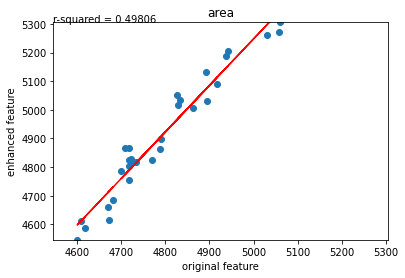

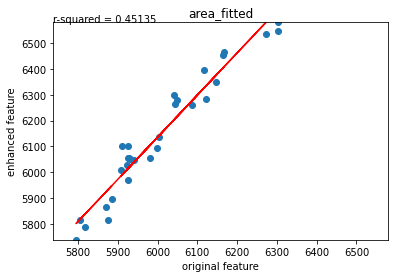

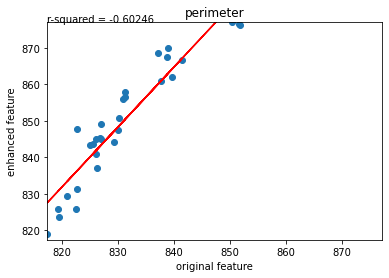

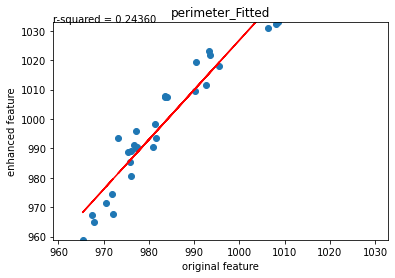

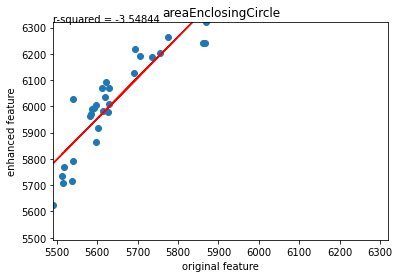

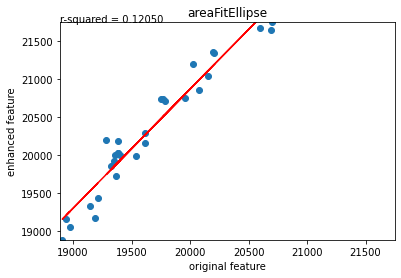

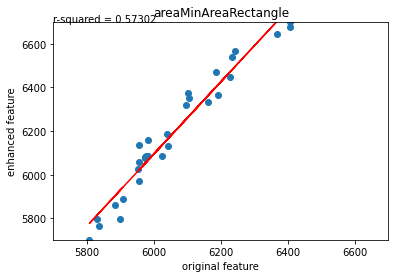

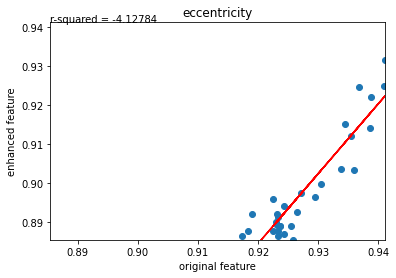

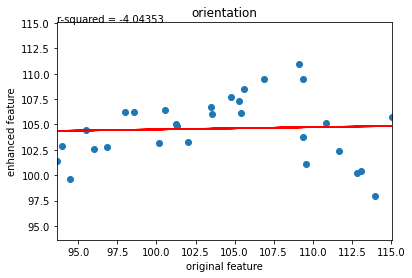

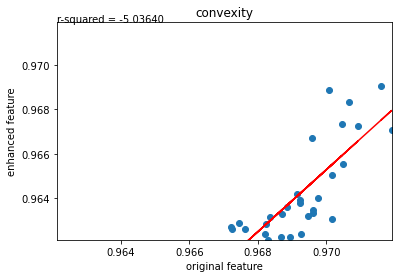

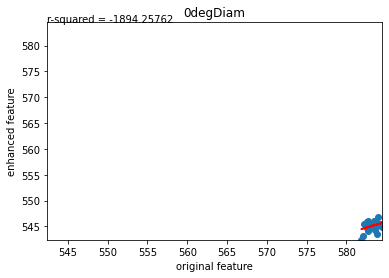

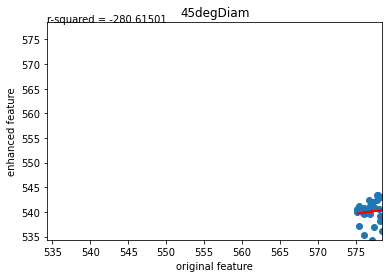

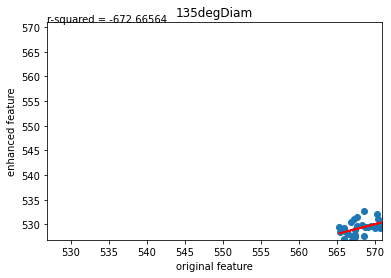

In [76]:

for l1 in dfx_mean.columns:
    for l2 in dfy_mean.columns:
        if l1==l2:
            x = np.array(dfx_mean[l1])
            y = np.array(dfy_mean[l2]) 
            m, b = np.polyfit(x, y, 1)
            xmin = np.min(x)
            ymin = np.min(y)
            rmin=xmin
            if ymin < rmin:
                rmin = ymin
            xmax = np.max(x)
            ymax = np.max(y)
            rmax=xmax
            if ymax > rmax:
                rmax=ymax
            plt.annotate("r-squared = {:.5f}".format(r2_score(y, x)), (rmin, rmax))
            plt.title(l1)
            plt.xlabel('original feature')
            plt.ylabel('enhanced feature')
            plt.xlim(rmin, rmax)
            plt.ylim(rmin, rmax)
            plt.scatter(x, y)
            plt.plot(x, b + m * x, '-', color='red')
            plt.show()


### Let us plot standard deviation of the feature values of the original data against that of enhanced data

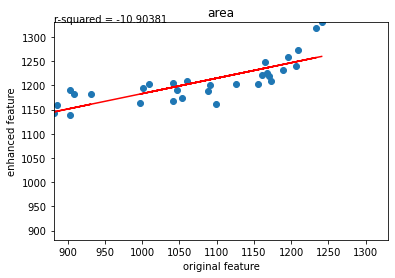

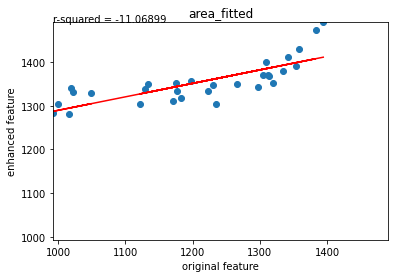

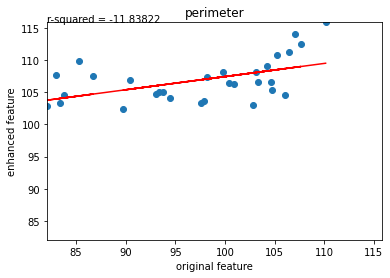

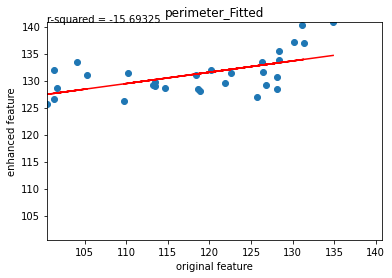

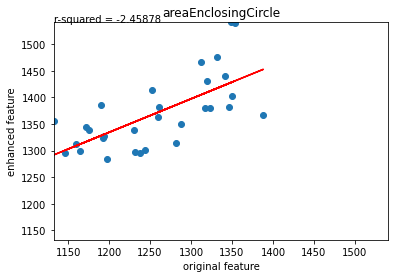

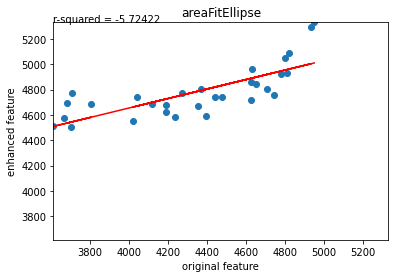

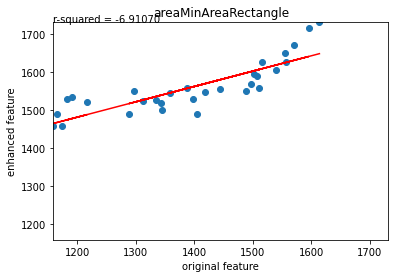

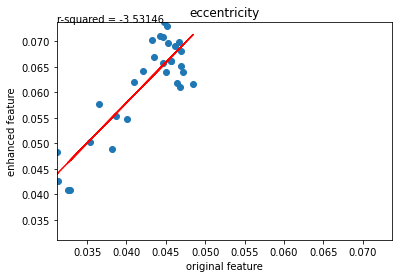

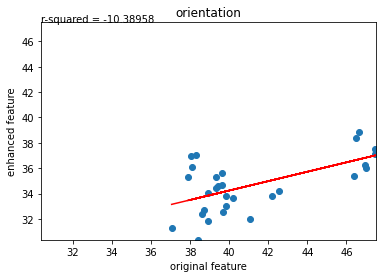

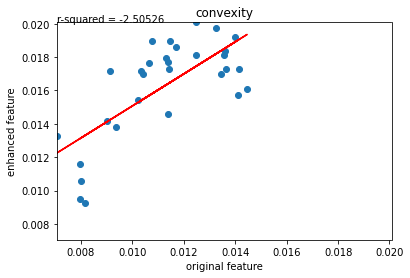

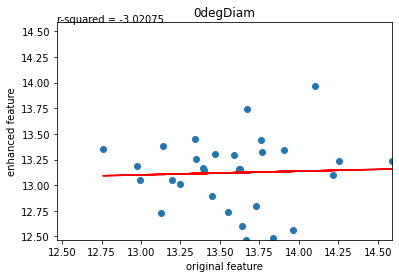

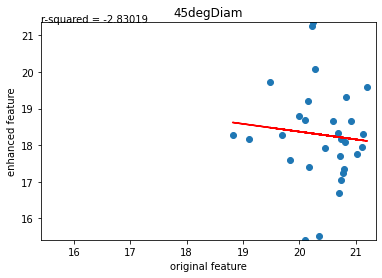

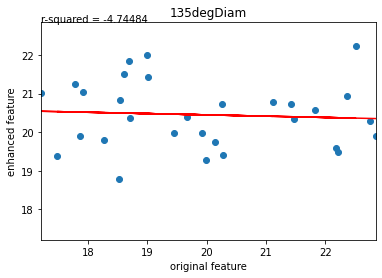

In [77]:
for l1 in dfx_mean.columns:
    for l2 in dfy_mean.columns:
        if l1==l2:
            x = np.array(dfx_std[l1])
            y = np.array(dfy_std[l2])
            m, b = np.polyfit(x, y, 1)
            xmin = np.min(x)
            ymin = np.min(y)
            rmin=xmin
            if ymin < rmin:
                rmin = ymin
            xmax = np.max(x)
            ymax = np.max(y)
            rmax=xmax
            if ymax > rmax:
                rmax=ymax
            plt.annotate("r-squared = {:.5f}".format(r2_score(y, x)), (rmin, rmax))
            plt.title(l1)
            plt.xlabel('original feature')
            plt.ylabel('enhanced feature')
            plt.xlim(rmin, rmax)
            plt.ylim(rmin, rmax)
            plt.scatter(x, y)
            plt.plot(x, b + m * x, '-', color='red')
            plt.show()

#### What is concluded from the above histograms and the scatter plots is
1. Two sets of triplicate data are not read/wrangled properly as their histogram is not correctly displayed
2. One set of triplicates (histogram in RED) does not show unimodal property and this might be an indication of error in feature measurement or bad quality image acquisition. This set should not be used for further analysis.
3. This frequency distribution parameters (mean, sigma) shows that the enhanced data is more closer to normal (Gaussian) distribution. One can conclude from this that the "enhancement" has actually improved the feature clustering to be more tight.
4. Comparison of the mean of the features of original data and enhanced data shows that the mean value of the features has shifted somewhat.
5.Comparison of the standard deviation (spread) of the features of original data and enhanced data shows that often the spread of the features is lower in the enhanced data compared to original data

### 1.5.1 Correlatio between features <a id='2.6.1_Find_Your_Resort_Of_Interest'></a>

In [78]:
#Get the list of numerical features
dfl = dfx[0][0].columns
dfl = dfl[3:len(dfl)]
print(dfl)

Index(['area', 'area_fitted', 'perimeter', 'perimeter_Fitted',
       'areaEnclosingCircle', 'areaFitEllipse', 'areaMinAreaRectangle',
       'eccentricity', 'orientation', 'convexity', '0degDiam', '45degDiam',
       '90degDiam', '135degDiam'],
      dtype='object', name=0)


In [79]:
df = copy.deepcopy(dfx[0][0])
df = df.drop(['file_name', 'label', 'location (X_Y)'], axis=1)
df.head()

0          area  area_fitted   perimeter  perimeter_Fitted  \
1   3581.419731  4658.401200  726.422554        871.582043   
32  2573.803171  3482.848546  612.657956        717.773447   
31  3606.975224  4665.702769  714.338208        854.492199   
30  3344.118730  4351.735290  683.090678        803.222667   
29  3446.340700  4490.465107  707.259365        837.402355   

0   areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
1           4323.980656    14556.735816           4549.632600      0.913526   
32          3185.966008    10678.655957           3212.690619      0.901471   
31          4114.054831    14669.168652           4563.481059      0.933259   
30          3951.226780    14123.478528           4015.863406      0.934592   
29          3957.548526    14270.692450           4380.941489      0.904185   

0   orientation  convexity  0degDiam  45degDiam  90degDiam  135degDiam  
1    175.460144   0.970326  563.9648   589.5996   581.0547    589.5996  
32   161.604401   0.969739  581.0547   581.0547   581.0547    572.5098  
31   155.426239   0.977250  581.0547   581.0547   581.0547    589.5996  
30   178.175186   0.981779  598.1445   589.5996   581.0547    572.5098  
29   170.921555   0.969199  581.0547   589.5996   581.0547    572.5098

In [80]:
cr = df.corr()
cr.head(20)

0                         area  area_fitted  perimeter  perimeter_Fitted  \
0                                                                          
area                  1.000000     0.999896   0.991648          0.989584   
area_fitted           0.999896     1.000000   0.993327          0.991470   
perimeter             0.991648     0.993327   1.000000          0.996926   
perimeter_Fitted      0.989584     0.991470   0.996926          1.000000   
areaEnclosingCircle   0.987626     0.988316   0.987682          0.983290   
areaFitEllipse        0.998986     0.998805   0.990728          0.987014   
areaMinAreaRectangle  0.995543     0.996240   0.992151          0.994817   
eccentricity          0.255478     0.254264   0.240085          0.243937   
orientation          -0.424120    -0.422868  -0.407424         -0.411320   
convexity             0.116558     0.106583   0.026435          0.024215   
0degDiam              0.086595     0.084783   0.072052          0.065998   
45degDiam            -0.264182    -0.262857  -0.249773         -0.251116   
90degDiam                  NaN          NaN        NaN               NaN   
135degDiam           -0.417623    -0.414948  -0.389352         -0.391017   

0                     areaEnclosingCircle  areaFitEllipse  \
0                                                           
area                             0.987626        0.998986   
area_fitted                      0.988316        0.998805   
perimeter                        0.987682        0.990728   
perimeter_Fitted                 0.983290        0.987014   
areaEnclosingCircle              1.000000        0.990443   
areaFitEllipse                   0.990443        1.000000   
areaMinAreaRectangle             0.986148        0.993293   
eccentricity                     0.149035        0.245919   
orientation                     -0.417311       -0.425436   
convexity                        0.028302        0.110225   
0degDiam                         0.079760        0.090757   
45degDiam                       -0.261401       -0.261578   
90degDiam                             NaN             NaN   
135degDiam                      -0.398473       -0.414847   

0                     areaMinAreaRectangle  eccentricity  orientation  \
0                                                                       
area                              0.995543      0.255478    -0.424120   
area_fitted                       0.996240      0.254264    -0.422868   
perimeter                         0.992151      0.240085    -0.407424   
perimeter_Fitted                  0.994817      0.243937    -0.411320   
areaEnclosingCircle               0.986148      0.149035    -0.417311   
areaFitEllipse                    0.993293      0.245919    -0.425436   
areaMinAreaRectangle              1.000000      0.243696    -0.424357   
eccentricity                      0.243696      1.000000    -0.104094   
orientation                      -0.424357     -0.104094     1.000000   
convexity                         0.058791      0.350601    -0.041425   
0degDiam                          0.070350      0.107473     0.003622   
45degDiam                        -0.270614      0.064326     0.283410   
90degDiam                              NaN           NaN          NaN   
135degDiam                       -0.413459     -0.060919     0.305215   

0                     convexity  0degDiam  45degDiam  90degDiam  135degDiam  
0                                                                            
area                   0.116558  0.086595  -0.264182        NaN   -0.417623  
area_fitted            0.106583  0.084783  -0.262857        NaN   -0.414948  
perimeter              0.026435  0.072052  -0.249773        NaN   -0.389352  
perimeter_Fitted       0.024215  0.065998  -0.251116        NaN   -0.391017  
areaEnclosingCircle    0.028302  0.079760  -0.261401        NaN   -0.398473  
areaFitEllipse         0.110225  0.090757  -0.261578        NaN   -0.414847  
areaMinAreaRe

In [81]:
cr=cr.fillna(0)

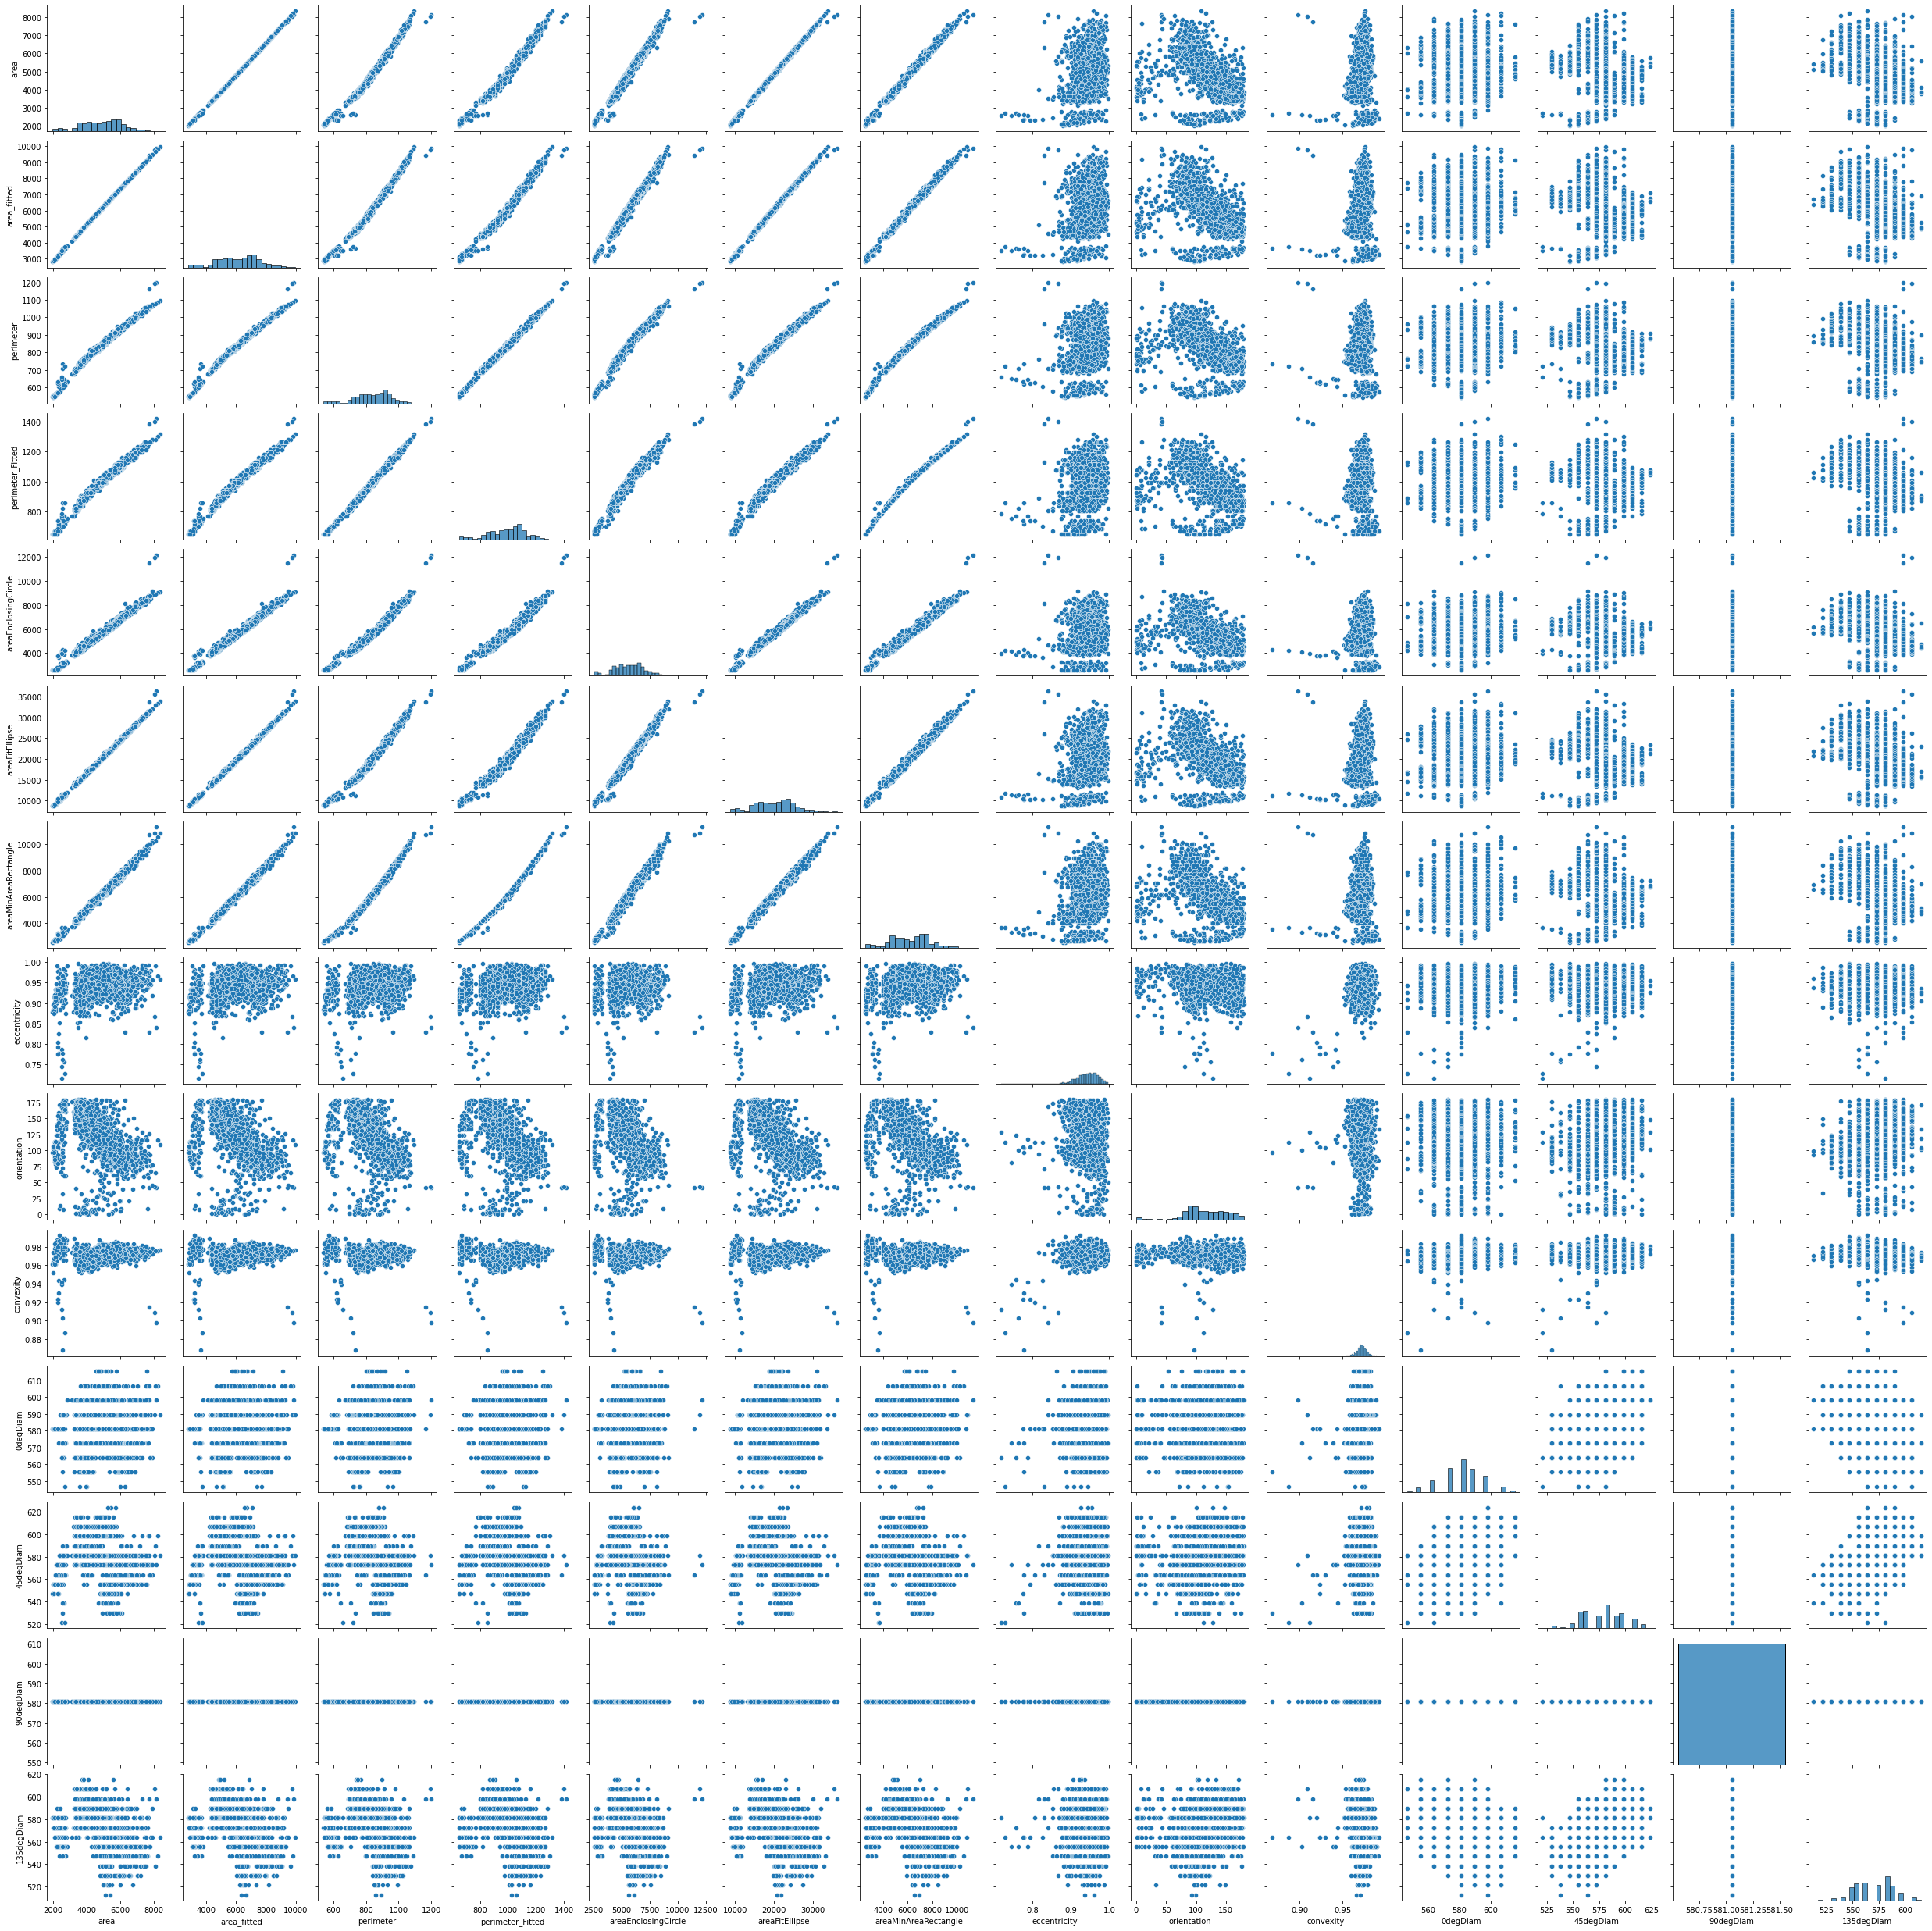

In [82]:
# Call the .pairplot() method on our Seaborn object 'sns', and plug in our df data as a parameter. 
sns.pairplot(df)

<AxesSubplot:xlabel='0', ylabel='0'>

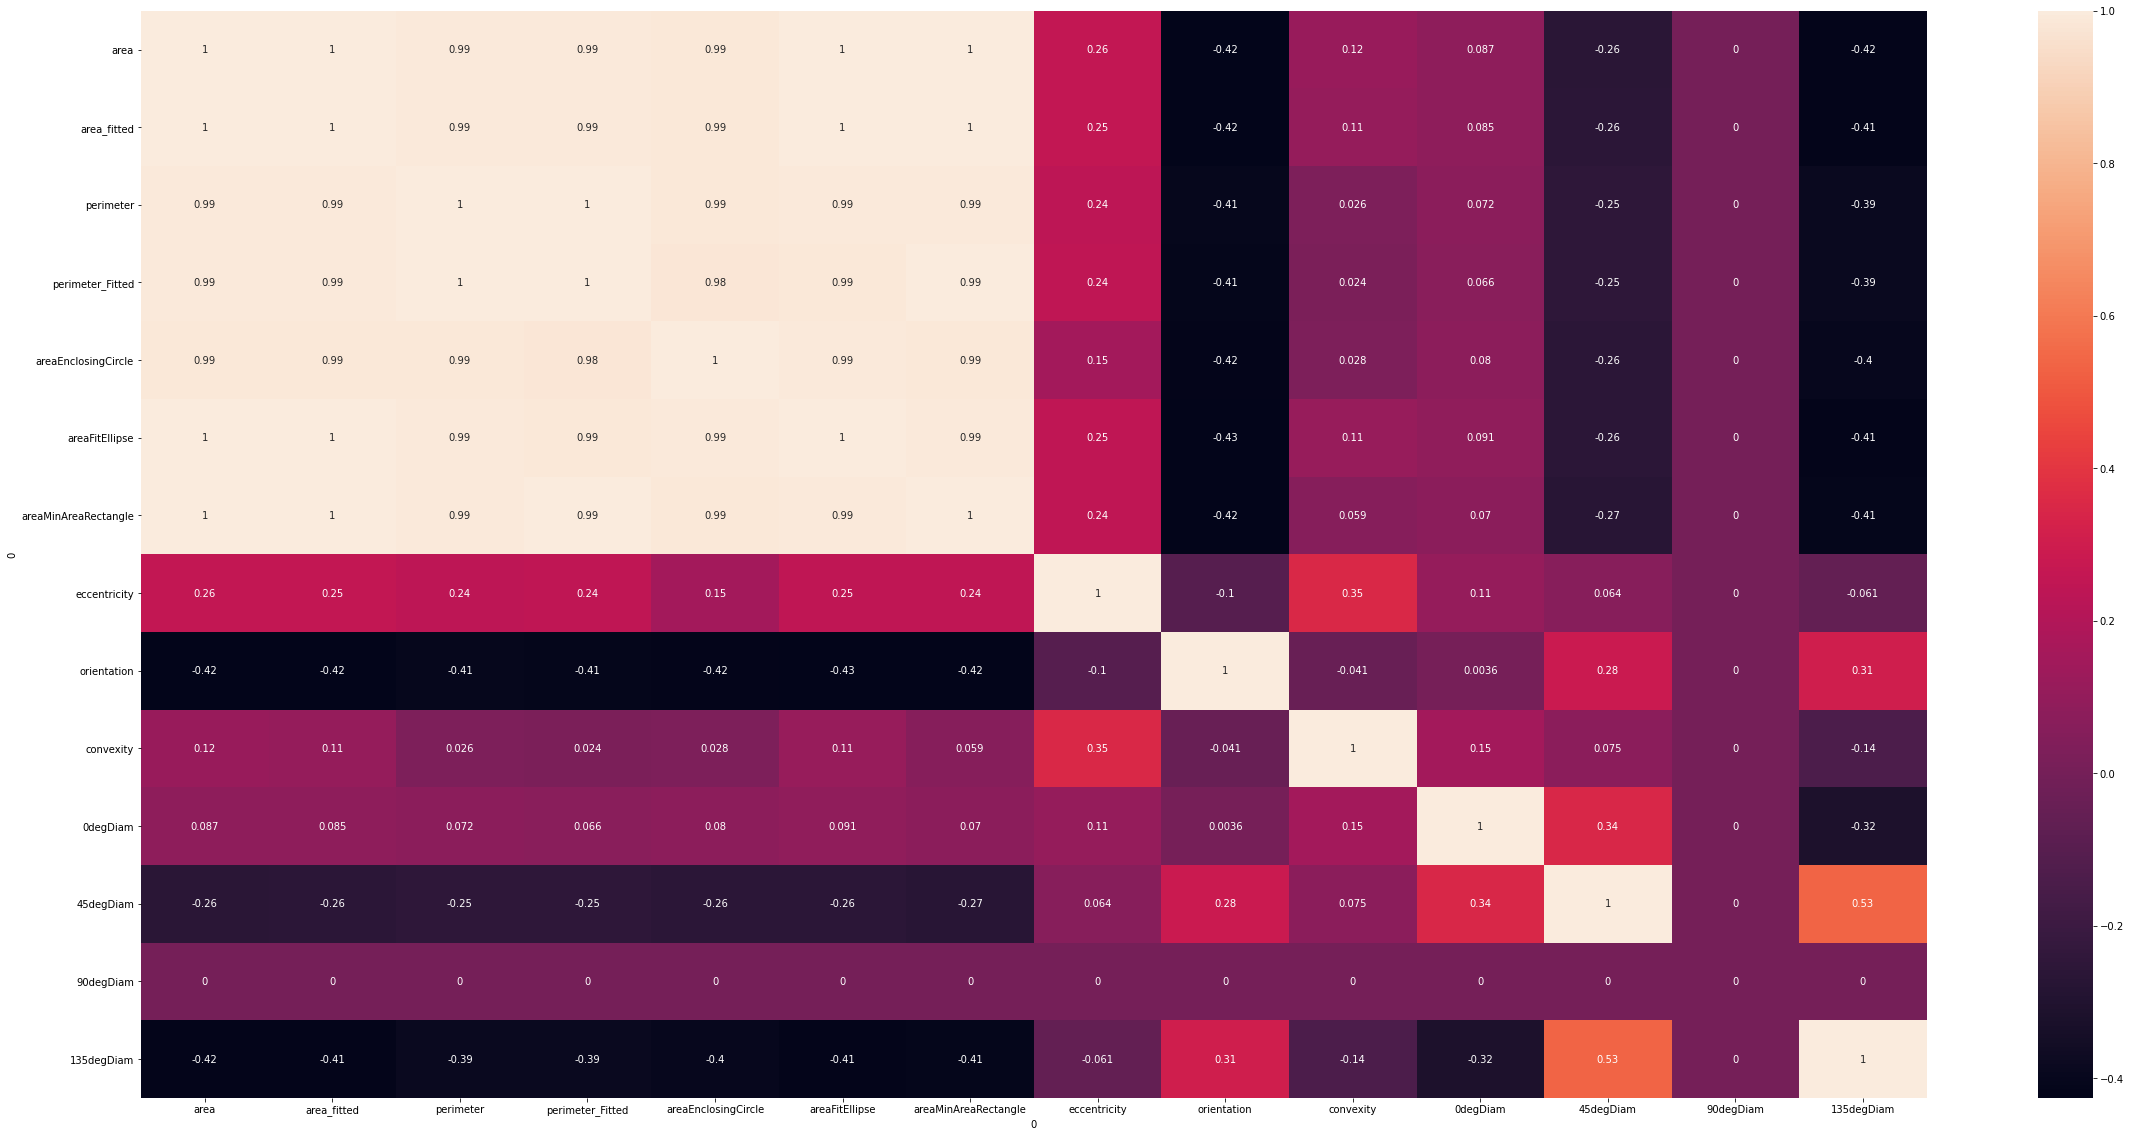

In [83]:
# We need to do some preliminary work, and ensure that the Matplotlib plot is big enough. 
# Call .figure() on plt, and plug in the parameter figsize=(40,20) (or similar suitably large dimensions)
plt.figure(figsize=(40, 20))

# To create an annotated heatmap of the correlations, we call the heatmap() method on our sns object.
# Ensure to plug in, as first parameter, cr, and as second parameter, annot=True (so the graph is annotated)
sns.heatmap(cr, annot=True)

#### Conclusions from the above pairplot, heatmap and the scatter plots of features Vs features from the same class of data

1. Size defining features such as 'area', 'area_fitted', 'perimeter', 'perimeter_Fitted', 'areaEnclosingCircle', 'areaFitEllipse', 'areaMinAreaRectangle'show high correlation i.e. area and the area related features (perimeter, etc.,) show high correlation
2. There is a small but significant trend in relation between 0deg, 45deg and 135deg diameter that implicitely indicate the channel holes are more elliptical than circular
3. Shape defining features such as 'eccentricity', 'orientation', 'convexity', do not correlate with area based features or diameter
4. Feature "90degDiam" has the same value for all channel holes. This shows that there is a bug in the feature engineering code (outside the scope of this work)